# Estudo Ciencias de Dados P2


## Links Importantes:

* https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/README.md
* https://colab.research.google.com/drive/1dE1LvtQOIzkyrYvQcTaZVBd77Z8QIRQ_?usp=sharing
* https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

## Dependencias

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm, norm, expon, weibull_min, uniform, beta, binom, pareto, cauchy, gamma
import scipy.stats as stats # isso aq importa o qqplot (stats.probplot(df[var], dist="norm", plot=ax))
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

In [ ]:

def Extrair(df: pd.DataFrame) -> None:
    """
    Exibe informações básicas de um DataFrame, incluindo seu shape,
    colunas e uma amostra de valores de cada coluna.

    Args:
        df (pd.DataFrame): O DataFrame a ser analisado.
    """
    print('Utilize essas informações extraídas de um dataset para responder questões:')
    print(f'Shape do dataset: {df.shape}')
    print(f'Colunas do dataset: {df.columns.tolist()}')
    print(f'Nome linhas do dataset: {df.index.tolist()}')


    print('Amostra de valores de cada coluna do dataset:')

    for column in df.columns:
        unique_values = df[column].unique()
        unique_count = len(unique_values)
        if unique_count > 12:
            # Seleciona o primeiro, o último e 10 valores aleatórios
            sampled_values = np.random.choice(unique_values[1:-1], 10, replace=False)
            sampled_values = np.concatenate(([unique_values[0]], sampled_values, [unique_values[-1]]))
            print(f'Coluna {column}: {sampled_values} (total de {unique_count} valores únicos)')
        else:
            print(f'Coluna {column}: {unique_values}')
    print('Para cada questão me retorne uma solucao em em python utilizando Pandas')

In [ ]:
def normalize(column):
    return (column - column.mean()) / column.std()

## Ex_Matplotlib1

In [ ]:
df = sns.load_dataset('fmri')
df.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [ ]:
df.columns

Index(['subject', 'timepoint', 'event', 'region', 'signal'], dtype='object')

In [ ]:
for column in df.columns:
  print(df[column].unique())

['s13' 's5' 's12' 's11' 's10' 's9' 's8' 's7' 's6' 's4' 's3' 's2' 's1' 's0']
[18 14 17  9 16 15  0 13 12 11 10  3  7  8  2  6  5  4  1]
['stim' 'cue']
['parietal' 'frontal']
[-0.01755158 -0.08088293 -0.08103302 ... -0.00493911 -0.02536671
 -0.00689923]


In [ ]:
df = df.sort_values(by='timepoint')

In [ ]:
df.head()

subject  timepoint event    region    signal
1063      s0          0   cue  parietal -0.006899
258       s7          0  stim  parietal  0.004081
259       s6          0  stim  parietal -0.023319
260       s5          0  stim  parietal -0.051228
865       s5          0   cue   frontal -0.027033

In [ ]:
df_s0 = df[(df['subject'] == 's0') & (df['region'] == 'parietal') & (df['event'] == 'stim')]


In [ ]:
df_s0.head()

subject  timepoint event    region    signal
521      s0          0  stim  parietal -0.039327
251      s0          1  stim  parietal -0.035735
237      s0          2  stim  parietal  0.009642
225      s0          3  stim  parietal  0.086399
211      s0          4  stim  parietal  0.154058

**Q1.**

Produza um gráfico como abaixo para o sujeito s0. Observe todos os elementos do gráfico como a seleção dos dados (sujeito s0, região parietal e evento de stim), títulos e rótulos.

In [ ]:
df_s0 = df[(df.subject == 's0') & (df.region == 'parietal') & (df.event == 'stim')]
df_s0 = df_s0.sort_values('timepoint')

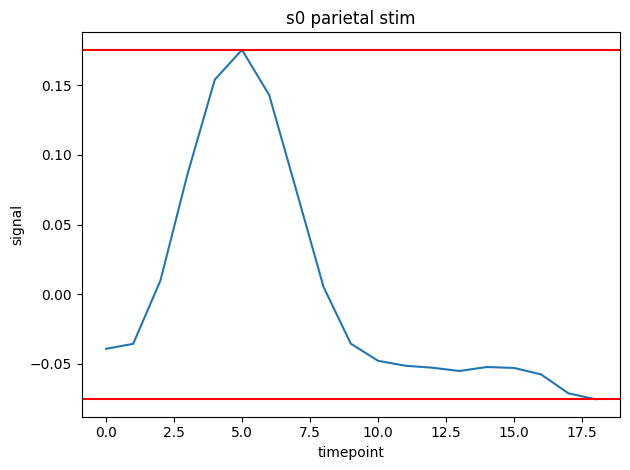

In [ ]:
plt.figure()
plt.plot(df_s0['timepoint'], df_s0['signal'])
plt.title('s0 parietal stim')
plt.xlabel('timepoint')
plt.ylabel('signal')
plt.axhline(df_s0['signal'].min(),color='red')
plt.axhline(df_s0['signal'].max(),color='red')
plt.tight_layout()
plt.show()

**Q2.**

Produza um gráfico como abaixo para o sujeito s0. Observe todos os elementos do gráfico como a seleção dos dados (sujeito s0, região parietal e eventos de stim e cue), títulos e rótulos.

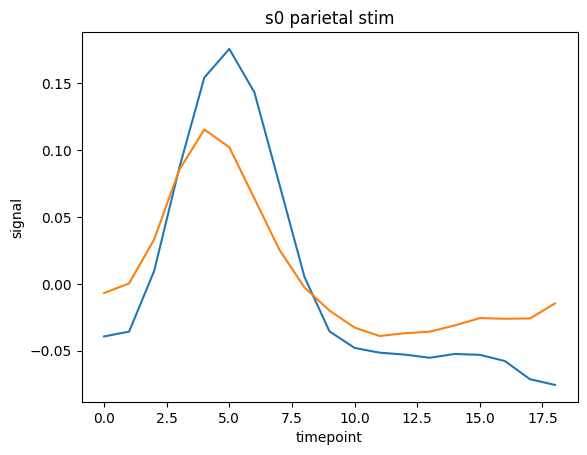

In [ ]:
df_s0_stim = df[(df.subject == 's0') & (df.region == 'parietal') & (df.event == 'stim')].sort_values('timepoint')
df_s0_cue = df[(df.subject == 's0') & (df.region == 'parietal') & (df.event == 'cue')].sort_values('timepoint')

plt.figure()
plt.plot(df_s0_stim['timepoint'], df_s0_stim['signal'])
plt.plot(df_s0_cue['timepoint'], df_s0_cue['signal'])
plt.title('s0 parietal stim')
plt.xlabel('timepoint')
plt.ylabel('signal')
plt.show()

In [ ]:
# Calcular a variância dos sinais para o evento 'stim'
variance_stim = df_s0[df_s0['event'] == 'stim']['signal'].var()

# Calcular a variância dos sinais para o evento 'cue'
variance_cue = df_s0[df_s0['event'] == 'cue']['signal'].var()

variance_stim, variance_cue

(0.006816114545990784, nan)

**Q3. plt.subplot(nrow, ncol, nr)**

Produza um gráfico como abaixo para os sujeitos s0 e s1, em uma mesma figura empregando o modo **script layer**. Observe todos os demais elementos do gráfico.

In [ ]:
df_s0_stim = df[(df.subject == 's0') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values('timepoint')
df_s0_cue = df[(df.subject == 's0') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values('timepoint')

df_s1_stim = df[(df.subject == 's1') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values('timepoint')
df_s1_cue = df[(df.subject == 's1') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values('timepoint')


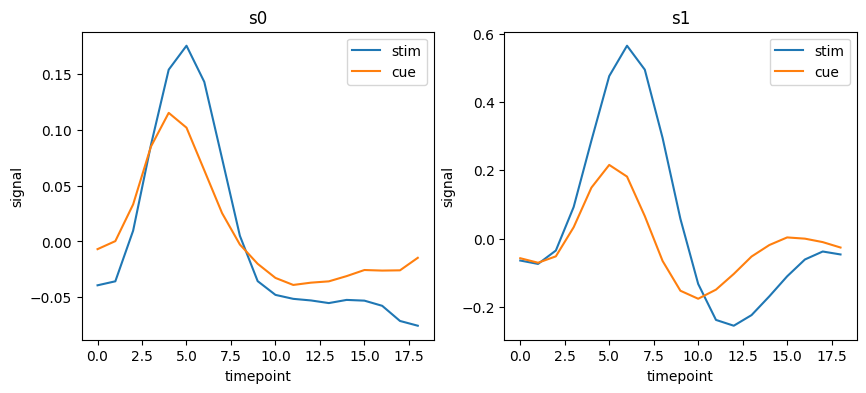

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(df_s0_stim['timepoint'], df_s0_stim['signal'])
plt.plot(df_s0_cue['timepoint'], df_s0_cue['signal'])
plt.legend(['stim','cue'])
plt.title('s0')
plt.xlabel('timepoint')
plt.ylabel('signal')

plt.subplot(1,2,2)
plt.plot(df_s1_stim['timepoint'], df_s1_stim['signal'])
plt.plot(df_s1_cue['timepoint'], df_s1_cue['signal'])
plt.legend(['stim','cue'])
plt.title('s1')
plt.xlabel('timepoint')
plt.ylabel('signal')
plt.show()

In [ ]:
# Filtrar os dados para o evento 'stim'
df_stim = df[df['event'] == 'stim']

# Calcular a média dos sinais para cada sujeito
mean_signal_per_subject = df_stim.groupby('subject')['signal'].mean().sort_values(ascending=False)

mean_signal_per_subject

subject
s3     0.032770
s4     0.032322
s1     0.031971
s10    0.031344
s7     0.030679
s13    0.018385
s6     0.017130
s12    0.006878
s8     0.006563
s5     0.001604
s9     0.001305
s0    -0.002590
s2    -0.004695
s11   -0.011188
Name: signal, dtype: float64

**Q4. plt.subplots(nrow,ncol,...) ax[i,<j>]**

Produza um gráfico como abaixo para os sujeitos s0 e s1, em uma mesma figura empregando, agora empregando o modo artist layer. Observe todos os demais elementos do gráfico.

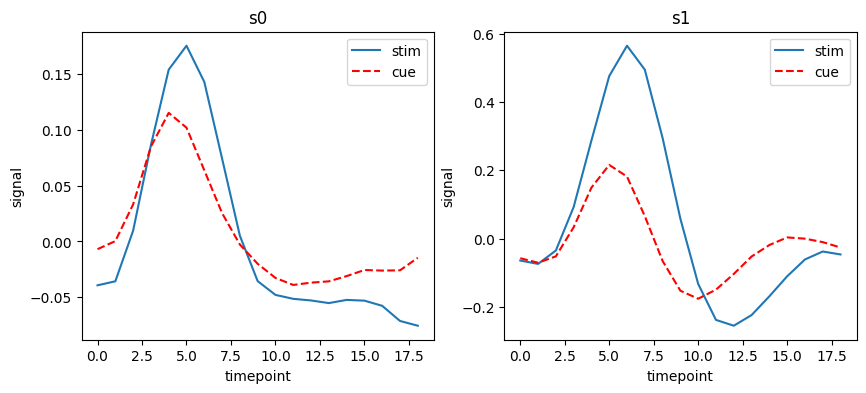

In [ ]:
# Seu código
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(df_s0_stim['timepoint'], df_s0_stim['signal'])
ax[0].plot(df_s0_cue['timepoint'], df_s0_cue['signal'],'r--')
ax[0].legend(['stim','cue'])
ax[0].set_title('s0')
ax[0].set_xlabel('timepoint')
ax[0].set_ylabel('signal')

ax[1].plot(df_s1_stim['timepoint'], df_s1_stim['signal'])
ax[1].plot(df_s1_cue['timepoint'], df_s1_cue['signal'],'r--')
ax[1].legend(['stim','cue'])
ax[1].set_title('s1')
ax[1].set_xlabel('timepoint')
ax[1].set_ylabel('signal')
plt.show()

**Q5. sharex, sharey**

Produza um gráfico como abaixo agora para os sujeitos s0 a s3, em uma mesma figura empregando empregando o modo artist layer. Verifique no comando subplots() como compartilhar os eixos. Observe todos os demais elementos do gráfico.

In [ ]:
df_s0_stim = df[(df.subject == 's0') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values('timepoint')
df_s0_cue = df[(df.subject == 's0') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values('timepoint')

df_s1_stim = df[(df.subject == 's1') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values('timepoint')
df_s1_cue = df[(df.subject == 's1') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values('timepoint')

df_s2_stim = df[(df.subject == 's2') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values('timepoint')
df_s2_cue = df[(df.subject == 's2') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values('timepoint')

df_s3_stim = df[(df.subject == 's3') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values('timepoint')
df_s3_cue = df[(df.subject == 's3') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values('timepoint')

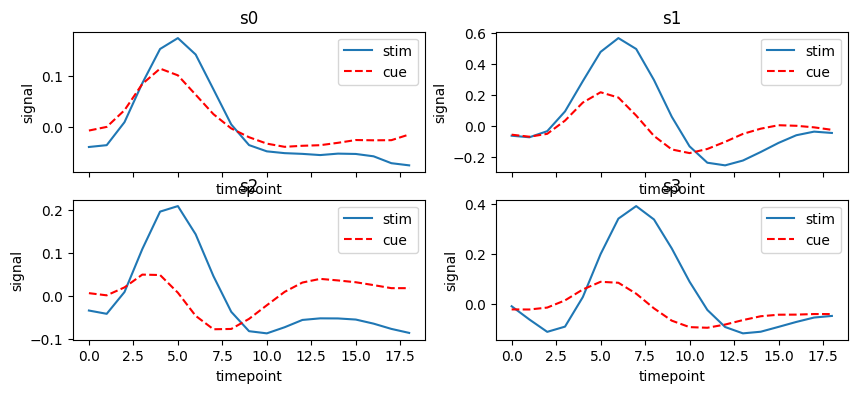

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,4), sharex=True)

ax[0,0].plot(df_s0_stim['timepoint'], df_s0_stim['signal'])
ax[0,0].plot(df_s0_cue['timepoint'], df_s0_cue['signal'],'r--')
ax[0,0].legend(['stim','cue'])
ax[0,0].set_title('s0')
ax[0,0].set_ylabel('signal')
ax[0,0].set_xlabel('timepoint')

ax[0,1].plot(df_s1_stim['timepoint'], df_s1_stim['signal'])
ax[0,1].plot(df_s1_cue['timepoint'], df_s1_cue['signal'],'r--')
ax[0,1].legend(['stim','cue'])
ax[0,1].set_title('s1')
ax[0,1].set_ylabel('signal')
ax[0,1].set_xlabel('timepoint')

ax[1,0].plot(df_s2_stim['timepoint'], df_s2_stim['signal'])
ax[1,0].plot(df_s2_cue['timepoint'], df_s2_cue['signal'],'r--')
ax[1,0].legend(['stim','cue'])
ax[1,0].set_title('s2')
ax[1,0].set_ylabel('signal')
ax[1,0].set_xlabel('timepoint')

ax[1,1].plot(df_s3_stim['timepoint'], df_s3_stim['signal'])
ax[1,1].plot(df_s3_cue['timepoint'], df_s3_cue['signal'],'r--')
ax[1,1].legend(['stim','cue'])
ax[1,1].set_title('s3')
ax[1,1].set_xlabel('timepoint')
ax[1,1].set_ylabel('signal')
plt.show()

## Lab Distribuições

In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/glasses.csv')
df.head()

color  clarity  density  purity  silica quality  price+
0     E     51.0     35.0    14.0     2.0  Accept     326
1     E     49.0     30.0    14.0     2.0  Accept     326
2     E     47.0     32.0    13.0     2.0  Accept     327
3     I     46.0     31.0    15.0     2.0  Accept     334
4     J     50.0     36.0    14.0     2.0  Accept     335

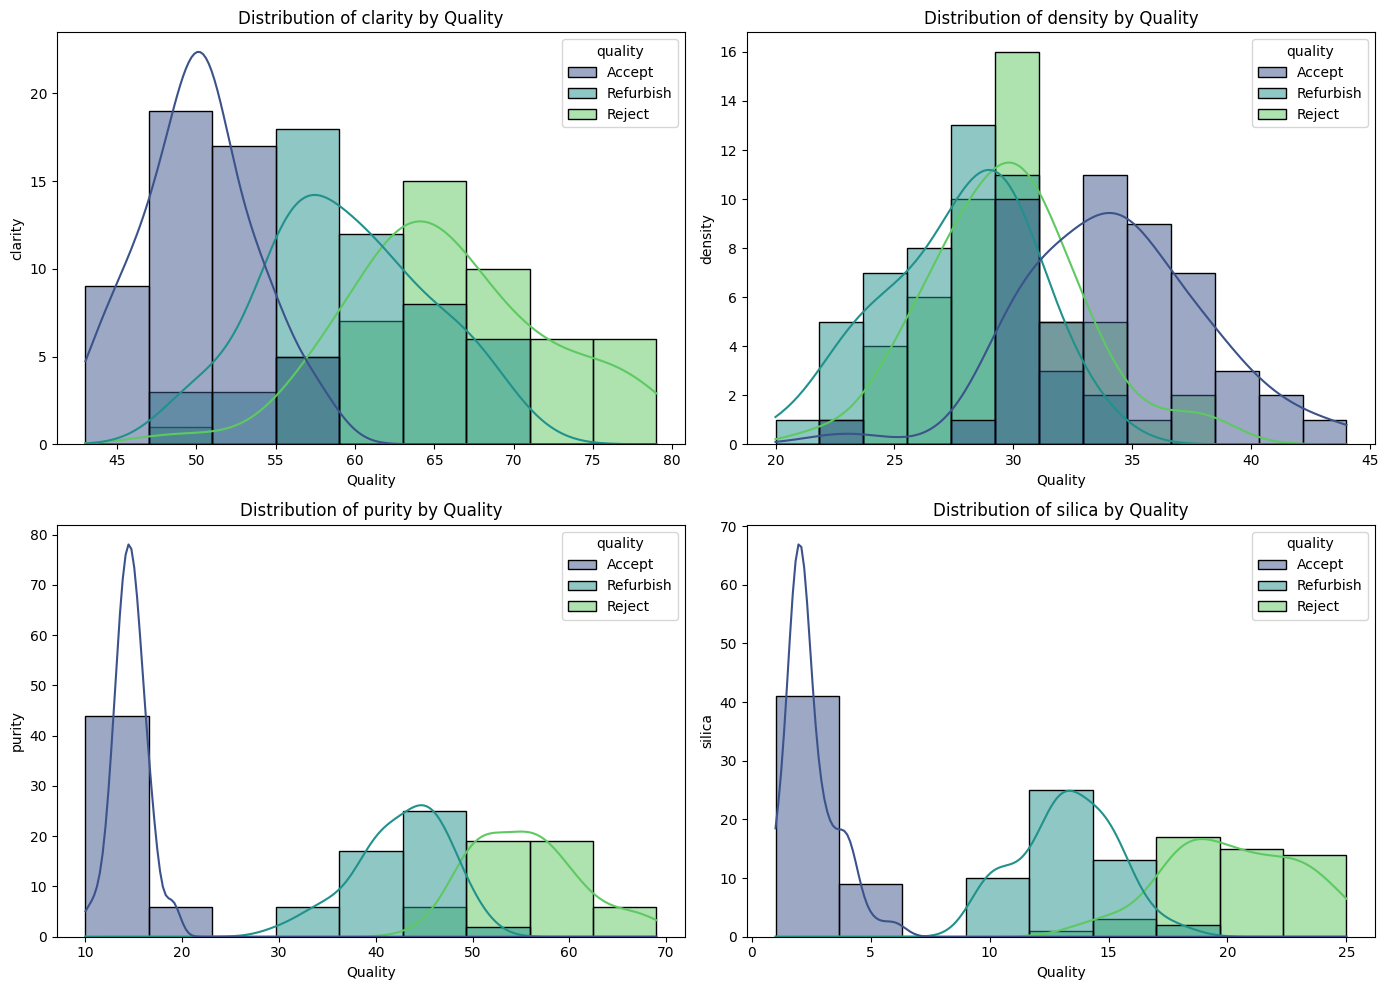

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir as variáveis a serem analisadas
variables = ['clarity', 'density', 'purity', 'silica']

# Criar a figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Iterar sobre as variáveis e os eixos
for var, ax in zip(variables, axes.flatten()):
    sns.histplot(data=df, x=var, hue='quality', ax=ax, palette='viridis',alpha =0.5,kde=True)
    ax.set_title(f'Distribution of {var} by Quality')
    ax.set_xlabel('Quality')
    ax.set_ylabel(var)

# Ajustar o layout
plt.tight_layout()

# Mostrar a figura
plt.show()

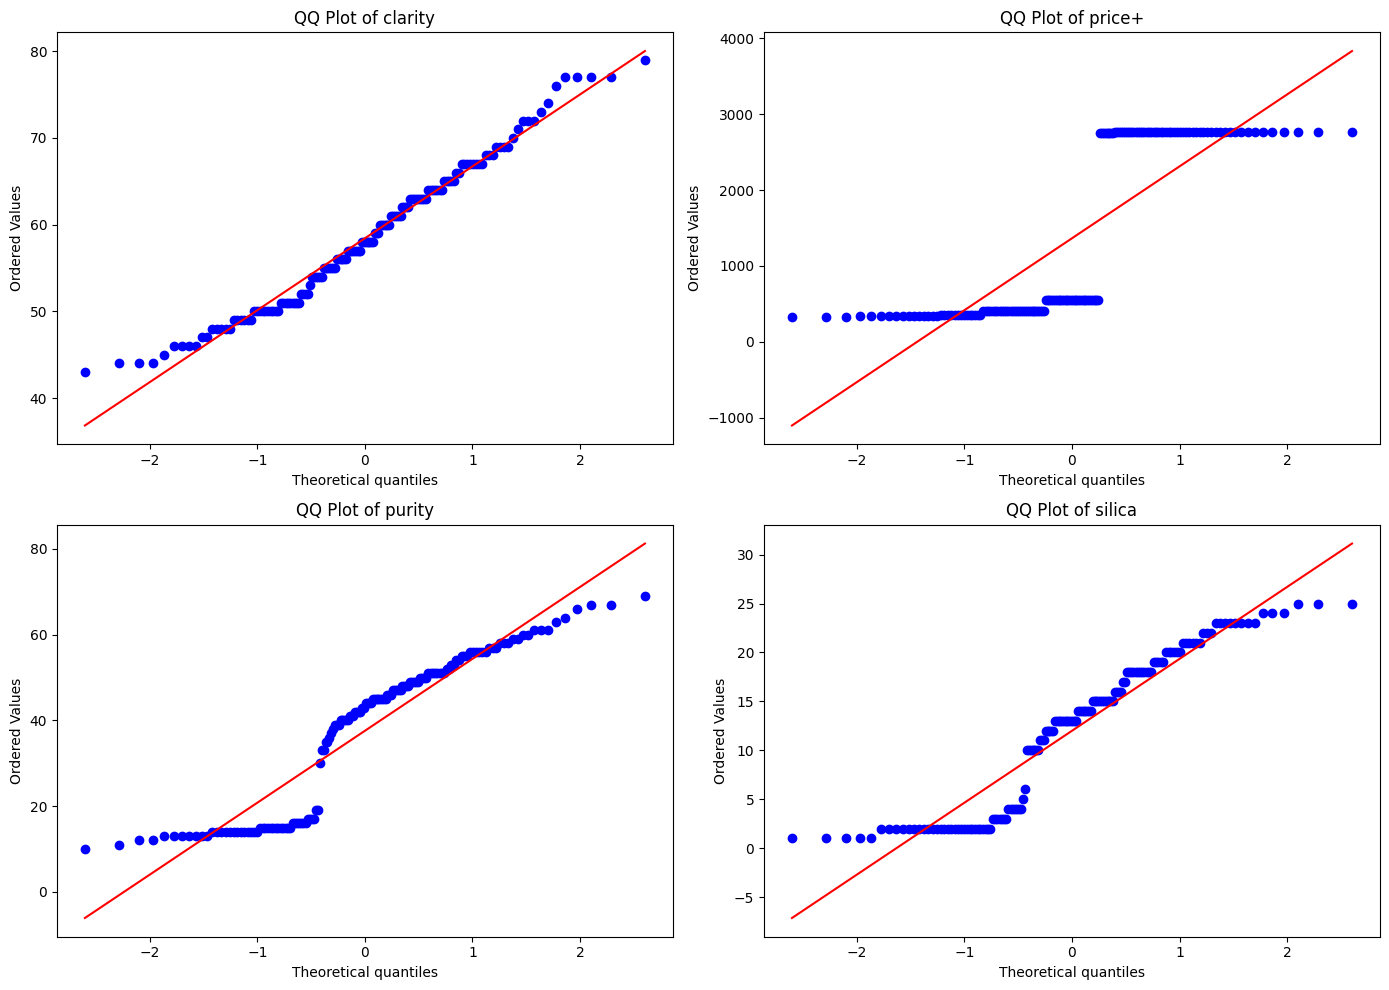

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Definir as variáveis a serem analisadas
variables = ['clarity', 'price+', 'purity', 'silica']

# Criar a figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Iterar sobre as variáveis e os eixos
for var, ax in zip(variables, axes.flatten()):
    stats.probplot(df[var], dist="norm", plot=ax)
    ax.set_title(f'QQ Plot of {var}')

# Ajustar o layout
plt.tight_layout()

# Mostrar a figura
plt.show()

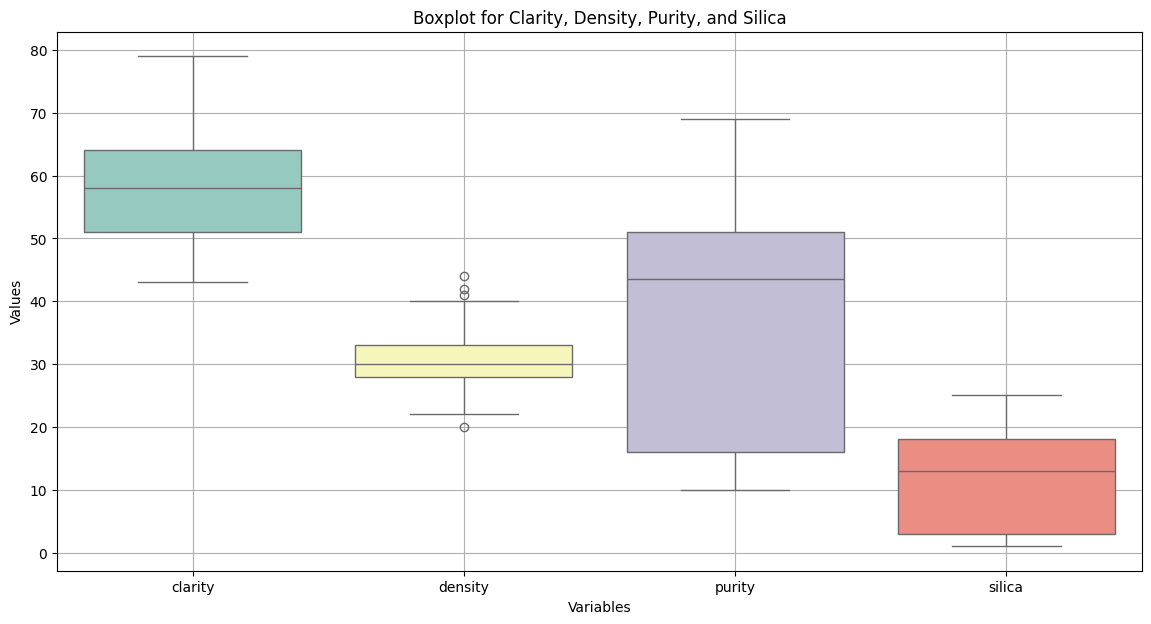

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um DataFrame com as variáveis de interesse
variables_df = df[['clarity', 'density', 'purity', 'silica']]

# Criar um gráfico de boxplot para todas as variáveis
plt.figure(figsize=(14, 7))
sns.boxplot(data=variables_df, palette="Set3")
plt.title('Boxplot for Clarity, Density, Purity, and Silica')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)

# Mostrar o gráfico
plt.show()


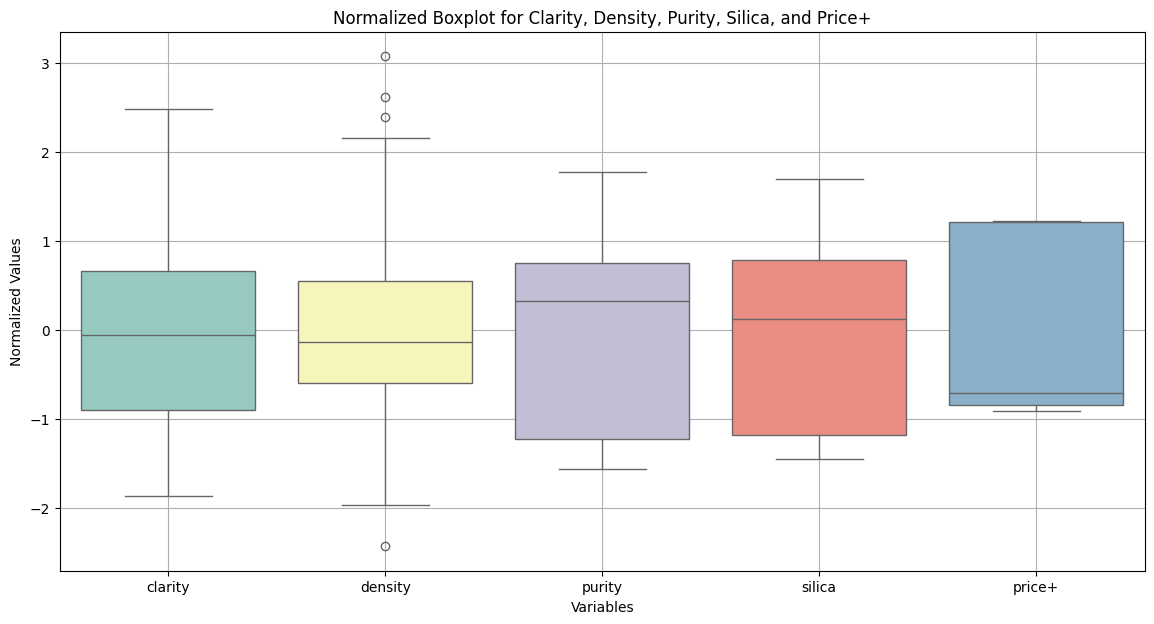

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizar as variáveis
variables = ['clarity', 'density', 'purity', 'silica', 'price+']
normalized_df = df[variables].apply(lambda x: (x - x.mean()) / x.std())

# Criar um gráfico de boxplot para todas as variáveis
plt.figure(figsize=(14, 7))
sns.boxplot(data=normalized_df, palette="Set3")
plt.title('Normalized Boxplot for Clarity, Density, Purity, Silica, and Price+')
plt.xlabel('Variables')
plt.ylabel('Normalized Values')
plt.grid(True)

# Mostrar o gráfico
plt.show()

In [ ]:
flights = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/flights_delays_2015.csv')
flights.head()

arr_delay                   name
0       11.0  United Air Lines Inc.
1       20.0  United Air Lines Inc.
2       12.0  United Air Lines Inc.
3        7.0  United Air Lines Inc.
4      -14.0  United Air Lines Inc.

In [ ]:
flights = flights[(flights['arr_delay'] > 0)]
flights.head()

arr_delay                   name
0       11.0  United Air Lines Inc.
1       20.0  United Air Lines Inc.
2       12.0  United Air Lines Inc.
3        7.0  United Air Lines Inc.
7       14.0  United Air Lines Inc.

In [ ]:
flights.sort_values(by='arr_delay')

arr_delay                          name
54139         1.0         United Air Lines Inc.
183475        1.0          Delta Air Lines Inc.
183447        1.0          Delta Air Lines Inc.
70797         1.0        American Airlines Inc.
270184        1.0               US Airways Inc.
...           ...                           ...
187877      120.0   Atlantic Southeast Airlines
292661      120.0                Virgin America
237014      120.0  American Eagle Airlines Inc.
267578      120.0               US Airways Inc.
152069      120.0          Delta Air Lines Inc.

[115074 rows x 2 columns]

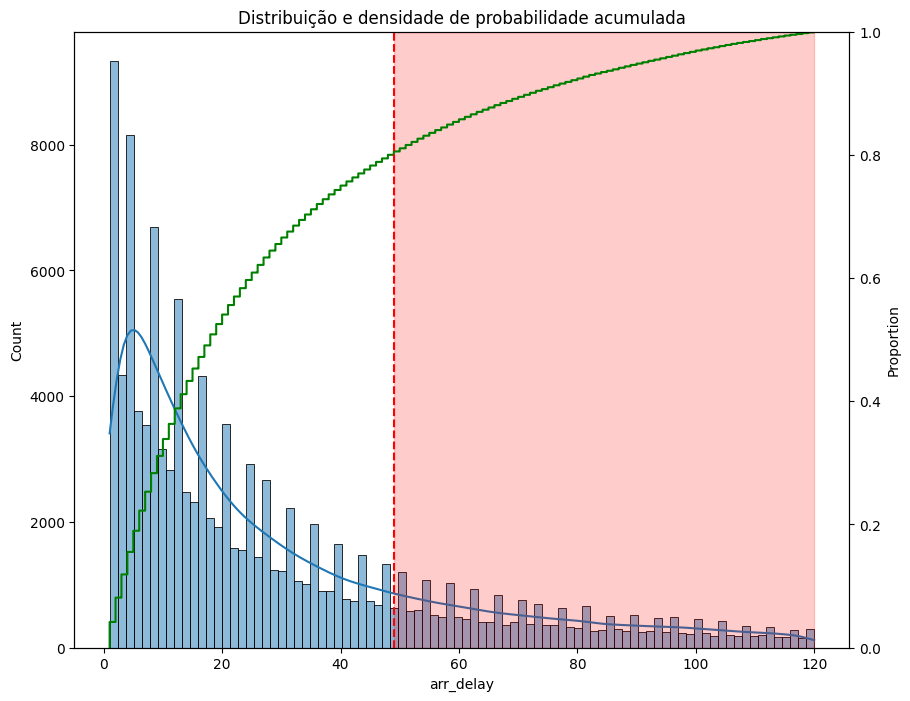

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=flights, x='arr_delay', ax=ax, kde=True)
threashold = flights['arr_delay'].quantile(0.8)

ax2 = ax.twinx()

sns.ecdfplot(data=flights, x='arr_delay',color='g', ax=ax2)
ax2.axvline(threashold, color='r', linestyle='--')
ax2.fill_betweenx(ax2.get_ylim(), threashold, flights['arr_delay'].max(), color='red', alpha=0.2)

plt.title('Distribuição e densidade de probabilidade acumulada')

plt.show()

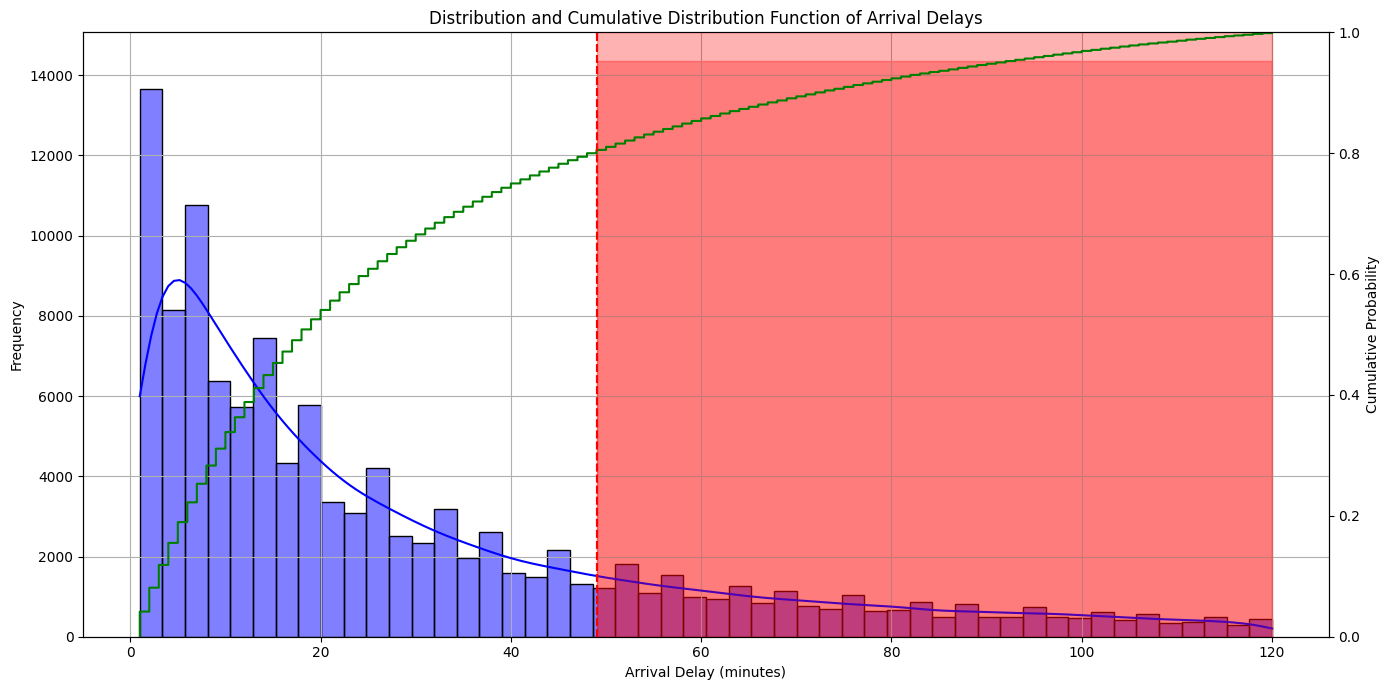

13

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular o ponto de corte para os 20% maiores atrasos
penalty_threshold = np.percentile(flights['arr_delay'], 80)

# Criar a figura e o eixo principal
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de distribuição
sns.histplot(flights['arr_delay'], bins=50, kde=True, ax=ax1, color='blue')
ax1.axvline(penalty_threshold, color='red', linestyle='--')
ax1.fill_betweenx([0, ax1.get_ylim()[1]], penalty_threshold, flights['arr_delay'].max(), color='red', alpha=0.3)
ax1.set_title('Distribution and Cumulative Distribution Function of Arrival Delays')
ax1.set_xlabel('Arrival Delay (minutes)')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Criar um segundo eixo y para o CDF
ax2 = ax1.twinx()

# Gráfico de densidade de probabilidade acumulada
sns.ecdfplot(flights['arr_delay'], ax=ax2, color='green')
ax2.axvline(penalty_threshold, color='red', linestyle='--')
ax2.fill_betweenx([0, 1], penalty_threshold, flights['arr_delay'].max(), color='red', alpha=0.3)
ax2.set_ylabel('Cumulative Probability')
ax2.grid(False)

# Mostrar a figura
plt.tight_layout()
plt.show()

# Identificar as companhias que seriam penalizadas
penalized_companies = flights[flights['arr_delay'] > penalty_threshold]['name'].unique()
penalized_companies
len(penalized_companies)

In [ ]:
len(flights['name'].unique())

13

<ipython-input-239-deaa5bee0436>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='arr_delay', y='name', data=flights, palette="Set3")


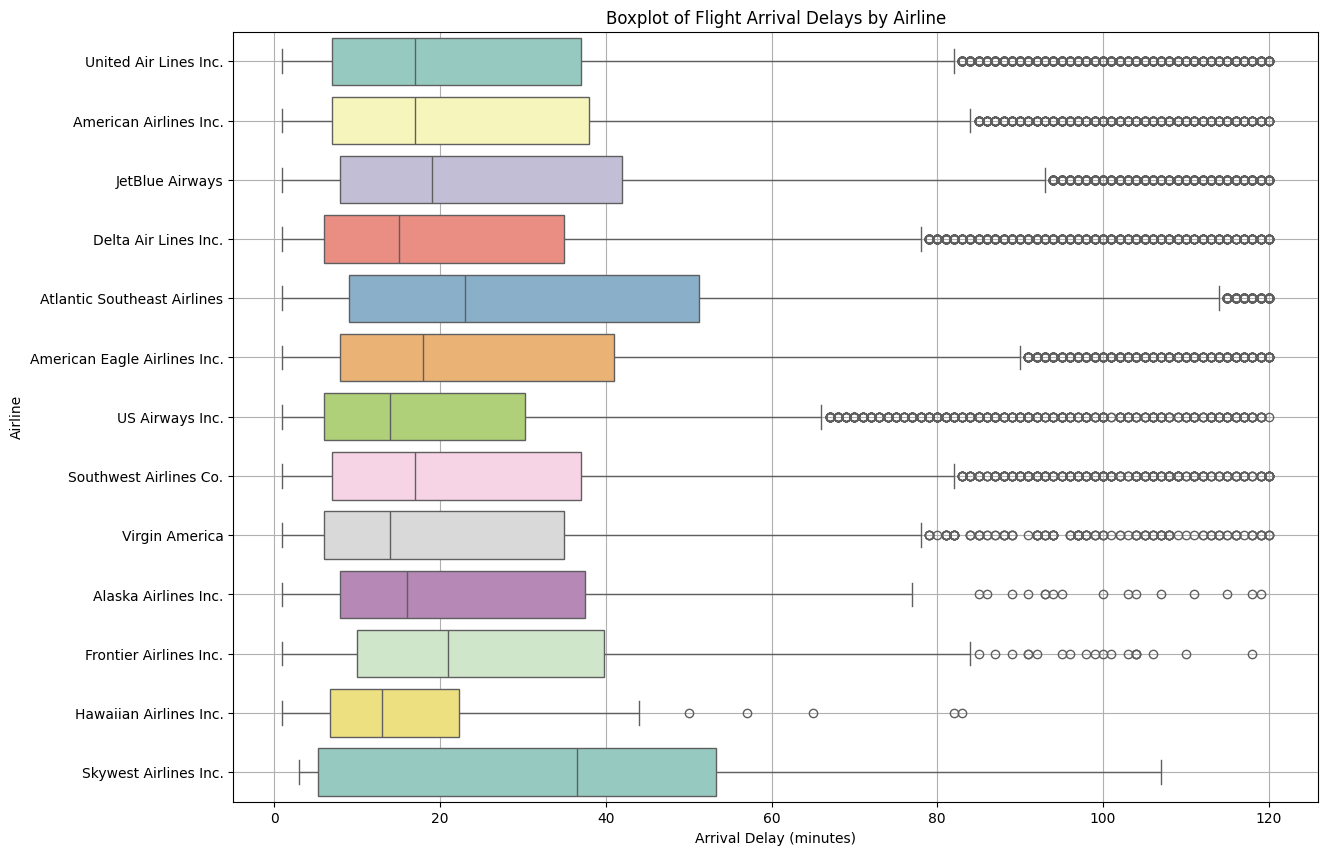

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='arr_delay', y='name', data=flights, palette="Set3")
plt.title('Boxplot of Flight Arrival Delays by Airline')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Airline')
plt.grid(True)

# Mostrar o gráfico
plt.show()

In [ ]:
# Criar 10 intervalos para os atrasos
bins = np.linspace(flights['arr_delay'].min(), flights['arr_delay'].max(), 11)

# Contar o número de ocorrências em cada intervalo
counts, bin_edges = np.histogram(flights['arr_delay'], bins=bins)

# Identificar o intervalo com o maior número de ocorrências
max_count_index = np.argmax(counts)
max_count_interval = (bin_edges[max_count_index], bin_edges[max_count_index + 1])
max_count = counts[max_count_index]

max_count_interval, max_count


((1.0, 12.9), 44685)

## Ex_Bars

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')
df.head()

state  year  barrels         type
0    AK  2008  2067.69  On Premises
1    AK  2009  2263.65  On Premises
2    AK  2010  1929.15  On Premises
3    AK  2011  2251.02  On Premises
4    AK  2012  2312.43  On Premises

**Q1.**

Gere gráficos de barras da produção de barris por ano. Em uma única figura, primeiro gráfico com o matplotlib (use plt.bar()), depois o mesmo gráfico com o seaborn. A produção de barris vem aumentando ou diminuindo a cada ano?

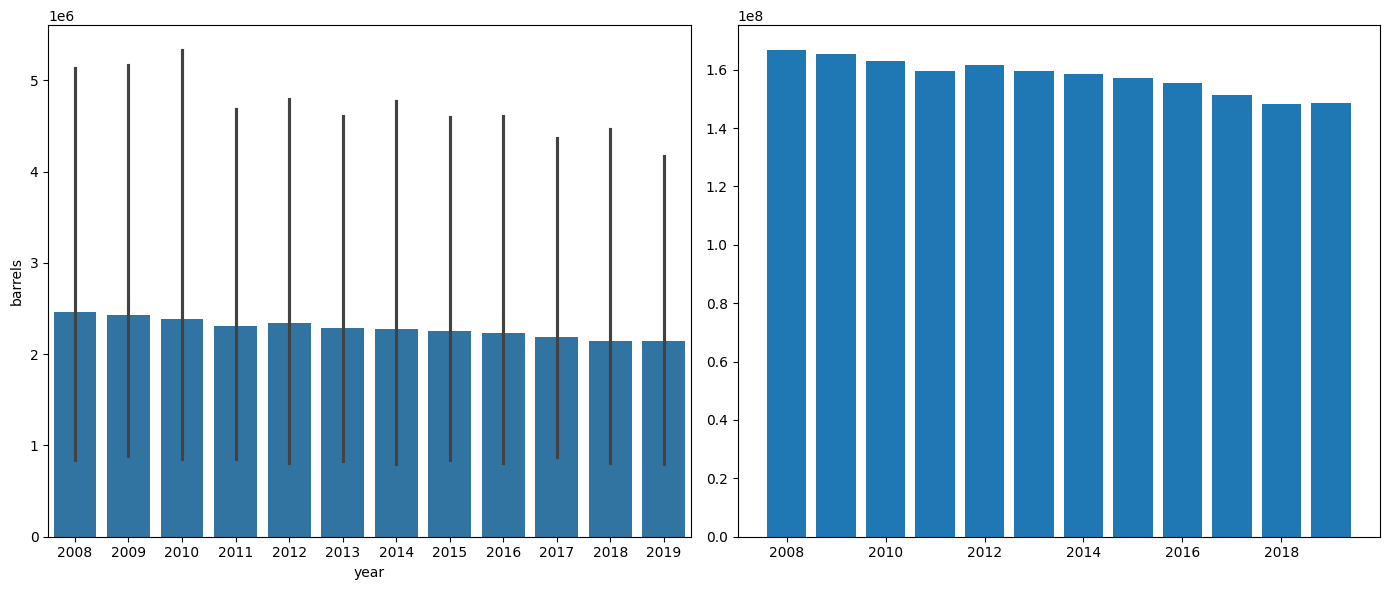

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
sns.barplot(data=df,x='year',y='barrels',ax = ax[0])
plt.bar(df['year'],df['barrels'],axes = ax[1])

plt.tight_layout()
plt.show()

In [ ]:
df_aux = df.groupby('year').sum()['barrels'].sort_values(ascending=False).reset_index()

<BarContainer object of 12 artists>

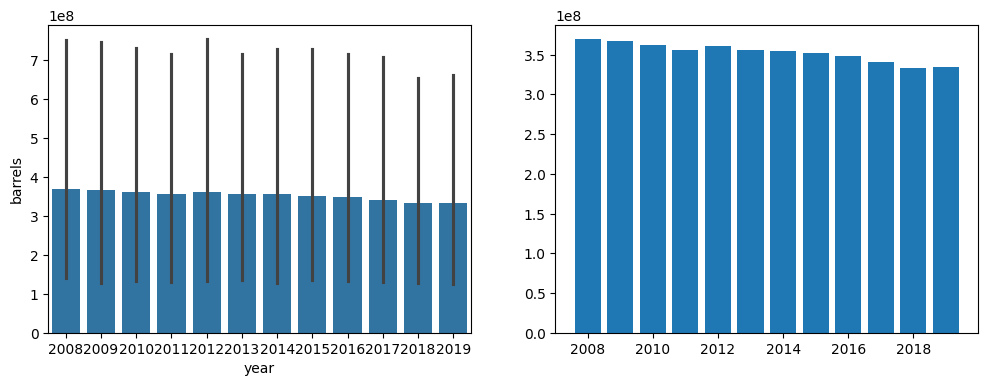

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x='year', y='barrels', data=df, ax=axes[0], estimator ='sum')

axes[1].bar(df_aux['year'], df_aux['barrels'])

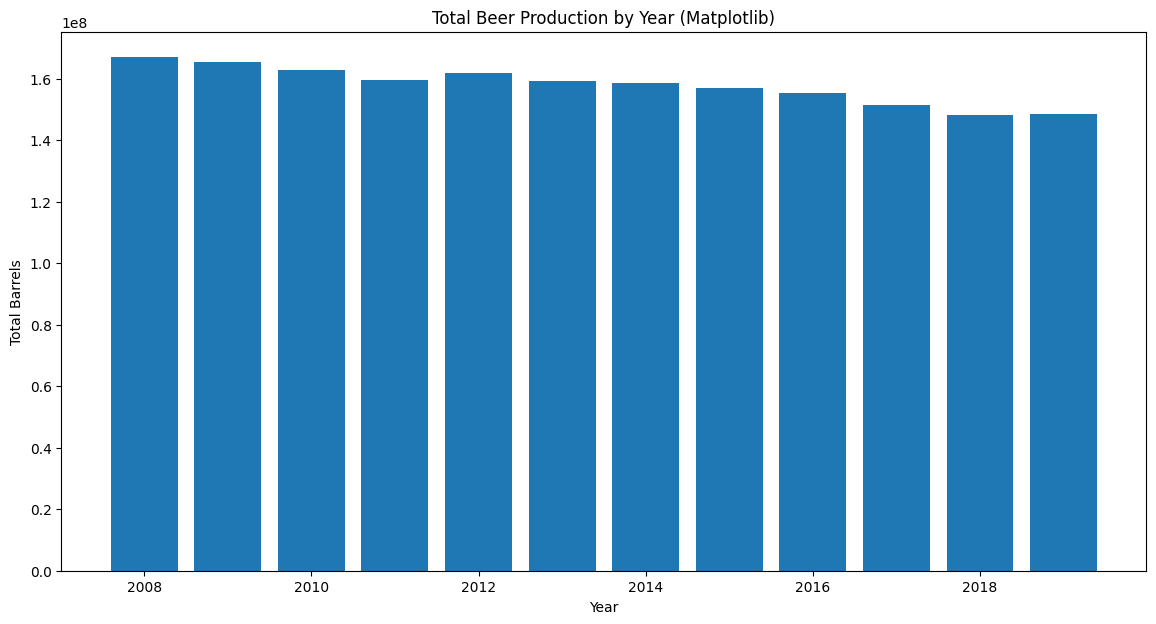

In [ ]:
# Gráfico de barras com matplotlib
plt.figure(figsize=(14, 7))
plt.bar(df['year'], df['barrels'])
plt.title('Total Beer Production by Year (Matplotlib)')
plt.xlabel('Year')
plt.ylabel('Total Barrels')
plt.show()


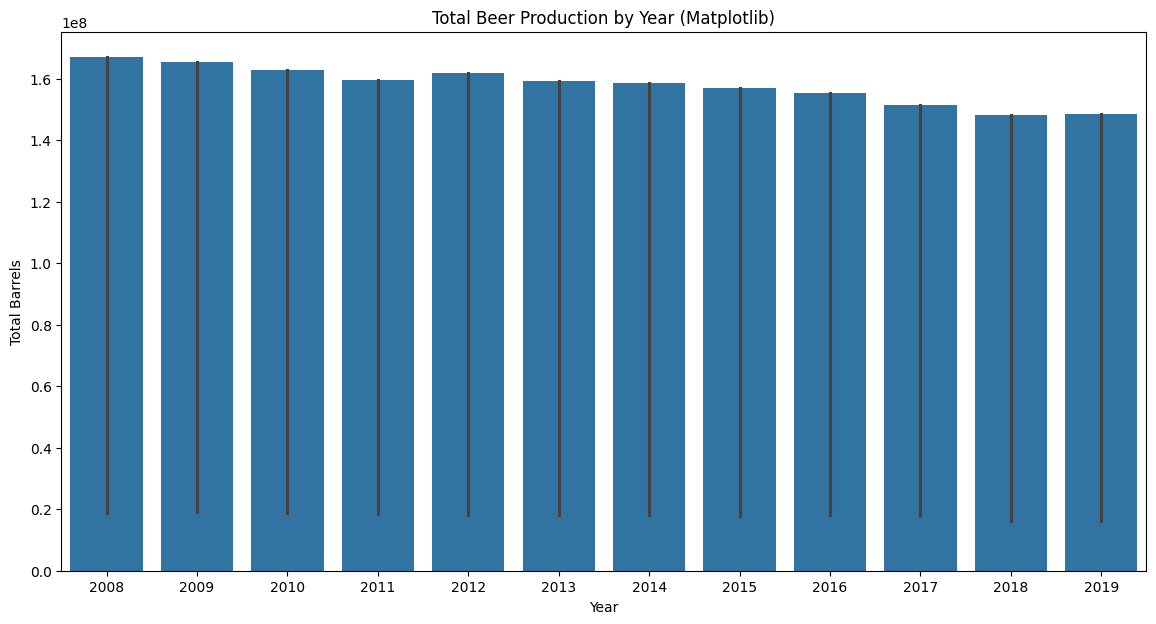

In [ ]:
# Gráfico de barras com matplotlib
plt.figure(figsize=(14, 7))
sns.barplot(data=df,x='year',y='barrels',estimator='max')
plt.title('Total Beer Production by Year (Matplotlib)')
plt.xlabel('Year')
plt.ylabel('Total Barrels')
plt.show()

In [ ]:
df[(df['year']==2018)]['barrels'].sum()

333778335.00000006

In [ ]:
df_2019 = df[(df['year']==2019) & ~(df['state'] == 'total')]
df_2019.head()

state  year    barrels         type
11    AK  2019   32849.37  On Premises
23    AL  2019   47160.08  On Premises
35    AR  2019   16568.73  On Premises
47    AZ  2019   49699.26  On Premises
59    CA  2019  399692.97  On Premises

In [ ]:
df_2019['state'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

Q02. Quais os 3 estados com maior produção de barris no ano de 2019?


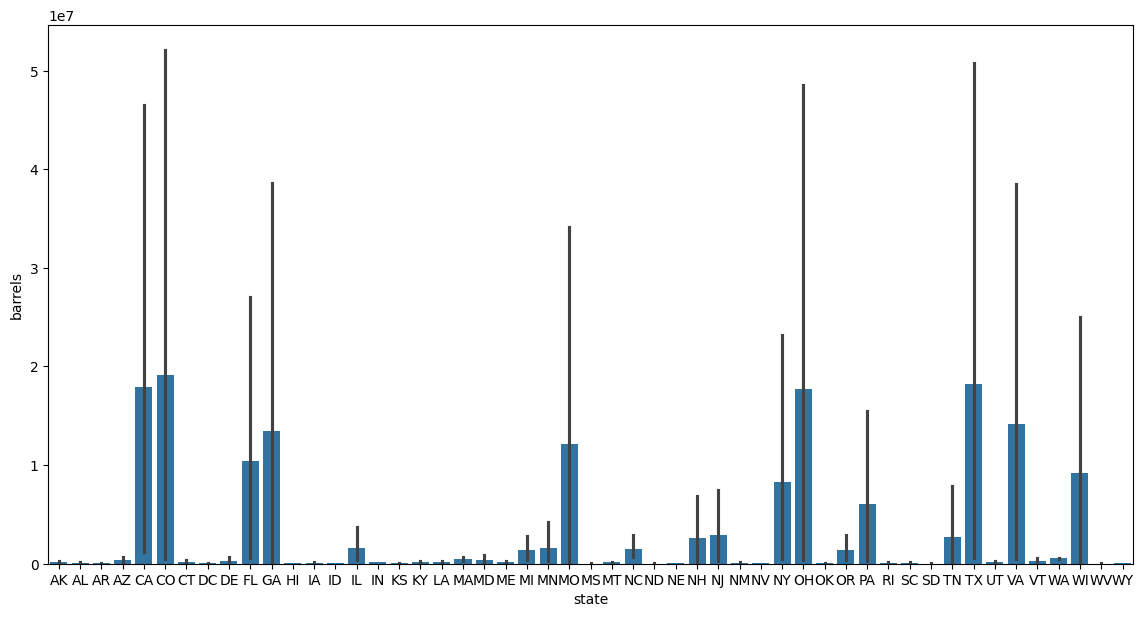

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(data=df_2019,x='state',y='barrels',estimator='sum')

# plt.tight_layout()
plt.show()


In [ ]:
df_2019 = df[(df['year'] == 2019) & (df['state'] != 'total')]

# Agrupar os dados por estado e somar a produção de barris
production_per_state_2019 = df_2019.groupby('state')['barrels'].sum().reset_index()

# Ordenar os estados pela produção total e selecionar os 3 maiores
top_3_states_2019 = production_per_state_2019.sort_values(by='barrels', ascending=False).head(3)

top_3_states_2019

state      barrels
5     CO  19097585.18
43    TX  18187258.36
4     CA  17872597.37

<BarContainer object of 3 artists>

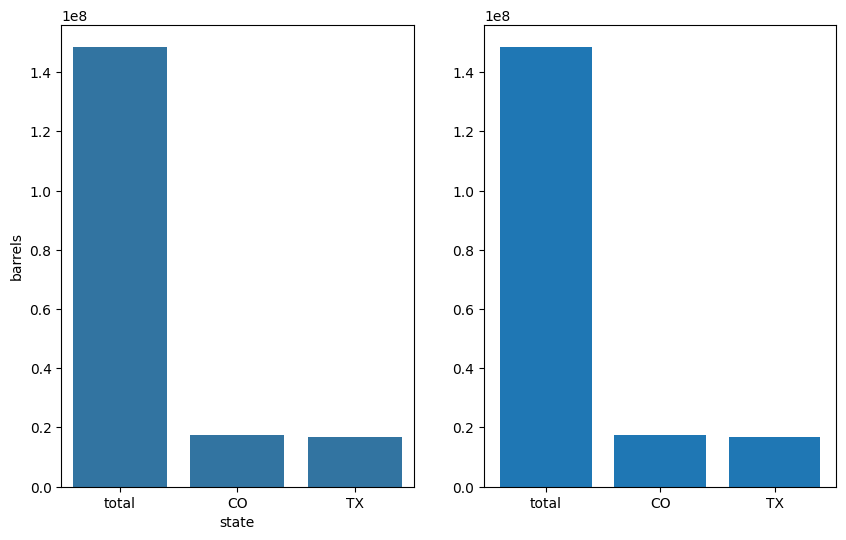

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,6))
sns.barplot(x='state', y='barrels', data=df[df['year'] == 2019].sort_values(by='barrels', ascending=False).head(3), ax=axes[0])
axes[1].bar(df[df['year'] == 2019].sort_values(by='barrels', ascending=False).head(3)['state'], df[df['year'] == 2019].sort_values(by='barrels', ascending=False).head(3)['barrels'])

Q03. Qual desses maiores produtores do ano de 2019 teve produção decrescente no período?


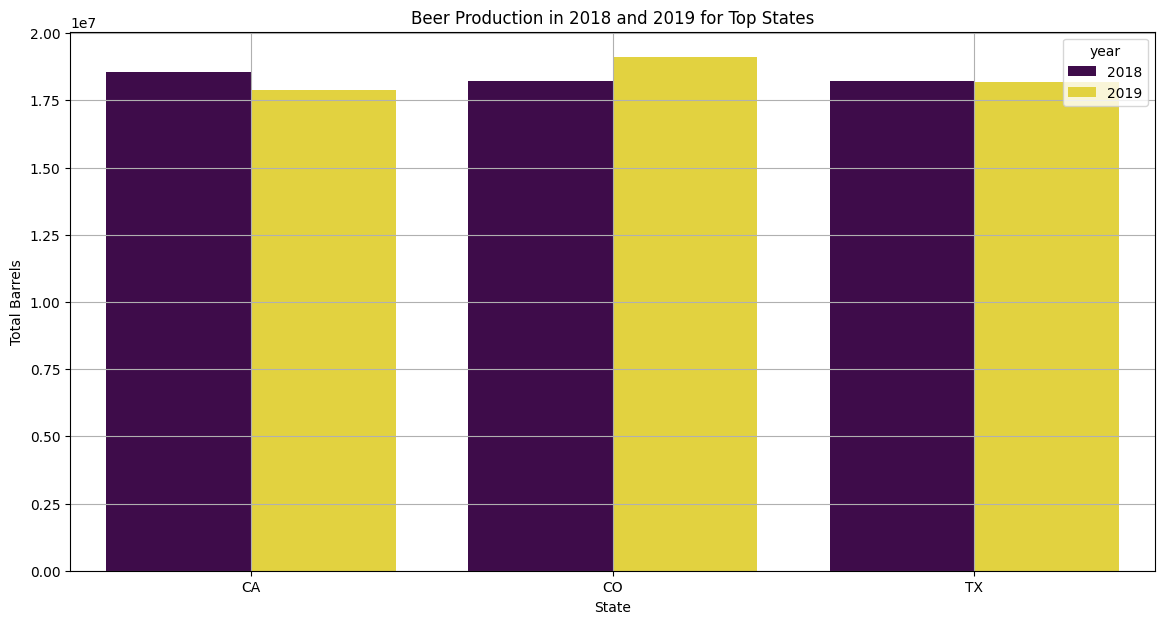

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os dados para os três estados maiores produtores em 2019 e para os anos de 2018 e 2019
top_states = ['CO', 'CA', 'TX']
df_top_states_2018_2019 = df[(df['state'].isin(top_states)) & (df['year'].isin([2018, 2019]))]

# Agrupar os dados por estado e ano, e somar a produção de barris
production_per_year_state_2018_2019 = df_top_states_2018_2019.groupby(['state', 'year'])['barrels'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(data=production_per_year_state_2018_2019, x='state', y='barrels', hue='year', palette='viridis')
plt.title('Beer Production in 2018 and 2019 for Top States')
plt.xlabel('State')
plt.ylabel('Total Barrels')
plt.grid(True)
plt.show()

In [ ]:
years = df['year'].unique()[-3:]

In [ ]:
states = ['CO','TX','OH']

In [ ]:
df_last_years = df[df['year'].isin(years) & df['state'].isin(states)]

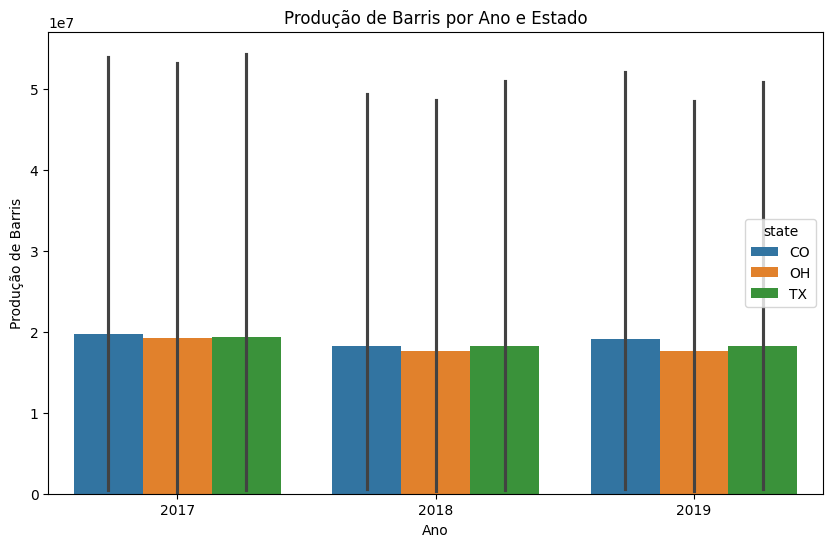

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='barrels', hue='state', data=df_last_years, estimator='sum')
plt.title('Produção de Barris por Ano e Estado')
plt.xlabel('Ano')
plt.ylabel('Produção de Barris')
plt.show()

In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/BostonHousing.csv')
df.drop(columns='b',inplace=True)
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [ ]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [ ]:
df.shape

(506, 13)

In [ ]:
for column in df.columns:
  print(df[column].unique())

Q04. Qual índice de acessibilidade às rodovias radiais apresenta em média preços de casas maiores?

In [ ]:
# Agrupar o DataFrame pelo índice `rad` e calcular a média dos preços das casas (`medv`)
mean_prices_by_rad = df.groupby('rad')['medv'].mean().reset_index()

# Identificar o índice `rad` que apresenta a maior média de preços das casas
max_mean_price_rad = mean_prices_by_rad.loc[mean_prices_by_rad['medv'].idxmax()]

# Exibir o resultado
max_mean_price_rad


rad      8.000000
medv    30.358333
Name: 7, dtype: float64

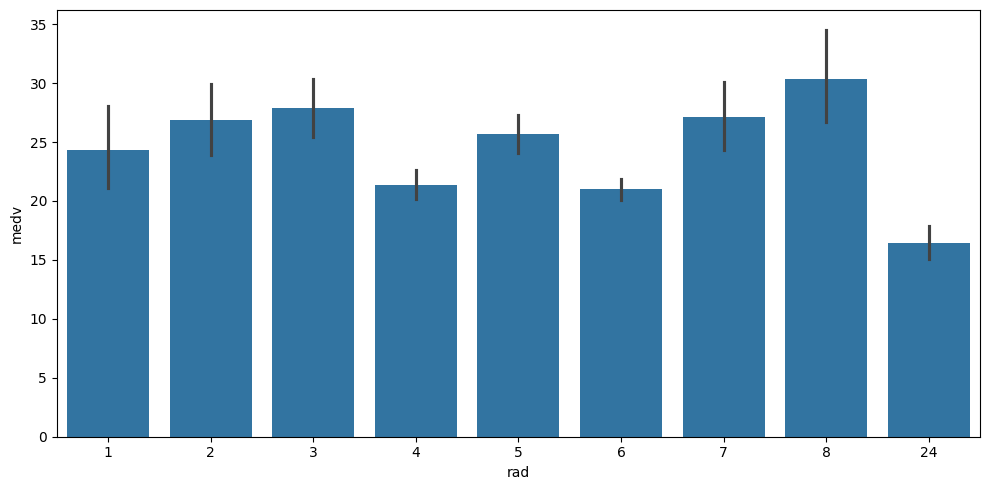

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='rad',y='medv')

plt.tight_layout()
plt.show()

Q05. Para que índices de acessibilidade os valores apresentados das casas apresentam maior e menor incerteza? (assinale a melhor resposta)

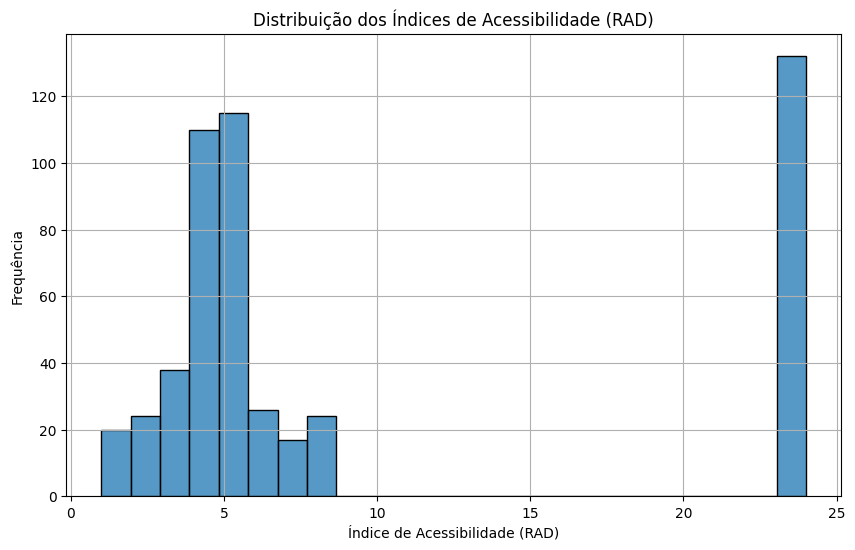

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar um histograma simples dos índices de acessibilidade (RAD)
plt.figure(figsize=(10, 6))
sns.histplot(df['rad'], bins=24, kde=False)
plt.title('Distribuição dos Índices de Acessibilidade (RAD)')
plt.xlabel('Índice de Acessibilidade (RAD)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Q06A. Para que índices de acessibilidade apresentam preços com mais incerteza por esse critério? (nr outliers) (assinale a melhor resposta)

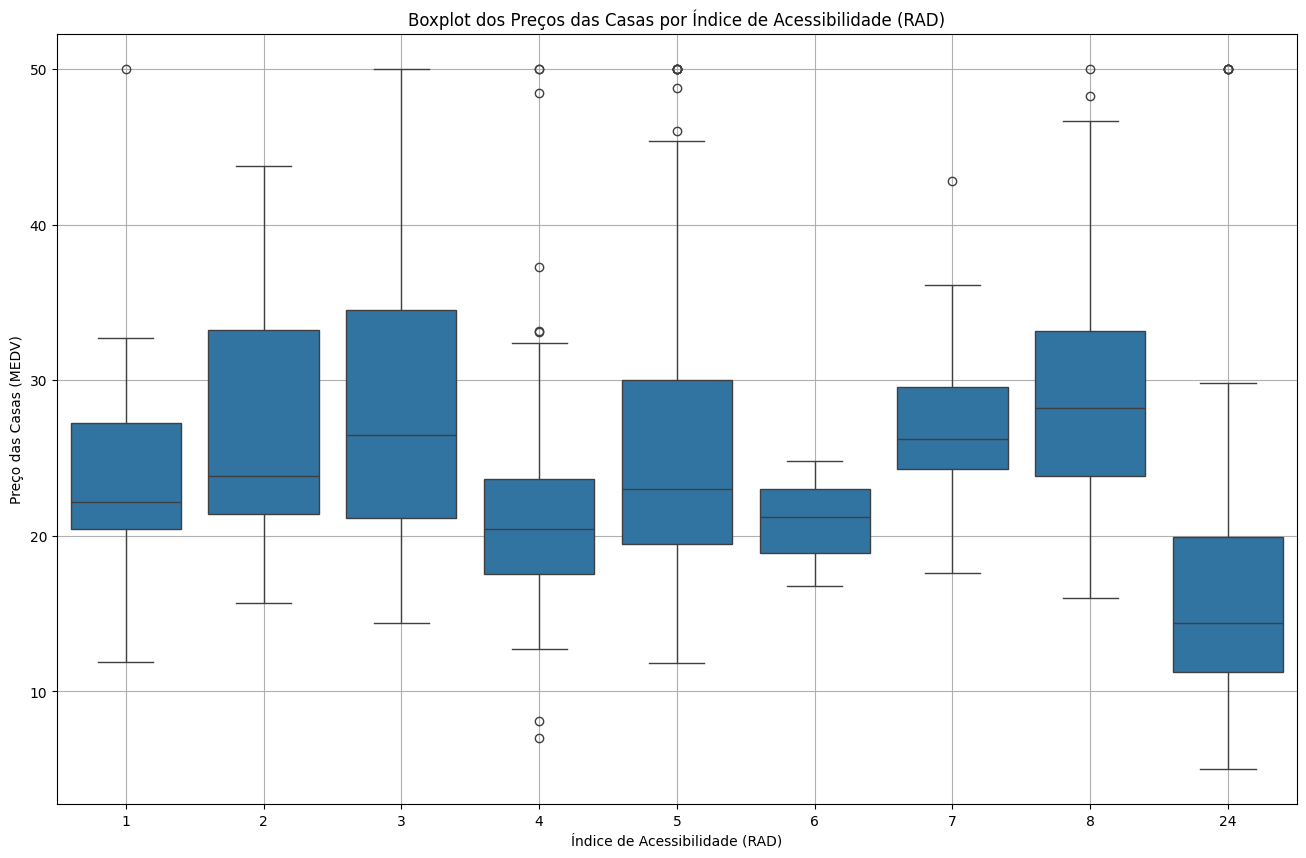

In [ ]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='rad', y='medv', data=df)
plt.title('Boxplot dos Preços das Casas por Índice de Acessibilidade (RAD)')
plt.xlabel('Índice de Acessibilidade (RAD)')
plt.ylabel('Preço das Casas (MEDV)')
plt.grid(True)
plt.show()

Q06B. Para que índices de acessibilidade apresentam preços com maior possibilidade de valores discrepantes para baixo? (assinale a melhor resposta)

In [ ]:
# Função para identificar outliers inferiores
def find_lower_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    return (data < lower_bound)

# Identificar outliers inferiores para cada grupo de `rad`
df['lower_outlier'] = df.groupby('rad')['medv'].transform(find_lower_outliers)

# Contar o número de outliers inferiores por grupo de `rad`
lower_outliers_count = df.groupby('rad')['lower_outlier'].sum().reset_index()

# Identificar os índices de acessibilidade com o maior número de outliers inferiores
most_lower_outliers_rad = lower_outliers_count.sort_values(by='lower_outlier', ascending=False).head(1)

# Exibir o resultado
most_lower_outliers_rad

rad  lower_outlier
3    4              2

Q07A. Qual atributo apresenta uma distribuição claramente bimodal? (assinale a melhor resposta)

Q07B. Qual atributo apresenta uma distribuição mais próxima da normal? (assinale a melhor resposta)

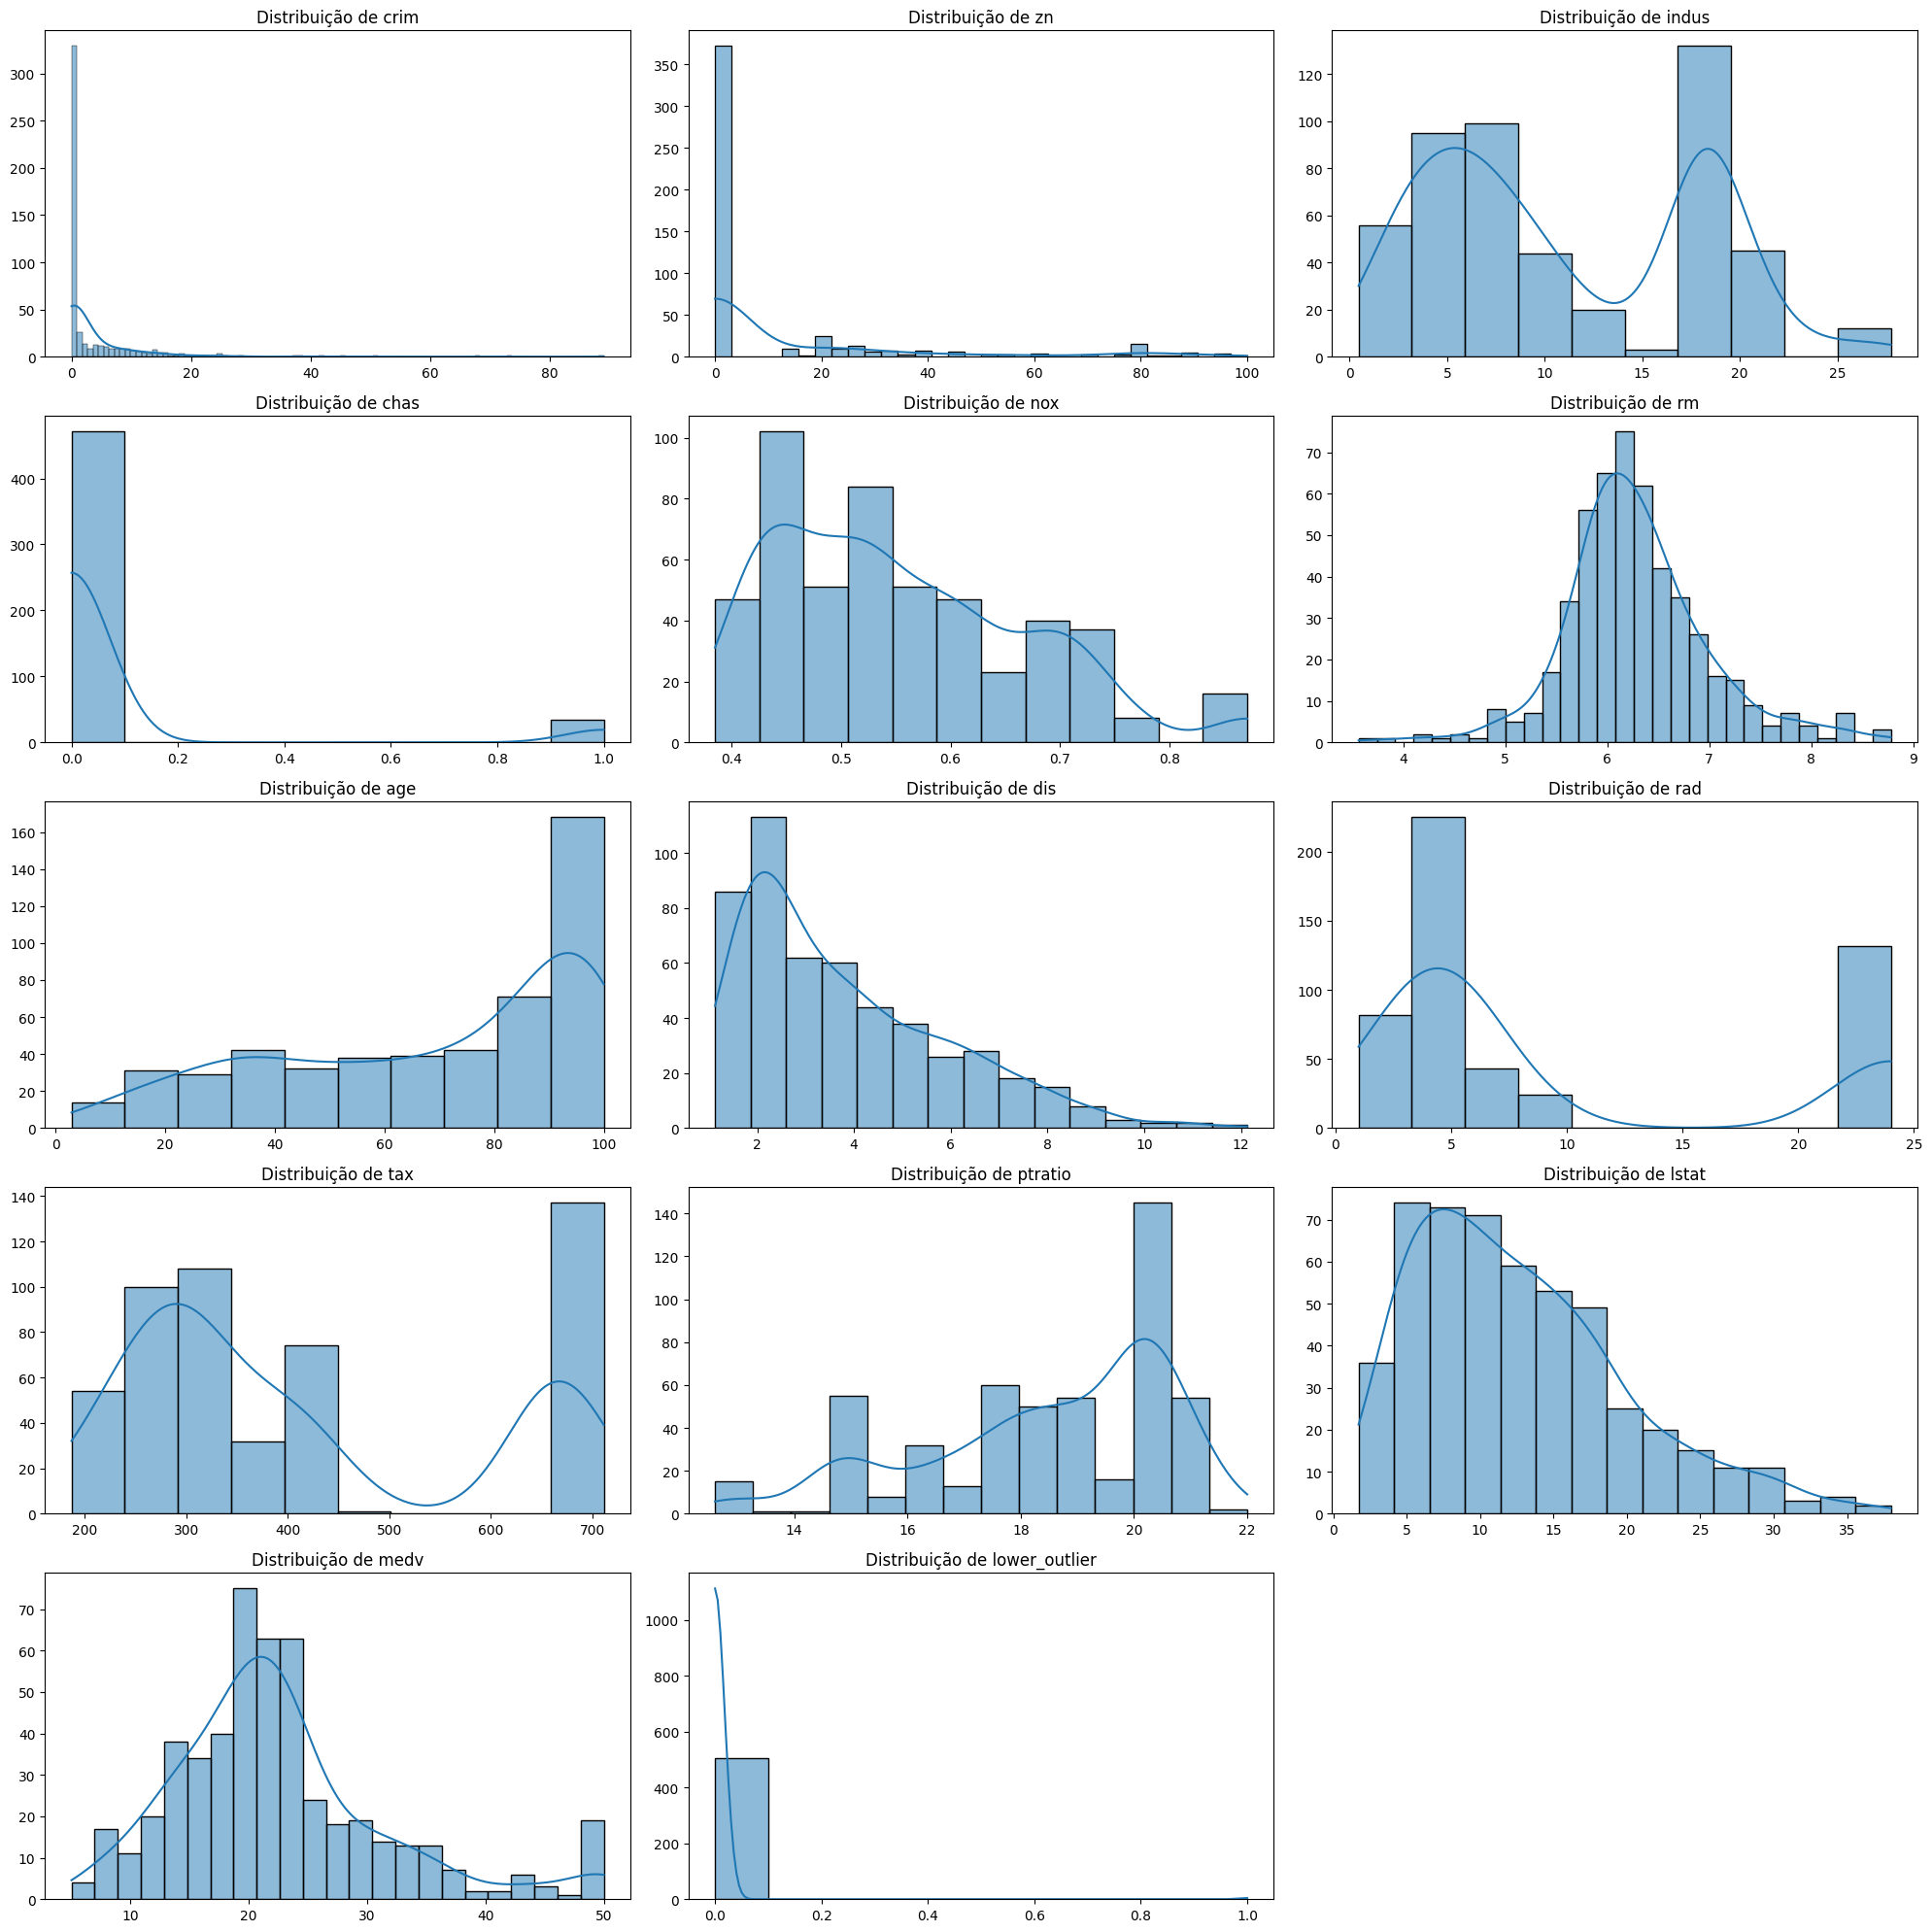

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Listar todas as colunas do DataFrame
columns = df.columns

# Plotar histogramas para cada atributo
plt.figure(figsize=(20, 20))

for i, col in enumerate(columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  lower_outlier  
0   4.98  24.0          False  
1   9.14  21.6          False  
2   4.03  34.7          False  
3   2.94  33.4          False  
4   5.33  36.2          False

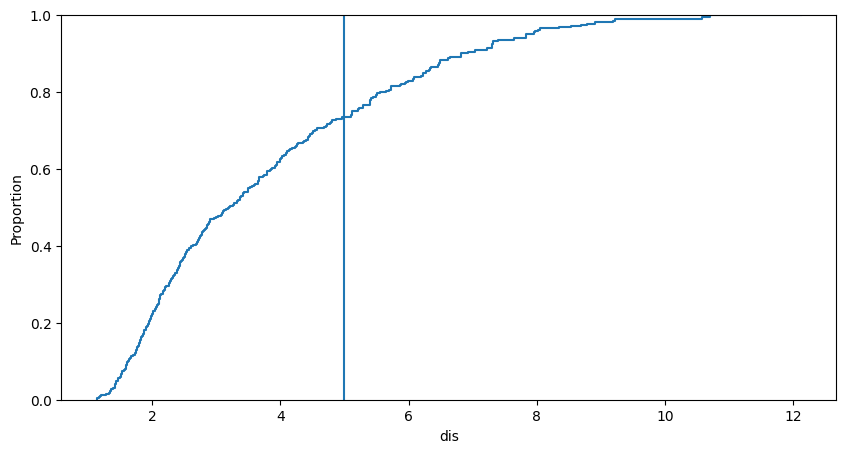

In [ ]:
plt.figure(figsize=(10,5))

sns.ecdfplot(df['dis'])
plt.axvline(5)

In [ ]:
# Calcular a probabilidade acumulada para dis <= 5
probability = (df['dis'] <= 5).mean()
probability

0.733201581027668

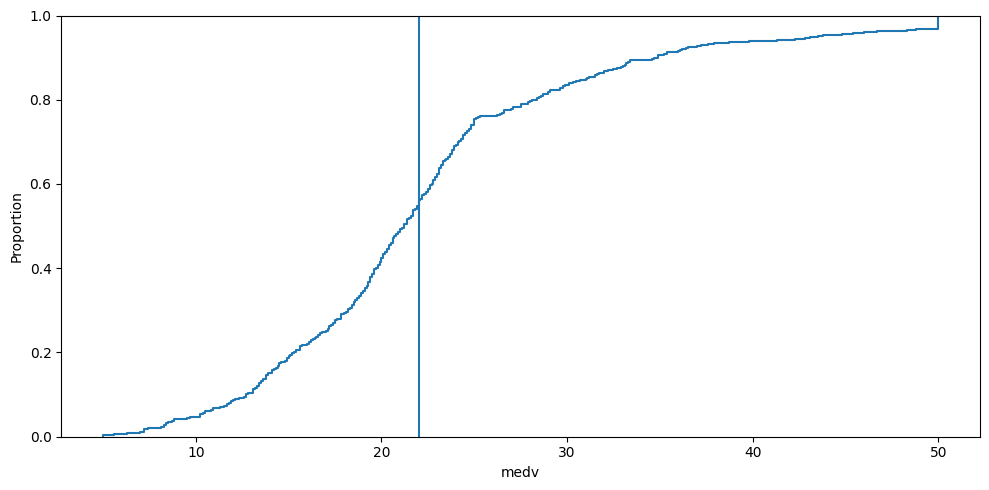

In [ ]:
plt.figure(figsize=(10,5))

sns.ecdfplot(df['medv'])
plt.axvline(22)
plt.tight_layout()
plt.show()

In [ ]:
# Calcular a probabilidade acumulada para dis <= 5
probability = (df['medv'] <= 22).mean()
probability

0.5612648221343873

## Ex_PlotRelations


In [ ]:
#@markdown **Just run to prepare Lab**
%%capture none
!pip install dataprep

import pandas as pd

from dataprep.datasets import load_dataset
df = load_dataset('house_prices_train')

df = df[[ 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'YearBuilt', 'BedroomAbvGr', 'YrSold', 'SaleType', 'SalePrice', 'GrLivArea']]
df.to_csv('house_prices.csv', index=False)

In [ ]:
df = pd.read_csv("house_prices.csv")
df.head()

MSSubClass MSZoning  LotFrontage  LotArea  YearBuilt  BedroomAbvGr  YrSold  \
0          60       RL         65.0     8450       2003             3    2008   
1          20       RL         80.0     9600       1976             3    2007   
2          60       RL         68.0    11250       2001             3    2008   
3          70       RL         60.0     9550       1915             3    2006   
4          60       RL         84.0    14260       2000             4    2008   

  SaleType  SalePrice  GrLivArea  
0       WD     208500       1710  
1       WD     181500       1262  
2       WD     223500       1786  
3       WD     140000       1717  
4       WD     250000       2198

**Q1. Linear Correlations**
Crie gráficos de dispersão ou empregue o pairplot para verificar qual atributos dos imóveis apresenta maior correlação com os preços dos imóveis. Confirme isso verificando a correlação (Pearson) com o método .corr() ou a função from scipy.stats import pearsonr. Sugestão: explore esses métodos na documentação das bibliotecas.

Q. Qual o atributo mais correlacionado aos preços e qual o valor do coeficiente (pearson) encontrado?

Dica: melhor com df.select_dtypes(include='number')

In [ ]:
from scipy.stats import pearsonr

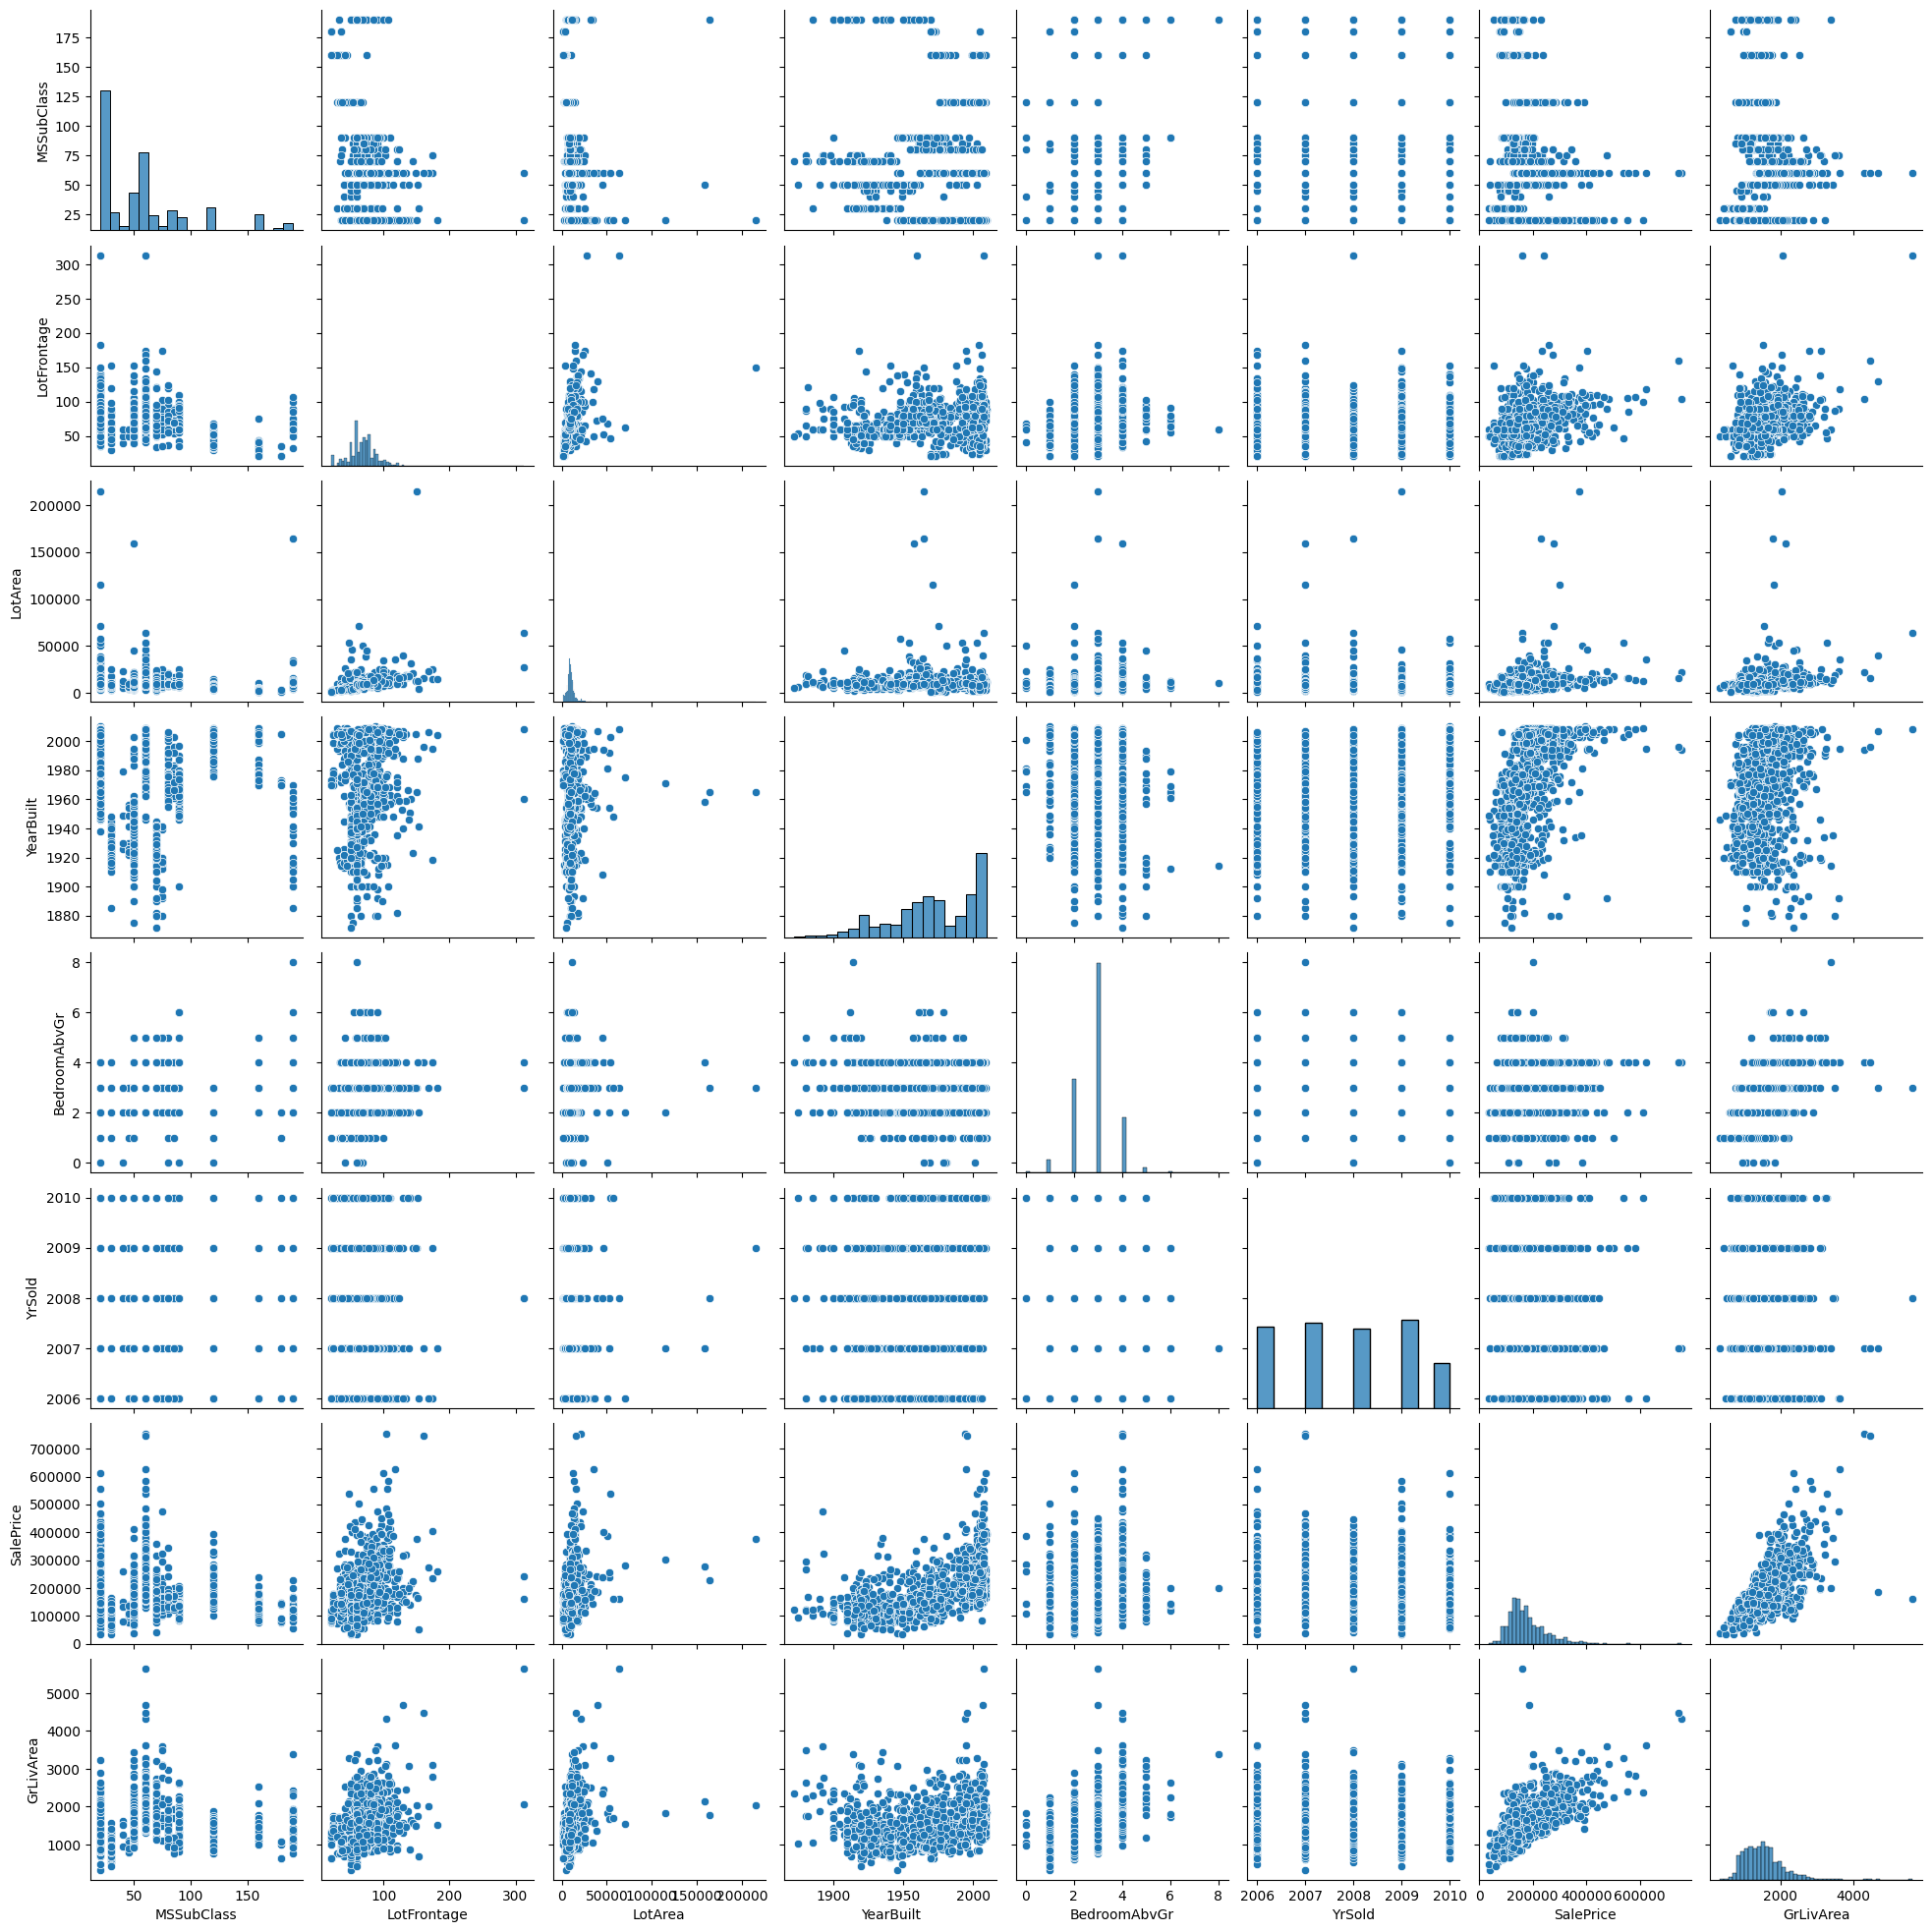

In [ ]:
sns.pairplot(df)

In [ ]:
df_numeric = df.select_dtypes(include='number')

In [ ]:
df_numeric.head()

MSSubClass  LotFrontage  LotArea  YearBuilt  BedroomAbvGr  YrSold  \
0          60         65.0     8450       2003             3    2008   
1          20         80.0     9600       1976             3    2007   
2          60         68.0    11250       2001             3    2008   
3          70         60.0     9550       1915             3    2006   
4          60         84.0    14260       2000             4    2008   

   SalePrice  GrLivArea  
0     208500       1710  
1     181500       1262  
2     223500       1786  
3     140000       1717  
4     250000       2198

In [ ]:
# Calcular a correlação de Pearson entre os preços dos imóveis e os outros atributos
correlation_matrix = df_numeric.corr()

# Encontrar a correlação de Pearson entre SalePrice e os outros atributos
saleprice_corr = correlation_matrix['SalePrice'].drop('SalePrice').sort_values(ascending=False)

# Atributo mais correlacionado e o valor do coeficiente de Pearson
most_correlated_attribute = saleprice_corr.idxmax()
most_correlated_value = saleprice_corr.max()

# Confirmar a correlação com pearsonr
pearson_coefficient, p_value = pearsonr(df_numeric['SalePrice'], df_numeric[most_correlated_attribute])

most_correlated_attribute, most_correlated_value, pearson_coefficient, p_value

('GrLivArea', 0.7086244776126517, 0.7086244776126522, 4.518033646776417e-223)

In [ ]:
correlation_matrix

MSSubClass  LotFrontage   LotArea  YearBuilt  BedroomAbvGr  \
MSSubClass      1.000000    -0.386347 -0.139781   0.027850     -0.023438   
LotFrontage    -0.386347     1.000000  0.426095   0.123349      0.263170   
LotArea        -0.139781     0.426095  1.000000   0.014228      0.119690   
YearBuilt       0.027850     0.123349  0.014228   1.000000     -0.070651   
BedroomAbvGr   -0.023438     0.263170  0.119690  -0.070651      1.000000   
YrSold         -0.021407     0.007450 -0.014261  -0.013618     -0.036014   
SalePrice      -0.084284     0.351799  0.263843   0.522897      0.168213   
GrLivArea       0.074853     0.402797  0.263116   0.199010      0.521270   

                YrSold  SalePrice  GrLivArea  
MSSubClass   -0.021407  -0.084284   0.074853  
LotFrontage   0.007450   0.351799   0.402797  
LotArea      -0.014261   0.263843   0.263116  
YearBuilt    -0.013618   0.522897   0.199010  
BedroomAbvGr -0.036014   0.168213   0.521270  
YrSold        1.000000  -0.028923  -0.036526  
SalePrice    -0.028923   1.000000   0.708624  
GrLivArea    -0.036526   0.708624   1.000000

In [ ]:
saleprice_corr

GrLivArea       0.708624
YearBuilt       0.522897
LotFrontage     0.351799
LotArea         0.263843
BedroomAbvGr    0.168213
YrSold         -0.028923
MSSubClass     -0.084284
Name: SalePrice, dtype: float64

<Axes: >

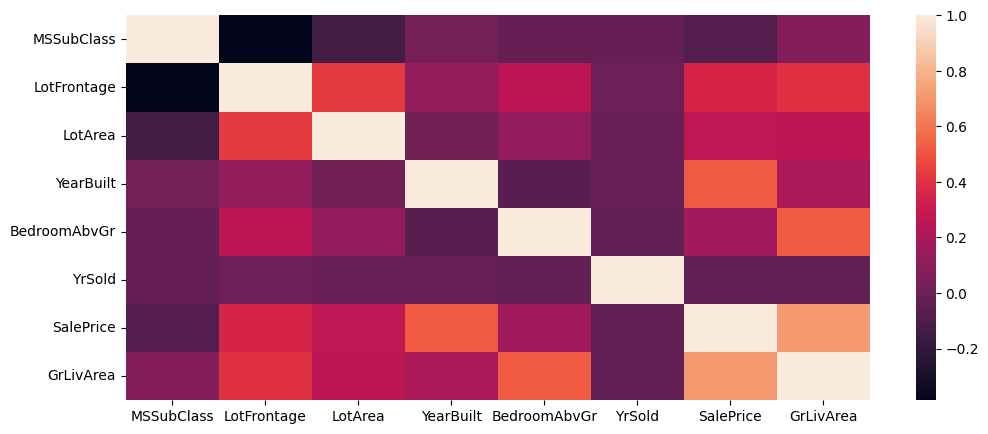

In [ ]:
plt.figure(figsize=(12,5))

sns.heatmap(correlation_matrix)

**Q2. Correlation Heatmap**
Produza um heatmap das correlações numéricas de todas as variáveis. Inclua os valores das correlações no gráfico (parâmetro annot) e ajuste deamais aspectos do gráfico para que fique legível e com bom aspecto. Algumas sugestões estão nas alternativas do questionário e você pode buscar se aproximar da figura abaixo.

Q2. No ajuste do aspecto do gráfico o que pareceu ser mais útil?

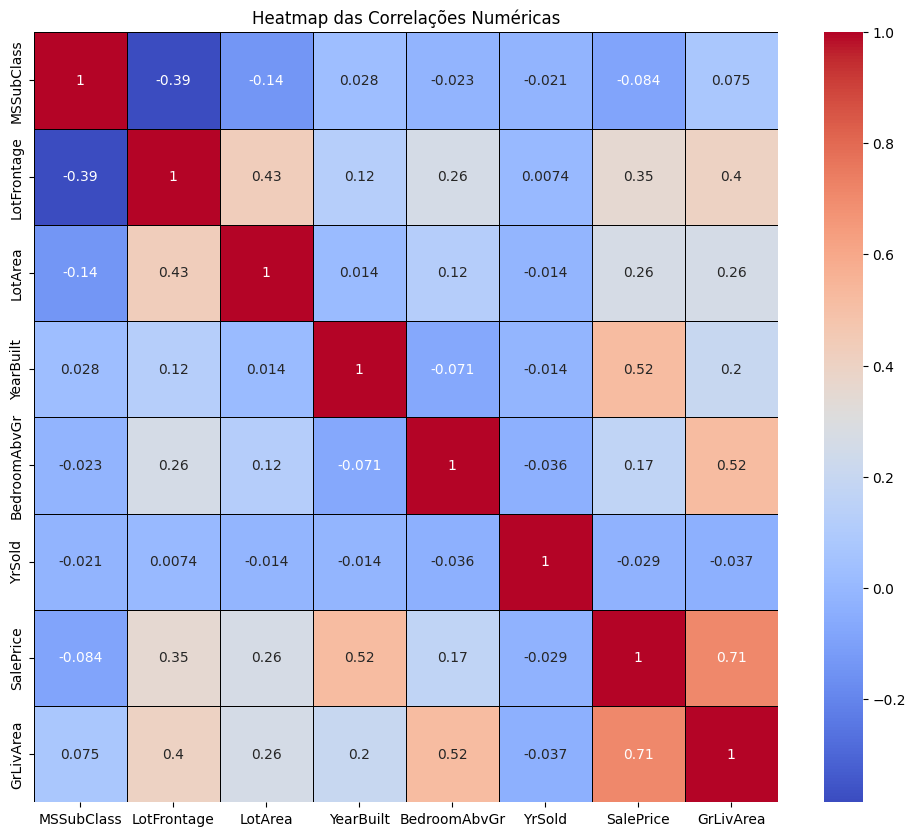

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas
df_numeric = df.select_dtypes(include='number')

# Calcular a matriz de correlação
correlation_matrix = df_numeric.corr()

# Criar o heatmap
plt.figure(figsize=(12, 10))
cmap=sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, linecolor='black',cmap=cmap)
plt.title('Heatmap das Correlações Numéricas')
plt.show()


**Q3. "Nice" Correlation Table**

Use a função abaixo para produzir a tabela de correlação para os diferentes coeficientes, isto é pearson, spearman e kendall.

Q3. Para que atributos os coeficientes divergem de orientação?

Sim, os coeficientes podem divergir!

In [ ]:
import pandas as pd
from IPython.display import display, Latex, HTML

def gera_latex_table(df, titulo):
# create a latex table from a dataframe
# Created by: Rogerio de Oliveira
# Date: 2023-12-05
#
# issues: df.style.to_latex changes, replace changes


  latex_table = df.style.to_latex(hrules=True)

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  return latex_table

In [ ]:
pearson_corr = df_numeric.corr(method='pearson')

spearman_corr = df_numeric.corr(method='spearman')

kendall_corr = df_numeric.corr(method='kendall')

In [ ]:
pearson_corr

MSSubClass  LotFrontage   LotArea  YearBuilt  BedroomAbvGr  \
MSSubClass      1.000000    -0.386347 -0.139781   0.027850     -0.023438   
LotFrontage    -0.386347     1.000000  0.426095   0.123349      0.263170   
LotArea        -0.139781     0.426095  1.000000   0.014228      0.119690   
YearBuilt       0.027850     0.123349  0.014228   1.000000     -0.070651   
BedroomAbvGr   -0.023438     0.263170  0.119690  -0.070651      1.000000   
YrSold         -0.021407     0.007450 -0.014261  -0.013618     -0.036014   
SalePrice      -0.084284     0.351799  0.263843   0.522897      0.168213   
GrLivArea       0.074853     0.402797  0.263116   0.199010      0.521270   

                YrSold  SalePrice  GrLivArea  
MSSubClass   -0.021407  -0.084284   0.074853  
LotFrontage   0.007450   0.351799   0.402797  
LotArea      -0.014261   0.263843   0.263116  
YearBuilt    -0.013618   0.522897   0.199010  
BedroomAbvGr -0.036014   0.168213   0.521270  
YrSold        1.000000  -0.028923  -0.036526  
SalePrice    -0.028923   1.000000   0.708624  
GrLivArea    -0.036526   0.708624   1.000000

In [ ]:
spearman_corr

MSSubClass  LotFrontage   LotArea  YearBuilt  BedroomAbvGr  \
MSSubClass      1.000000    -0.314265 -0.269570   0.035848      0.068763   
LotFrontage    -0.314265     1.000000  0.649633   0.194510      0.327679   
LotArea        -0.269570     0.649633  1.000000   0.103385      0.337788   
YearBuilt       0.035848     0.194510  0.103385   1.000000     -0.035257   
BedroomAbvGr    0.068763     0.327679  0.337788  -0.035257      1.000000   
YrSold         -0.027401     0.003461 -0.027473  -0.014100     -0.028372   
SalePrice       0.007192     0.409076  0.456461   0.652682      0.234907   
GrLivArea       0.203576     0.375844  0.449040   0.288493      0.542948   

                YrSold  SalePrice  GrLivArea  
MSSubClass   -0.027401   0.007192   0.203576  
LotFrontage   0.003461   0.409076   0.375844  
LotArea      -0.027473   0.456461   0.449040  
YearBuilt    -0.014100   0.652682   0.288493  
BedroomAbvGr -0.028372   0.234907   0.542948  
YrSold        1.000000  -0.029899  -0.026256  
SalePrice    -0.029899   1.000000   0.731310  
GrLivArea    -0.026256   0.731310   1.000000

In [ ]:
kendall_corr

MSSubClass  LotFrontage   LotArea  YearBuilt  BedroomAbvGr  \
MSSubClass      1.000000    -0.236067 -0.200790   0.010922      0.064922   
LotFrontage    -0.236067     1.000000  0.510666   0.138978      0.259606   
LotArea        -0.200790     0.510666  1.000000   0.074436      0.267224   
YearBuilt       0.010922     0.138978  0.074436   1.000000     -0.026412   
BedroomAbvGr    0.064922     0.259606  0.267224  -0.026412      1.000000   
YrSold         -0.021802     0.002403 -0.020255  -0.009402     -0.023942   
SalePrice      -0.003979     0.290361  0.314174   0.470960      0.185607   
GrLivArea       0.141142     0.261243  0.304676   0.191389      0.436576   

                YrSold  SalePrice  GrLivArea  
MSSubClass   -0.021802  -0.003979   0.141142  
LotFrontage   0.002403   0.290361   0.261243  
LotArea      -0.020255   0.314174   0.304676  
YearBuilt    -0.009402   0.470960   0.191389  
BedroomAbvGr -0.023942   0.185607   0.436576  
YrSold        1.000000  -0.021796  -0.019110  
SalePrice    -0.021796   1.000000   0.543942  
GrLivArea    -0.019110   0.543942   1.000000

In [ ]:
distributions = pd.DataFrame()
distributions['pearson'] = pearson_corr['SalePrice']

In [ ]:
distributions['kendall'] = kendall_corr['SalePrice']
distributions['spearman'] = spearman_corr['SalePrice']
distributions.head()

pearson   kendall  spearman
MSSubClass   -0.084284 -0.003979  0.007192
LotFrontage   0.351799  0.290361  0.409076
LotArea       0.263843  0.314174  0.456461
YearBuilt     0.522897  0.470960  0.652682
BedroomAbvGr  0.168213  0.185607  0.234907

In [ ]:
display(Latex(gera_latex_table(distributions, "Correlation Table")))

<IPython.core.display.Latex object>

In [ ]:
coefs = ['pearson', 'spearman' , 'kendall']

for coef in coefs:
  corr = df.select_dtypes(include='number').corr(method=coef)[['SalePrice']]
  display(Latex(gera_latex_table(corr,f'SalePrice Correlations - {coef}')))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

**Q4. Outliers**

Uma análise importante é a dos outliers. Exclua os outliers de preços e verifique se os coeficientes permanecem robustos.

Q. O coeficiente de pearson permanece robusto quanto ao atributo de maior correlação para os preços?

Dica: aprenda a usar fig['fliers'][0].get_data() do matplotlib para excluir os outliers.

In [ ]:
df

MSSubClass MSZoning  LotFrontage  LotArea  YearBuilt  BedroomAbvGr   
0             60       RL         65.0     8450       2003             3  \
1             20       RL         80.0     9600       1976             3   
2             60       RL         68.0    11250       2001             3   
3             70       RL         60.0     9550       1915             3   
4             60       RL         84.0    14260       2000             4   
...          ...      ...          ...      ...        ...           ...   
1455          60       RL         62.0     7917       1999             3   
1456          20       RL         85.0    13175       1978             3   
1457          70       RL         66.0     9042       1941             4   
1458          20       RL         68.0     9717       1950             2   
1459          20       RL         75.0     9937       1965             3   

      YrSold SaleType  SalePrice  GrLivArea  
0       2008       WD     208500       1710  
1       2007       WD     181500       1262  
2       2008       WD     223500       1786  
3       2006       WD     140000       1717  
4       2008       WD     250000       2198  
...      ...      ...        ...        ...  
1455    2007       WD     175000       1647  
1456    2010       WD     210000       2073  
1457    2010       WD     266500       2340  
1458    2010       WD     142125       1078  
1459    2008       WD     147500       1256  

[1460 rows x 10 columns]

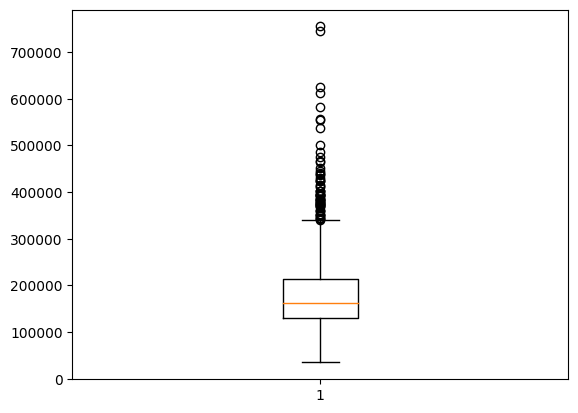

In [ ]:
f = plt.boxplot(df['SalePrice'])

In [ ]:
outliers = f['fliers'][0].get_data()[1]

In [ ]:
outliers

array([345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000,
       386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426,
       437154, 394432, 426000, 555000, 440000, 380000, 374000, 430000,
       402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000,
       402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000,
       395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000,
       556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500,
       381000, 410000, 466500, 377500, 394617])

In [ ]:
df_numeric.corr(method='pearson')
df_no_outliers = df_numeric[~(df_numeric).isin(outliers)]

In [ ]:

# Recalcular a correlação de Pearson
correlation_matrix_no_outliers = df_no_outliers.corr()
correlation_matrix_no_outliers['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
GrLivArea       0.661325
YearBuilt       0.564558
LotFrontage     0.319597
LotArea         0.249812
BedroomAbvGr    0.201610
YrSold         -0.028245
MSSubClass     -0.060111
Name: SalePrice, dtype: float64

In [ ]:
attribute = correlation_matrix['SalePrice'].sort_values(ascending=False).index[1]

# Coeficientes de correlação
corr_before = correlation_matrix.loc[attribute, 'SalePrice']
corr_after = correlation_matrix_no_outliers.loc[attribute, 'SalePrice']

corr_before, corr_after


(0.7086244776126517, 0.6613245737771337)

**Q5. Consistência do coeficiente por diferentes classes**

Verifique se coeficiente de pearson para o atributo mais correlacionado é robusto para os diferentes tipos de venda SaleType e MSZoning.

Q. Para quais tipos o coeficiente se mantêm robusto?

In [ ]:
df_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'BedroomAbvGr',
       'YrSold', 'SalePrice', 'GrLivArea'],
      dtype='object')

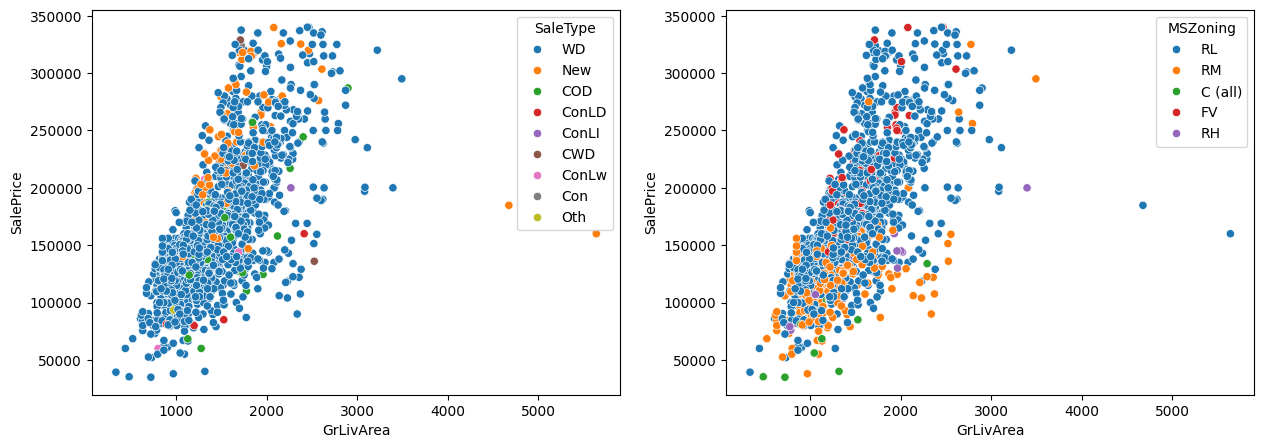

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(x=df_numeric['GrLivArea'],y=df_numeric['SalePrice'],hue=df['SaleType'],ax = ax[0])

sns.scatterplot(x=df_numeric['GrLivArea'],y=df_numeric['SalePrice'],hue=df['MSZoning'],ax = ax[1])

plt.show()


**Q6. Preços para Novos e Outros, Linha Média**

Você concluiu que os preços dos imóveis novos destoam dos demais. Vamos então produzir um gráfico para evidenciar essa análise.

Como não há uma função bem definida e não temos um modelo de função conhecido, vamos criar uma linha média de valores. Você pode empregar a função a seguir para criar os valores e criar um gráfico o mais próximo possível do abaixo.

Poste no Canvas o gráfico produzido.

In [ ]:
def media_bins(num_bins,df,column_bin,column_target):
# create media bins values
# Created by: Rogerio de Oliveira
# Date: 2023-12-01
#
# issues: how put other than means?

  bin_edges = np.linspace(df[column_bin].min(), df[column_bin].max(), num_bins + 1)
  b_mean = df.groupby(pd.cut(df[column_bin], bin_edges))[column_target].mean()
  bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

  return bin_centers,b_mean

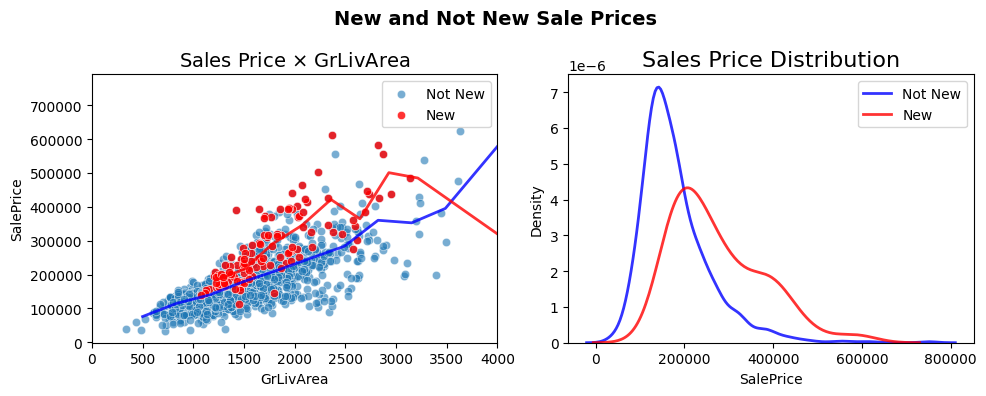

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
bin_centers,b_mean = media_bins(16,df,'GrLivArea','SalePrice')

sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],alpha=0.6,label='Not New')
sns.lineplot(x=bin_centers,y=b_mean,color='b',lw=2,alpha=0.8)

bin_centers,b_mean = media_bins(16,df[df.SaleType == 'New'],'GrLivArea','SalePrice')

sns.lineplot(x=bin_centers,y=b_mean,color='r',lw=2,alpha=0.8)
sns.scatterplot(x=df[df.SaleType == 'New']['GrLivArea'],y=df[df.SaleType == 'New']['SalePrice'],color='r',alpha=0.8,label='New')

plt.xlim([0,4000])
plt.title('Sales Price $\\times$ GrLivArea',fontsize=14)
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(x=df['SalePrice'],color='b',alpha=0.8,label='Not New',lw=2)
sns.kdeplot(x=df[df.SaleType == 'New']['SalePrice'],color='r',alpha=0.8,label='New',lw=2)

plt.title('Sales Price Distribution',fontsize=16)
plt.legend()

plt.suptitle('New and Not New Sale Prices',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

## Ex_PDFCDFPPF

As vendas diárias de uma loja têm média de R$ 5000. Em geral o volume de vendas tem uma distribuição lognorm. O valor do desvio padrão da distribuição lognormal é 0.5 (note, este é s, shape da distribuição lognorm).

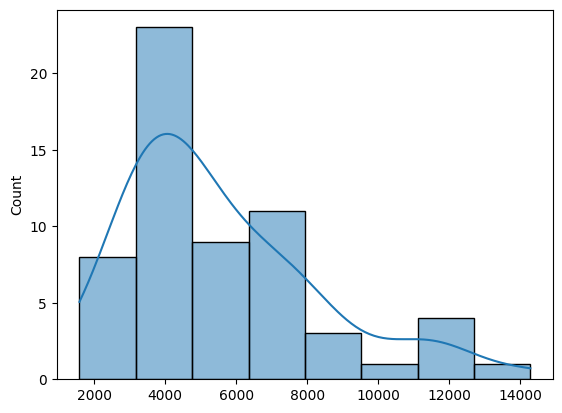

array([11263.9864252 ,  3682.38155891,  3839.53795946,  2924.00309789,
        7707.09803598,  1581.96629529, 11963.30196612,  3417.24428614,
        5864.73595401,  4413.87383583])

In [ ]:
np.random.seed(1)
x = lognorm.rvs(s=0.5, scale=5000, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]

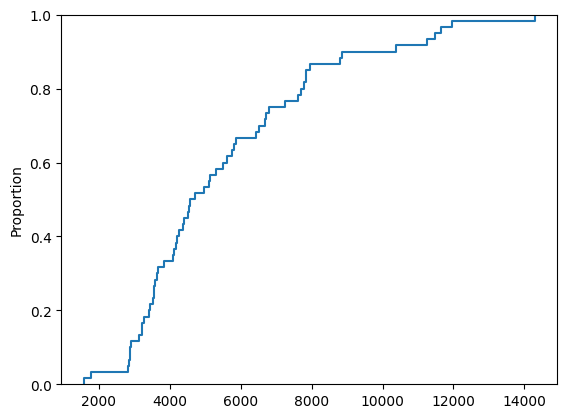

In [ ]:
plt.figure()
teste = sns.ecdfplot(x)


In [ ]:
shape, loc, scale = lognorm.fit(x, floc=0)  # floc=0 força o deslocamento (loc) a ser 0
shape, loc, scale

(0.4632259381029043, 0, 5020.82910233391)

In [ ]:
prob = np.linspace(0.01, 0.99, 100)
y = lognorm.ppf(prob, s=shape, scale=scale)
y

array([ 1709.10596035,  1937.26435866,  2097.99787532,  2227.7629239 ,
        2339.26229651,  2438.57330558,  2529.12268411,  2613.05213595,
        2691.79902985,  2766.38000247,  2837.54377322,  2905.85979751,
        2971.77275383,  3035.63762426,  3097.74316133,  3158.32809789,
        3217.5926545 ,  3275.70690367,  3332.81697587,  3389.04974885,
        3444.51644858,  3499.31545513,  3553.53451789,  3607.2525258 ,
        3660.54093781,  3713.46495077,  3766.08446246,  3818.45487292,
        3870.6277574 ,  3922.65143631,  3974.57146221,  4026.43103948,
        4078.27138907,  4130.13206843,  4182.05125471,  4234.06599772,
        4286.21244832,  4338.52606665,  4391.04181403,  4443.79433194,
        4496.81811079,  4550.14765102,  4603.81761869,  4657.86299771,
        4712.3192404 ,  4767.22241833,  4822.609375  ,  4878.51788211,
        4934.98680118,  4992.05625222,  5049.76779131,  5108.16459911,
        5167.29168244,  5227.1960913 ,  5287.92715396,  5349.53673315,
      

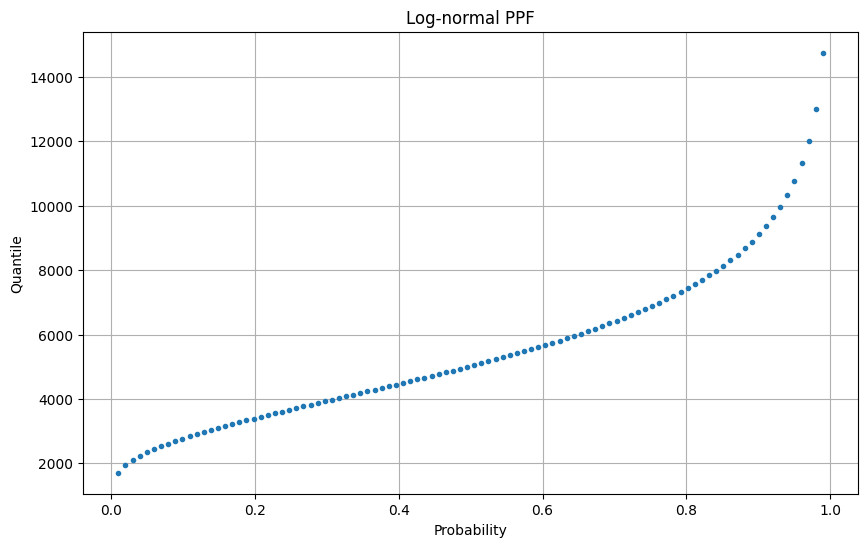

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(prob, y, marker='.', linestyle='none')
plt.xlabel('Probability')
plt.ylabel('Quantile')
plt.title('Log-normal PPF')
plt.grid(True)
plt.show()

<Axes: >

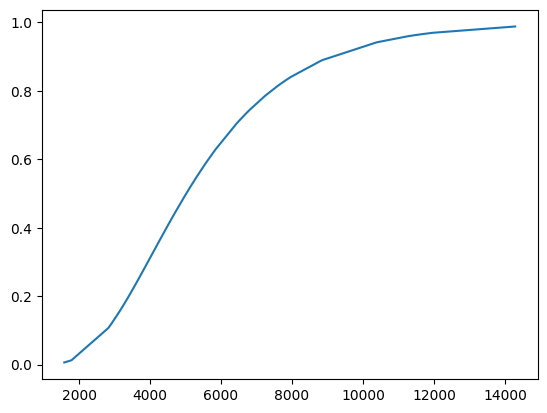

In [ ]:
sns.lineplot(x=x,y=y)

Q2A.
Qual a probabilidade das vendas ficarem abaixo de R$ 3000.

In [ ]:
probability_below_3000 = lognorm.cdf(3000, s=shape, loc=loc, scale=scale)
probability_below_3000

0.13312684108160583

Q2B.
Qual a probabilidade das vendas ficarem acima de R$ 8000.

In [ ]:
probability_above_8000 = 1 - lognorm.cdf(8000, s=shape, loc=loc, scale=scale)
probability_above_8000

0.15729026891907205

Q2C.
Qual o valor mínimo que você pode esperar vender em 90% dos dias? (renda mínima garantida)

In [ ]:
minimum_renda = lognorm.ppf(1 - 0.9,s=shape,loc=loc,scale=scale)
minimum_renda

2773.0482148015435

A fila de atendimento de um serviço de saúde tem nos finais de semana taxa de chegada de 3 pacientes por hora e taxa de atendimento (serviço) de 4 pacientes por hora. Filas desse tipo são modeladas com distribuição exponencial (poisson).

Dica: Empregue mean_time_in_system = 1 / (mu_service - lambda_arrival) para sua distribuição, e sempre mu_service > lambda_arrival.

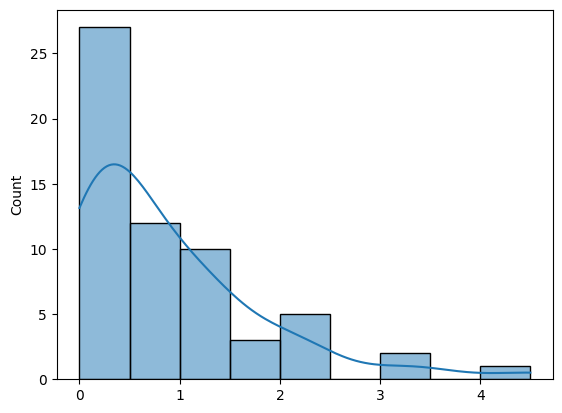

array([5.39605837e-01, 1.27412525e+00, 1.14381359e-04, 3.60012755e-01,
       1.58709595e-01, 9.68838717e-02, 2.06114634e-01, 4.23976482e-01,
       5.05452542e-01, 7.73959775e-01])

In [ ]:
np.random.seed(1)
mean_time_in_system = 1 / (4 - 3)

x = expon.rvs(scale=mean_time_in_system, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]

Q3A.
Qual a probabilidade de espera de até 1h na fila de atendimento?

In [ ]:
probabilidade = expon.cdf(1, scale=1/mean_time_in_system)
probabilidade

0.6321205588285577

Q3B.

Qual a probabilidade de espera de mais de 1h na fila de atendimento?

In [ ]:
probabilidade = 1 - expon.cdf(1, scale=1/mean_time_in_system)
probabilidade

0.36787944117144233

Q3C.

O setor precisa garantir, para não ter penalidades, que 90% dos atendimentos são realizados em menos de 2h. O setor está atendendo essa demanda?

In [ ]:
probabilidade = expon.cdf(2, scale=1/mean_time_in_system)
probabilidade

0.8646647167633873

In [ ]:
probabilidade = expon.ppf(0.9, scale=1/mean_time_in_system)
probabilidade

2.302585092994046

Q3D.
Qual o percentual de pacientes atendidos entre 1h e 2h de atendimento?

In [ ]:
probabilidade = expon.cdf(2, scale=1/mean_time_in_system) - expon.cdf(1, scale=1/mean_time_in_system)
probabilidade

0.23254415793482963

Uma peça do trem de pouso de uma aeronave tem uma vida útil de 5000 horas e uma taxa de falhas crescente ao longo do tempo estimada em 1.5.


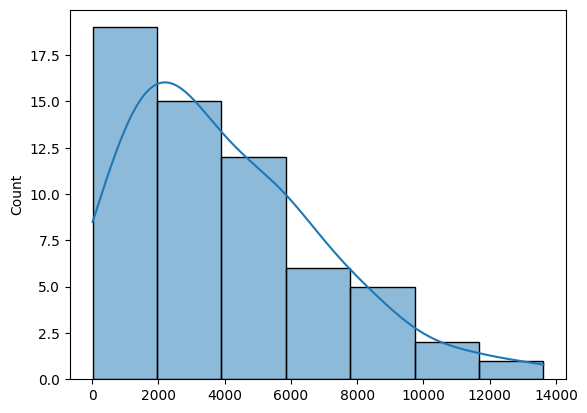

array([3314.01469915, 5876.40094596,   11.78166957, 2530.35776144,
       1465.67875777, 1054.72116597, 1744.65364761, 2821.83218212,
       3172.66044575, 4214.8513656 ])

In [ ]:
np.random.seed(1)
lambda_scale = 5000  # escala, vida média em horas
k_shape = 1.5  # forma, <1 pouquissímas falhas, =1 taxa constante (exponencial), >1.5 taxa aumenta, modelando por exemplo desgaste

x = weibull_min.rvs(c=k_shape, scale=lambda_scale, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]

Q4A.
Qual a probabilidade de falha dessa peça em menos de 1000h?

In [ ]:
probabilidade = weibull_min.cdf(1000, c=k_shape, scale=lambda_scale)
probabilidade

0.08555935639278299

Q4B.
Você tem 500 peças que foram compradas e instaladas em um lote único (mesma data). Considerando 2000h (cerca de 90 dias), qual estoque de reposição precisa haver para garantir cobrir 90 das falhas nessas próximas 2000h?

In [ ]:
probabilidade = weibull_min.cdf(2000, c=k_shape, scale=lambda_scale)
probabilidade

0.2235183068743822

In [ ]:
num_falhas_esperadas = probabilidade * 500
num_falhas_esperadas


111.7591534371911

In [ ]:
estoque_reposicao = np.ceil(0.90 * num_falhas_esperadas)
estoque_reposicao


101.0

Q4C.
Qual o tempo de vida dos 10% de peças que apresentam falhas mais cedo?

In [ ]:
probabilidade = weibull_min.ppf(0.1, c=k_shape, scale=lambda_scale)
probabilidade

1115.3776281845855

## Ex_HTestes


### Escolha os testes mais adequados aqui

### **Testes de normalidade**

* Pressupostos: não há
* Foco: Normalidade

> * **Shapiro-Wild**, `shapiro(a)`, *H0 = Normal*

> * **Levene**, `levene(a,b)`, *H0 = Variâncias Iguais*

### **Testes paramétricos**

* Pressupostos: normalidade, continuidade, homocedasticidade
* Foco: Comparação de Médias

> * **ttest**, `ttest_ind(a,b,alternative="two-sided"|"greater"|"less")`, *distribuição t-Student, amostras*

> * **ztest**, `ztest(a,b,alternative="two-sided"|"greater"|"less")`, *distribuição normal, população*

> * **ttest_1samp**, `ttest_1samp(a,valor,alternative="two-sided"|"greater"|"less")`, *uma única amostra*

> * **ttest_rel**, `ttest_rel(a,b,alternative="two-sided"|"greater"|"less")`, *amostras pareadas*

> * **t de Welch**, `ttest_ind(a,b,equal_var=False)`, *variâncias ou amostras de tamanho diferente*


### **Testes não paramétricos**

* Pressupostos: não pressupõe nenhuma distribuição dos dados
* Foco: Comparação de Medianas e Distribuições iguais

> * **Wilcoxon**, `wilcoxon(a,b,alternative="two-sided"|"greater"|"less")`, * amostras têm medianas iguais? amostras de mesmo tamanho.*

> * **Mann-Whitney U**, `mannwhitneyu(a,b,alternative="two-sided"|"greater"|"less")`, *amostras de tamanho diferente, amostras têm distribuições iguais?*

### **Teste $\chi^2$**

* Pressupostos: variáveis categóricas
* Foco: variáveis independentes? (H0)

> * **chisquare**, `chi2_contingency(contingency_table)`, *empregue `pd.crosstab()` para gerar tabelas de contigência. $M \times N$-classes podem ser empregadas.*

In [ ]:
path = 'https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/'

In [ ]:
df = pd.read_csv(path + 'task_before_after.csv',index_col=0)
df.head()

1      2      3     4      5      6      7      8      9  \
After Hours    1.00   0.00   0.00  1.00   0.00   0.00   0.00   0.00   1.00   
Before Hours   1.00   0.00   0.00  1.00   1.00   1.00   1.00   1.00   1.00   
After Min     14.64  58.02  56.29  3.17  40.72  51.09  48.63  58.78   9.89   
Before Min    13.42  44.20  56.20  6.38  14.60  17.13  21.64   3.23  10.58   

                 10  ...     21     22     23     24     25     26     27  \
After Hours    0.00  ...   1.00   1.00   0.00   0.00   0.00   0.00   0.00   
Before Hours   0.00  ...   0.00   1.00   1.00   1.00   1.00   1.00   0.00   
After Min     29.93  ...   5.57   4.28  35.91  51.02  53.69  47.79  53.19   
Before Min    51.10  ...  56.87  25.22   0.73   4.80   8.86   3.78  45.53   

                 28     29     30  
After Hours    0.00   1.00   1.00  
Before Hours   0.00   1.00   1.00  
After Min     46.22  17.76  13.23  
Before Min    51.10  11.56  21.42  

[4 rows x 30 columns]

In [ ]:
Extrair(df)

Utilize essas informações extraídas de um dataset para criar um artificial e responder questões:
Shape do dataset: (4, 30)
Colunas do dataset: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
Nome linhas do dataset: ['After Hours', 'Before Hours', 'After Min', 'Before Min']
Amostra de valores de cada coluna do dataset:
Coluna 1: [ 1.   14.64 13.42]
Coluna 2: [ 0.   58.02 44.2 ]
Coluna 3: [ 0.   56.29 56.2 ]
Coluna 4: [1.   3.17 6.38]
Coluna 5: [ 0.    1.   40.72 14.6 ]
Coluna 6: [ 0.    1.   51.09 17.13]
Coluna 7: [ 0.    1.   48.63 21.64]
Coluna 8: [ 0.    1.   58.78  3.23]
Coluna 9: [ 1.    9.89 10.58]
Coluna 10: [ 0.   29.93 51.1 ]
Coluna 11: [ 1.    0.    4.39 55.84]
Coluna 12: [ 0.   32.67 55.06]
Coluna 13: [ 1.    0.    6.83 57.11]
Coluna 14: [ 1.   15.11 12.89]
Coluna 15: [ 0.    1.   58.88 11.85]
Coluna 16: [ 1.   23.04 20.39]
Coluna 17: [ 1.   15.68  7.71]

In [ ]:
df = df.transpose()


In [ ]:
df.head()

After Hours  Before Hours  After Min  Before Min
1          1.0           1.0      14.64       13.42
2          0.0           0.0      58.02       44.20
3          0.0           0.0      56.29       56.20
4          1.0           1.0       3.17        6.38
5          0.0           1.0      40.72       14.60

In [ ]:
df['Before'] = df['Before Hours'] + df['Before Min'] / 60
df['After'] = df['After Hours'] + df['After Min'] / 60
df.head()

After Hours  Before Hours  After Min  Before Min    Before     After
1          1.0           1.0      14.64       13.42  1.223667  1.244000
2          0.0           0.0      58.02       44.20  0.736667  0.967000
3          0.0           0.0      56.29       56.20  0.936667  0.938167
4          1.0           1.0       3.17        6.38  1.106333  1.052833
5          0.0           1.0      40.72       14.60  1.243333  0.678667

In [ ]:
df = df[['Before', 'After']]
df.head()

Before     After
1  1.223667  1.244000
2  0.736667  0.967000
3  0.936667  0.938167
4  1.106333  1.052833
5  1.243333  0.678667

Q0.
Antes de tudo verifique os pressupostos dos testes paramétricos. Faça gráficos de distribuição e o qqplot.

Qual a conclusão dos testes? Que testes devemos idealmente aplicar? Paramétricos ou não paramétricos.

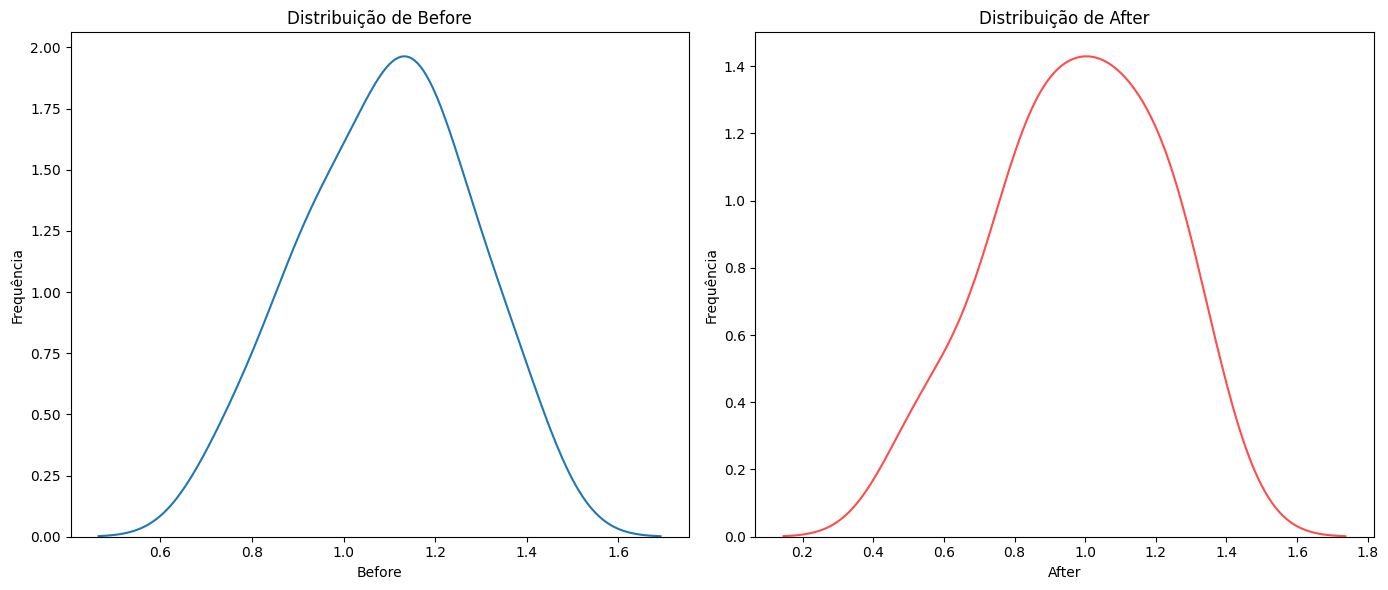

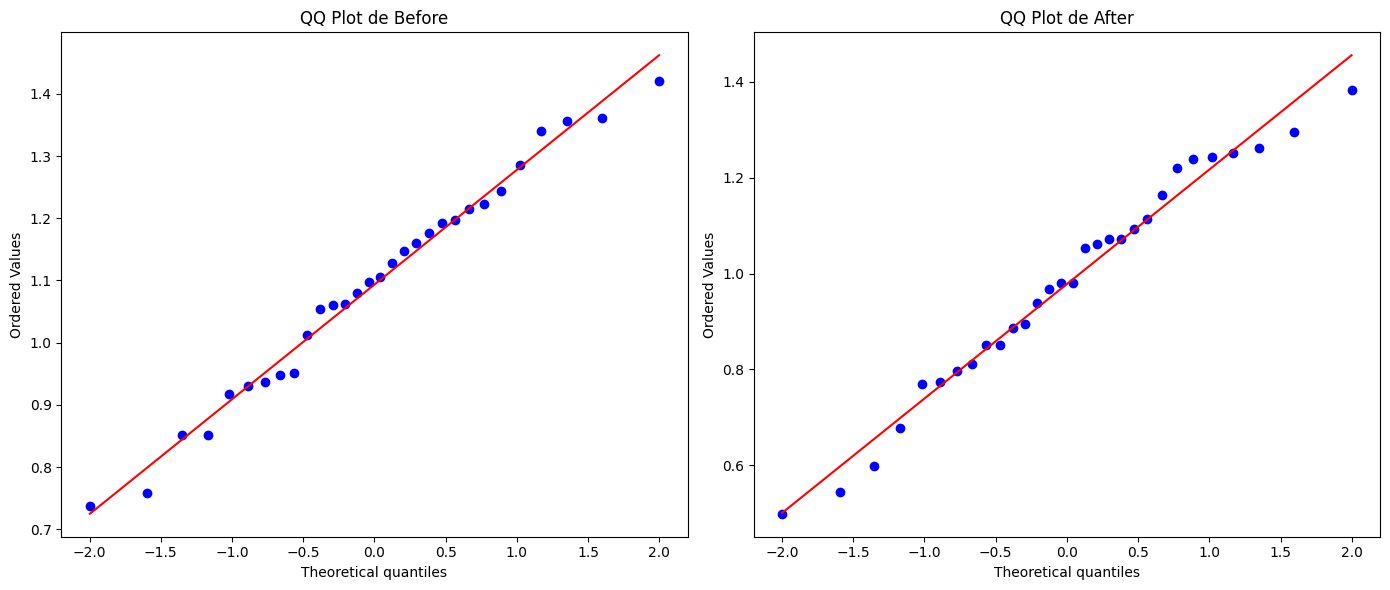

In [ ]:
# Plotando os histogramas
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(df['Before'])
plt.title('Distribuição de Before')
plt.xlabel('Before')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.kdeplot(df['After'], alpha=0.7,color='r')
plt.title('Distribuição de After')
plt.xlabel('After')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Plotando os QQ plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
stats.probplot(df['Before'], dist="norm", plot=plt)
plt.title('QQ Plot de Before')

plt.subplot(1, 2, 2)
stats.probplot(df['After'], dist="norm", plot=plt)
plt.title('QQ Plot de After')

plt.tight_layout()
plt.show()


Shapiro-wild


In [ ]:
shapiro_before = stats.shapiro(df['Before'])
shapiro_after = stats.shapiro(df['After'])

print("Shapiro-Wild Before:", shapiro_before)
print("Shapiro-Wild After:", shapiro_after)

Shapiro-Wild Before: ShapiroResult(statistic=0.9798098802566528, pvalue=0.8204753398895264)
Shapiro-Wild After: ShapiroResult(statistic=0.9724714756011963, pvalue=0.6087737083435059)


In [ ]:
if shapiro_before[1] < 0.05:
    print("Dados não têm distribuição normal")
else:
    print("Dados têm distribuição normal")

Dados têm distribuição normal


In [ ]:
if shapiro_after[1] < 0.05:
    print("Dados não têm distribuição normal")
else:
    print("Dados têm distribuição normal")

Dados têm distribuição normal


Conclusão dos Testes:
Os dados das colunas "Before" e "After"  parecem seguir uma distribuição normal com base nos histogramas e QQ plots.

Recomendação de Testes:
Devido à normalidade nos dados, é ideal aplicar testes paramétricos que assumem uma distribuição específica dos dados. Os dados sao pareados

Q1.
Selecione o teste adequado e verifique se o treinamento.

a. Altera o tempo para realização da tarefa

b. De fato, reduz o tempo para realização da tarefa

In [ ]:
t_test = stats.ttest_rel(df['Before'], df['After'])
t_test


TtestResult(statistic=2.6956576674239083, pvalue=0.011569495148982404, df=29)

In [ ]:
if t_test[1] < 0.05:
    print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")

Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.


In [ ]:
t_test = stats.ttest_rel(df['After'],df['Before'],alternative='less')
t_test

TtestResult(statistic=-2.6956576674239083, pvalue=0.005784747574491202, df=29)

In [ ]:
if t_test[1] < 0.05:
    print("Rejeitamos a hipótese nula (depois >= antes) - as médias são estatisticamente menores após o treinamento.")
else:
    print("Não rejeitamos a hipótese nula (depois < antes)- não há evidências suficientes para afirmar que as médias são estatisticamente menores após o treinamento.")

Rejeitamos a hipótese nula (depois >= antes) - as médias são estatisticamente menores após o treinamento.


Q2.

Verifique as mesmas hipóteses acima, no caso de:

a. O tempo após o treinamento ser apenas 3% maior. As conclusões são as mesmas?

b. Se a amostra não fosse pareada, mas de 30 funcionários quaisquer. Ainda assim teríamos a mesma conclusão? Você pode concluir que o teste não pareado pode concluir que os tempos são menores quando o teste pareado não?

c. As médias antes ou depois têm média estatisticamente iguais a 60min?

In [ ]:
from scipy.stats import ttest_rel

stat, p_valor = ttest_rel(1.03*df['After'], df['Before'])

print("Estatística t:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")

Estatística t: -1.967122925454222
Valor p: 0.05880144876227118

Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.


In [ ]:
# prompt: Verifique as mesmas hipóteses acima, no caso de:
# a. O tempo após o treinamento ser apenas 3% maior. As conclusões são as mesmas?
# b. Se a amostra não fosse pareada, mas de 30 funcionários quaisquer. Ainda assim teríamos a mesma conclusão? Você pode concluir que o teste não pareado pode concluir que os tempos são menores quando o teste pareado não?
# c. As médias antes ou depois têm média estatisti

# a. O tempo após o treinamento ser apenas 3% maior. As conclusões são as mesmas?
df['After_3%'] = df['After'] * 1.03
t_test = stats.ttest_rel(df['Before'], df['After_3%'])
t_test
if t_test[1] < 0.05:
    print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")

# b. Se a amostra não fosse pareada, mas de 30 funcionários quaisquer. Ainda assim teríamos a mesma conclusão? Você pode concluir que o teste não pareado pode concluir que os tempos são menores quando o teste pareado não?
df_unpaired = df.sample(n=30, replace=True)
t_test = stats.ttest_ind(df_unpaired['Before'], df_unpaired['After'])
t_test
if t_test[1] < 0.05:
    print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")

# c. As médias antes ou depois têm média estatisti
t_test = stats.ttest_1samp(df['Before'], 60)
t_test
if t_test[1] < 0.05:
    print("Rejeitamos a hipótese nula - a média é estatisticamente diferente de 60min.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar que a média é estatisticamente diferente de 60min.")

t_test = stats.ttest_1samp(df['After'], 60)
t_test
if t_test[1] < 0.05:
    print("Rejeitamos a hipótese nula - a média é estatisticamente diferente de 60min.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar que a média é estatisticamente diferente de 60min.")


Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.
Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.
Rejeitamos a hipótese nula - a média é estatisticamente diferente de 60min.
Rejeitamos a hipótese nula - a média é estatisticamente diferente de 60min.


In [ ]:
df['After_3_percent_higher'] = df['After'] * 1.03

In [ ]:
t_test_3_percent = stats.ttest_rel(df['After_3_percent_higher'], df['Before'])
print(t_test_3_percent)
if t_test_3_percent[1] < 0.05:
    print("Rejeitamos a hipótese nula (depois >= antes) - as médias são estatisticamente menores após o treinamento (amostras independentes).")
else:
    print("Não rejeitamos a hipótese nula (depois < antes) - não há evidências suficientes para afirmar que as médias são estatisticamente menores após o treinamento (amostras independentes).")

TtestResult(statistic=-1.967122925454222, pvalue=0.05880144876227118, df=29)
Não rejeitamos a hipótese nula (depois < antes) - não há evidências suficientes para afirmar que as médias são estatisticamente menores após o treinamento (amostras independentes).


In [ ]:
t_test_3_percent = stats.ttest_rel(df['Before'],df['After_3_percent_higher'])
if t_test_3_percent[1] < 0.05:
    print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")

Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.


In [ ]:
stat, p_valor = ttest_ind(df['After'], df['Before'],alternative='less')

print("Estatística t:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")

Estatística t: -2.154065304861313
Valor p: 0.01770109100776286

Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.


Teste ind: 0.01770109100776286
Teste rel: 0.005784747574491202


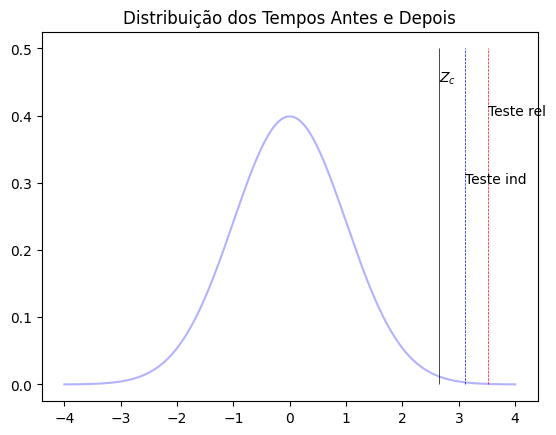

In [ ]:
from scipy.stats import ttest_ind, ttest_rel, norm

_, p_valor_ind = ttest_ind(df['After'], df['Before'], alternative='less')
_, p_valor_rel = ttest_rel(df['After'], df['Before'], alternative='less')

print("Teste ind:", p_valor_ind)
print("Teste rel:", p_valor_rel)

sns.lineplot(x=np.linspace(-4,4,1000),y=norm.pdf(np.linspace(-4,4,1000)), color='blue', alpha=0.3)

plt.vlines(1-norm.ppf(p_valor_ind), ymin=0, ymax=0.5, colors='blue', linestyles='dashed',label='Teste ind',lw=0.5)
plt.vlines(1-norm.ppf(p_valor_rel), ymin=0, ymax=0.5, colors='red', linestyles='dashed',label='Teste rel',lw=0.5)
plt.vlines(1-norm.ppf(0.05), ymin=0, ymax=0.5, colors='k', label='Critical',lw=0.5)

plt.text(1-norm.ppf(p_valor_ind), 0.3,'Teste ind')
plt.text(1-norm.ppf(p_valor_rel), 0.4,'Teste rel')
plt.text(1-norm.ppf(0.05), 0.45,'$Z_c$')

# plt.legend(loc='upper left')
plt.title('Distribuição dos Tempos Antes e Depois')
plt.show()


**CASE: Game Analysis**

Um pesquisador está investigando a experiência de usuários em um jogo com diferentes dispositivos. Para isso ele selecionou alguns alunos da Universidade para testar os jogos. Cada jogador responde um questionário prévio com informações do seu perfil, realiza uma ou até 3 jogadas com os dispositivos Skate, Joystick e Teclado. Após as jogadas com cada dispositivo ele responde um questionário padrão de experiência do usuário cujo o resultado já se encontra aqui pré-processado.

In [ ]:
#@markdown gera_df_stats_latex
from IPython.display import display, Latex, HTML
import warnings

def gera_df_stats_latex(df_stats, titulo):

  warnings.filterwarnings('ignore')
  # latex_table = df_stats.style.to_latex(hrules=True)
  latex_table = df_stats.to_latex(index=None)
  # display(Latex(latex_table))

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  warnings.filterwarnings('default')
  return latex_table

In [ ]:
df_games = pd.read_csv(path + 'df_games.csv')
df_post_games_Q = pd.read_csv(path + 'df_post_games_Q.csv')
df_pre_games_Q = pd.read_csv(path + 'df_pre_games_Q.csv')

display(df_games.head())
display(df_post_games_Q.head())
display(df_pre_games_Q.head())

RA  pontuacao  tempo_obstaculo  tempo_total device
0  21505616          2            12.44        12.44  skate
1  21505616         13            42.01        54.45  skate
2  21505616         26            49.09       103.54  skate
3  32143621          0             5.45         5.45  skate
4  32143621          3            13.99        19.44  skate

RA    device  Positive_Experience  Negative_Experience  Tiredness  \
0  21505616  joystick             5.000000             1.333333        1.0   
1  21505616  keyboard             4.666667             2.000000        1.0   
2  21505616     skate             3.166667             2.833333        1.0   
3  23513365  joystick             5.000000             1.000000        1.0   
4  23513365  keyboard             5.000000             1.000000        1.0   

   Returning_to_Reality  
0              2.333333  
1              2.333333  
2              1.666667  
3              2.333333  
4              2.333333

Carimbo de data/hora        RA Data de nascimento     Gênero  \
0  2023-08-21 16:47:52.279  42118816         2003-06-07   Feminino   
1  2023-08-22 13:49:56.703  42145333         2000-11-26  Masculino   
2  2023-08-22 14:15:17.455  42326321         2004-11-29  Masculino   
3  2023-08-22 14:40:49.151  32339623         2004-07-13  Masculino   
4  2023-08-22 15:08:53.471  42305535         2005-09-09  Masculino   

        Frequência que anda de skate   Frequência que usa jogos de computador  \
0                              Nunca  Regularmente (algumas vezes por semana)   
1  Raramente (algumas vezes por ano)  Regularmente (algumas vezes por semana)   
2                              Nunca   Ocasionalmente (algumas vezes por mês)   
3                              Nunca                Frequente (todos os dias)   
4                              Nunca   Ocasionalmente (algumas vezes por mês)   

  Frequência que usa jogos de console (Xbox / Playstation / Wii)  \
0            Regularmente (algumas vezes por semana)               
1                  Raramente (algumas vezes por ano)               
2                  Raramente (algumas vezes por ano)               
3            Regularmente (algumas vezes por semana)               
4                                              Nunca               

  Frequência que usa jogos em dispositivos móveis (smartphone e/ou tablet)  \
0                                              Nunca                         
1            Regularmente (algumas vezes por semana)                         
2                  Raramente (algumas vezes por ano)                         
3                  Raramente (algumas vezes por ano)                         
4             Ocasionalmente (algumas vezes por mês)                         

                            Gênero de jogo preferido  
0  Ação e aventura, RPG, Simulação, Corrida, Estr...  
1                   Ação e aventura, RPG, Estratégia  
2                                            Esporte  
3             Ação e aventura, RPG, Estratégia, MOBA  
4                                                RPG

**Q3.**

Há diferença de pontuação entre homens e mulheres?

Escolha e execute 1 teste paramétrico e 1 não paramétrico mais adequado, selecionando o mais adequado de cada categoria.
Produza uma tabela como abaixo, com a análise da pontuação de homes e mulheres para todos e por dispositivos.
Há diferença de pontuação entre os devices?
Por que não posso responder ao mesmo tipo de pergunta para homens e mulheres, para os devices?

In [ ]:
df = pd.merge(df_games, df_pre_games_Q[['RA','Gênero']],how='inner', on='RA')
df

RA  pontuacao  tempo_obstaculo  tempo_total    device     Gênero
0    21505616          2            12.44        12.44     skate  Masculino
1    21505616         13            42.01        54.45     skate  Masculino
2    21505616         26            49.09       103.54     skate  Masculino
3    21505616          0             5.73         5.73  joystick  Masculino
4    21505616          0             3.23         8.96  joystick  Masculino
..        ...        ...              ...          ...       ...        ...
358  42311802         34             3.52       127.97  keyboard  Masculino
359  42311802         34             3.48       131.46  keyboard  Masculino
360  32233019          1             8.95         8.95  joystick   Feminino
361  32233019          2             6.99        15.94  joystick   Feminino
362  32233019          7            21.01        36.95  joystick   Feminino

[363 rows x 6 columns]

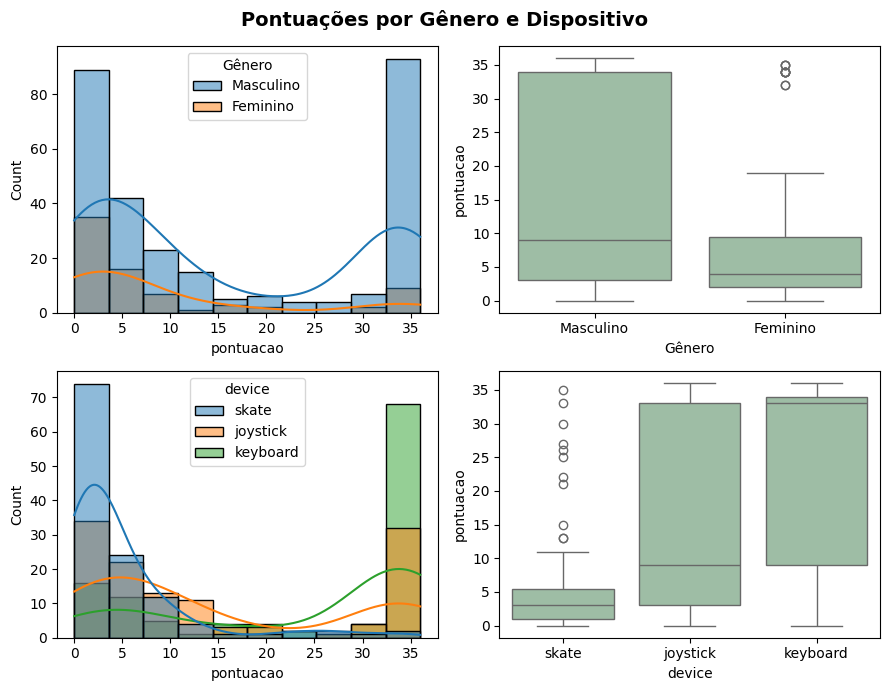

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(9,7))

sns.histplot(x='pontuacao',data=df,hue='Gênero',kde=True,ax=ax[0,0],alpha=0.5)
sns.boxplot(x='Gênero', y='pontuacao', data=df, color='#99c2a2',ax=ax[0,1])

sns.histplot(x='pontuacao',data=df,hue='device',kde=True,ax=ax[1,0],alpha=0.5)
sns.boxplot(x='device', y='pontuacao', data=df, color='#99c2a2',ax=ax[1,1])

plt.suptitle('Pontuações por Gênero e Dispositivo',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

In [ ]:
df[df['Gênero'] == 'Feminino']['pontuacao'].mean(), df[df['Gênero'] == 'Masculino']['pontuacao'].mean()

(8.853333333333333, 15.725694444444445)

In [ ]:
df[df['Gênero'] == 'Feminino']['pontuacao'].var(), df[df['Gênero'] == 'Masculino']['pontuacao'].var()

(128.55927927927925, 200.18581833139763)

In [ ]:
from scipy.stats import mannwhitneyu

results = pd.DataFrame(columns=['device','stat Mann-Whitney','p-value','H0-Rejected'])

stat, p_valor = mannwhitneyu(df[df['Gênero'] == 'Feminino']['pontuacao'], df[df['Gênero'] == 'Masculino']['pontuacao'])
results.loc[len(results)] = ['all',np.round(stat,4),np.round(p_valor,4),p_valor < 0.05]

for device in df.device.unique():
  select = df['device'] == device
  stat, p_valor = mannwhitneyu(df[(df['Gênero'] == 'Feminino') & (select)]['pontuacao'], df[(df['Gênero'] == 'Masculino') & (select)]['pontuacao'])
  results.loc[len(results)] = [device,np.round(stat,4),np.round(p_valor,4),p_valor < 0.05]

  print('Device =', device)
  print("Estatística:", stat)
  print("Valor p:", p_valor)
  if p_valor < 0.05:
      print("Rejeitamos a hipótese nula - as distribuições dos dados são estatisticamente diferentes.")
  else:
      print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas distribuições dos dados.")
  print()

results

Device = skate
Estatística: 727.0
Valor p: 0.003047546798124285
Rejeitamos a hipótese nula - as distribuições dos dados são estatisticamente diferentes.

Device = joystick
Estatística: 792.0
Valor p: 0.0020410959936567282
Rejeitamos a hipótese nula - as distribuições dos dados são estatisticamente diferentes.

Device = keyboard
Estatística: 871.5
Valor p: 0.08760850621852327
Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas distribuições dos dados.



device  stat Mann-Whitney  p-value  H0-Rejected
0       all             7853.0   0.0003         True
1     skate              727.0   0.0030         True
2  joystick              792.0   0.0020         True
3  keyboard              871.5   0.0876        False

In [ ]:
latex_results_scores = gera_df_stats_latex(results,'Game Analysis')
display(Latex(latex_results_scores))

<IPython.core.display.Latex object>

In [ ]:
from scipy.stats import ttest_ind

results = pd.DataFrame(columns=['device','stat Welch','p-value','H0-Rejected'])

stat, p_valor = ttest_ind(df[df['Gênero'] == 'Feminino']['pontuacao'], df[df['Gênero'] == 'Masculino']['pontuacao'],equal_var=False)
results.loc[len(results)] = ['all',np.round(stat,4),np.round(p_valor,4),p_valor < 0.05]

for device in df.device.unique():
  select = df['device'] == device
  stat, p_valor = ttest_ind(df[(df['Gênero'] == 'Feminino') & (select)]['pontuacao'], df[(df['Gênero'] == 'Masculino') & (select)]['pontuacao'],equal_var=False)
  results.loc[len(results)] = [device,np.round(stat,4),np.round(p_valor,4),p_valor < 0.05]

  print('Device =', device)
  print("Estatística:", stat)
  print("Valor p:", p_valor)
  if p_valor < 0.05:
      print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
  else:
      print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")
  print()

results

Device = skate
Estatística: -4.268619881353005
Valor p: 4.0376314103786296e-05
Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.

Device = joystick
Estatística: -4.1890688500050794
Valor p: 8.123471311224853e-05
Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.

Device = keyboard
Estatística: -2.625970397131684
Valor p: 0.012988088632962368
Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.



device  stat Welch  p-value  H0-Rejected
0       all     -4.4276   0.0000         True
1     skate     -4.2686   0.0000         True
2  joystick     -4.1891   0.0001         True
3  keyboard     -2.6260   0.0130         True

In [ ]:
latex_results_scores = gera_df_stats_latex(results,'Game Analysis')
display(Latex(latex_results_scores))

<IPython.core.display.Latex object>

**Q4.**

Há diferença na 1a preferência ou na maior de percepção de desafio entre homens e mulheres ao experimentaram o jogo?

Os usuários, após a experiência com o jogo, também foram convidados a dar a sua preferência e percepção de desafio ao jogo classificando cada dispositivo de 1 (maior preferência e desafio) a 3 (menores).

In [ ]:
df_pos_games_Q2 = pd.read_csv(path + 'df_pos_games_Q2.csv')
df_pos_games_Q2.head()

date_time        RA  joystick_p  keyboard_p  skate_p  \
0  2023-08-22 14:12:44.482  42145333           3           2        1   
1  2023-08-22 15:05:52.265  32339623           3           2        1   
2  2023-08-22 15:26:46.963  42305535           1           2        3   
3  2023-08-22 15:47:32.495  42308720           2           3        1   
4  2023-09-04 11:45:23.579  32229011           2           1        3   

   joystick_d  keyboard_d  skate_d  
0           3           3        1  
1           2           3        1  
2           2           1        3  
3           2           3        1  
4           2           3        1

In [ ]:
df = df_pos_games_Q2

df['preference'] = (df[[x for x in df.columns if '_p' in x]] == 1).idxmax(axis=1)
df['challenger'] = (df[[x for x in df.columns if '_d' in x]] == 1).idxmax(axis=1)

df = pd.merge(df[['RA','preference','challenger']], df_pre_games_Q[['RA','Gênero']], how='inner', on='RA')

df.head()

RA  preference  challenger     Gênero
0  42145333     skate_p     skate_d  Masculino
1  32339623     skate_p     skate_d  Masculino
2  42305535  joystick_p  keyboard_d  Masculino
3  42308720     skate_p     skate_d  Masculino
4  32229011  keyboard_p     skate_d  Masculino

In [ ]:
from scipy.stats import chi2_contingency

results = pd.DataFrame(columns=['Related','chi2','p-value','Dependent'])

for tipo in ['preference','challenger']:
  contingency_table = pd.crosstab(df['Gênero'], df[tipo])

  # display('Tabela de Contingência: ', contingency_table)
  # display(contingency_table)

  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

  if p_value < 0.05:
      print(f"Rejeitamos a hipótese nula - Há evidências de que o gênero influencia em {tipo}. Chi-square: {chi2:.6f} p-value = {p_value:.6f}")
  else:
      print(f"Não rejeitamos a hipótese nula - Não há evidências de que o gênero influencia em {tipo}. Chi-square: {chi2:.6f} p-value = {p_value:.6f}")

  results.loc[len(results)] = [tipo,np.round(chi2,4),np.round(p_value,4),p_value < 0.05]

print()

Não rejeitamos a hipótese nula - Não há evidências de que o gênero influencia em preference. Chi-square: 0.158307 p-value = 0.923898
Não rejeitamos a hipótese nula - Não há evidências de que o gênero influencia em challenger. Chi-square: 1.786466 p-value = 0.409330



<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
latex_results = gera_df_stats_latex(results,'Influência do Gênero na Preferência e Percepção de Desafio')
display(Latex(latex_results))

<IPython.core.display.Latex object>

## Conteudo da P2


1. Pandas. Combinar dados, transpor e aplicar transformações às colunas, groupby. merge, concat, transpose, apply, normalização para valores numéricos, fillna, replace

2. Visualização de Dados. Tipos de visualização e gráficos. Elementos gráficos dos Labs: anottations, vlines/lines, múltiplos gráficos em uma mesma figura, colocar linha de tendência, mapa de calor (incluindo de correlação) etc. https://meusite.mackenzie.br/rogerio/MyBook/_build/html/c7_parte_1.html

3. Funções de distribuição de probabilidades. PDF, CDF, PPF, qqplot, várias distrubuições com diferentes parâmetros.

4. Testes estatíticos. Tabela de testes no último Lab + testes de correlação. Semalhança de curvas. Entender a diferença entre testes paramétricos e não paramétricos, e suas relação com IC.

In [ ]:
companhias = ['falcon', 'bee', 'lion', 'zebra', 'bird', 'camel', 'butterfly']

df_ano = pd.DataFrame({"A": np.random.normal(0, 1, 1000),
                   "B": np.random.normal(1, 1, 1000),
                   "C": np.random.normal(-1, 1, 1000),
                   "D": np.random.normal(0, 0.5, 1000),
                   "Ano": np.random.randint(1950, 2024, 1000)})

df_companhias = pd.DataFrame({"A": np.random.normal(0, 1, 1000),
                   "B": np.random.normal(1, 1, 1000),
                   "C": np.random.normal(-1, 1, 1000),
                   "D": np.random.normal(0, 0.5, 1000),
                   "Ano": np.random.randint(1950, 2024, 1000),
                   "Companhias": np.random.choice(companhias, size=len(df_ano))})



In [ ]:
df_ano.head()

A         B         C         D   Ano
0 -0.088879 -0.418008  0.220022 -0.396511  1977
1  2.029297  2.142803 -1.564735  0.339047  1951
2 -0.519763  2.144471 -0.814751  0.092801  2014
3 -0.303100  1.481990 -0.697933  0.218153  2008
4 -0.040445  0.554590 -1.840441 -1.603446  1973

In [ ]:
df_companhias.head()

A         B         C         D   Ano Companhias
0  1.381006  1.598805 -1.372025  0.394053  1971      camel
1  0.300228  0.360199 -0.084544 -0.960877  1977     falcon
2  1.231770  0.359884 -3.333638 -0.092916  2009      zebra
3 -1.026327  1.289151 -0.893364  0.168168  1961      zebra
4 -0.088663  1.140495  0.530415  0.427450  1986       bird

### 1. Pandas

#### Combinar Dados

**merge**: Combina dois DataFrames baseados em uma chave comum (linha ou coluna)

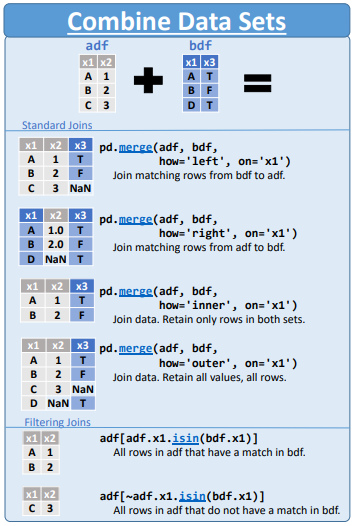

In [ ]:
df1 = pd.DataFrame({
                  "types": ['A','B','C'],
                  "a" : [4,5,6],
                  "b": [7,8,9],
                  "c": [10,11,12]
                  },
                   index=[1,2,3])
df2 = pd.DataFrame({
                  "types": ['A','B','C'],
                  "a" : [13,14,15],
                  "b": [16,17,18],
                  "c": [19,20,21]
                  },
                   index=[1,2,3])
df3 = pd.DataFrame({
                  "types": ['A','B','C'],
                  "a" : [31,14,94],
                  "b": [32,56,2],
                  "c": [77,61,9]
                  },
                   index=[1,2,3])
df4 = pd.DataFrame({
                  "types": ['A','B','C'],
                  "a" : [31,'',94],
                  "b": [32,56,2],
                  "c": ['',61,9]
                  },
                   index=[1,2,3])

In [ ]:
df_ano

A         B         C         D   Ano
0   -0.088879 -0.418008  0.220022 -0.396511  1977
1    2.029297  2.142803 -1.564735  0.339047  1951
2   -0.519763  2.144471 -0.814751  0.092801  2014
3   -0.303100  1.481990 -0.697933  0.218153  2008
4   -0.040445  0.554590 -1.840441 -1.603446  1973
..        ...       ...       ...       ...   ...
995  0.113806  1.366152 -1.185129 -0.162650  1987
996 -2.297521  1.749869 -0.405642  0.631886  1969
997  1.420586  1.096136 -1.168474 -0.033878  1951
998  1.473971  1.558798  1.380877 -1.063940  1975
999 -1.078911  3.306314 -2.969412  0.496026  1951

[1000 rows x 5 columns]

**concat**: Concatena DataFrames ao longo de um eixo

In [ ]:
df_companhias

A         B         C         D   Ano Companhias
0    1.381006  1.598805 -1.372025  0.394053  1971      camel
1    0.300228  0.360199 -0.084544 -0.960877  1977     falcon
2    1.231770  0.359884 -3.333638 -0.092916  2009      zebra
3   -1.026327  1.289151 -0.893364  0.168168  1961      zebra
4   -0.088663  1.140495  0.530415  0.427450  1986       bird
..        ...       ...       ...       ...   ...        ...
995 -0.260743  1.179882 -0.927165  0.051520  1984     falcon
996  0.797130  0.297614 -1.448761 -0.234986  1984       bird
997  0.047593  2.041311 -1.121892  0.175513  2016        bee
998  0.012637  0.758410 -2.766119 -0.431838  1953      camel
999 -0.687024  1.592394  0.076381  0.681525  1973  butterfly

[1000 rows x 6 columns]

In [ ]:
df_merged = pd.merge(df_ano, df_companhias[['Ano','Companhias']], on='Ano', how='inner')

In [ ]:
df_merged

A         B         C         D   Ano Companhias
0     -0.088879 -0.418008  0.220022 -0.396511  1977     falcon
1     -0.088879 -0.418008  0.220022 -0.396511  1977     falcon
2     -0.088879 -0.418008  0.220022 -0.396511  1977      zebra
3     -0.088879 -0.418008  0.220022 -0.396511  1977       bird
4     -0.088879 -0.418008  0.220022 -0.396511  1977       bird
...         ...       ...       ...       ...   ...        ...
13690 -0.027172  0.920237 -0.217238 -1.462606  1980      camel
13691 -0.027172  0.920237 -0.217238 -1.462606  1980       lion
13692 -0.027172  0.920237 -0.217238 -1.462606  1980     falcon
13693 -0.027172  0.920237 -0.217238 -1.462606  1980      camel
13694 -0.027172  0.920237 -0.217238 -1.462606  1980        bee

[13695 rows x 6 columns]

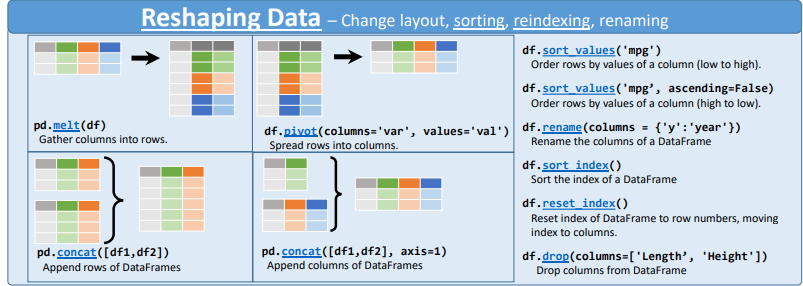

In [ ]:
concatenated_df = pd.concat([df1, df3], ignore_index=True,axis=0)

In [ ]:
concatenated_df

types   a   b   c
0     A   4   7  10
1     B   5   8  11
2     C   6   9  12
3     A  31  32  77
4     B  14  56  61
5     C  94   2   9

In [ ]:
concatenated_df = pd.concat([df1, df3], ignore_index=True,axis=1)
concatenated_df

0  1  2   3  4   5   6   7
1  A  4  7  10  A  31  32  77
2  B  5  8  11  B  14  56  61
3  C  6  9  12  C  94   2   9

In [ ]:
concatenated_df = pd.concat([df_ano,df_companhias[['A','B','C','D','Ano']]], axis=0)
concatenated_df

A         B         C         D   Ano
0   -0.088879 -0.418008  0.220022 -0.396511  1977
1    2.029297  2.142803 -1.564735  0.339047  1951
2   -0.519763  2.144471 -0.814751  0.092801  2014
3   -0.303100  1.481990 -0.697933  0.218153  2008
4   -0.040445  0.554590 -1.840441 -1.603446  1973
..        ...       ...       ...       ...   ...
995 -0.260743  1.179882 -0.927165  0.051520  1984
996  0.797130  0.297614 -1.448761 -0.234986  1984
997  0.047593  2.041311 -1.121892  0.175513  2016
998  0.012637  0.758410 -2.766119 -0.431838  1953
999 -0.687024  1.592394  0.076381  0.681525  1973

[2000 rows x 5 columns]

#### Transpor e Aplicar Transformações às Colunas

**transpose**: Transpõe o DataFrame


In [ ]:
transposed_df = concatenated_df.transpose()

In [ ]:
transposed_df

0            1            2            3            4    \
A      -0.088879     2.029297    -0.519763    -0.303100    -0.040445   
B      -0.418008     2.142803     2.144471     1.481990     0.554590   
C       0.220022    -1.564735    -0.814751    -0.697933    -1.840441   
D      -0.396511     0.339047     0.092801     0.218153    -1.603446   
Ano  1977.000000  1951.000000  2014.000000  2008.000000  1973.000000   

             5            6            7            8            9    ...  \
A       0.041812    -0.123344    -0.173745    -1.306158     0.688581  ...   
B       0.208182     1.600040     0.359070     0.364883     1.783847  ...   
C      -0.384381    -1.755826    -0.327221     0.933192    -1.126138  ...   
D      -0.091039     0.003094     0.304203     0.177786     0.006521  ...   
Ano  2011.000000  2020.000000  1987.000000  2011.000000  2014.000000  ...   

             990          991          992          993          994  \
A       0.137882    -0.324987     1.637733     1.190249    -0.319174   
B       0.203841     0.491408     0.580174    -1.164777    -0.193481   
C      -1.051758     0.119524     0.458529    -1.579899    -0.511590   
D      -0.350765     0.440958     0.343399     0.463204    -0.232804   
Ano  1960.000000  1990.000000  1996.000000  1998.000000  2014.000000   

             995          996          997          998          999  
A      -0.260743     0.797130     0.047593     0.012637    -0.687024  
B       1.179882     0.297614     2.041311     0.758410     1.592394  
C      -0.927165    -1.448761    -1.121892    -2.766119     0.076381  
D       0.051520    -0.234986     0.175513    -0.431838     0.681525  
Ano  1984.000000  1984.000000  2016.000000  1953.000000  1973.000000  

[5 rows x 2000 columns]

**apply**: Aplica uma função a uma coluna ou linha.

In [ ]:
df_ano['A_square'] = df_ano['A'].apply(lambda x: x ** 2)


In [ ]:
df_ano

A         B         C         D   Ano  A_square
0   -0.088879 -0.418008  0.220022 -0.396511  1977  0.007899
1    2.029297  2.142803 -1.564735  0.339047  1951  4.118045
2   -0.519763  2.144471 -0.814751  0.092801  2014  0.270154
3   -0.303100  1.481990 -0.697933  0.218153  2008  0.091870
4   -0.040445  0.554590 -1.840441 -1.603446  1973  0.001636
..        ...       ...       ...       ...   ...       ...
995  0.113806  1.366152 -1.185129 -0.162650  1987  0.012952
996 -2.297521  1.749869 -0.405642  0.631886  1969  5.278601
997  1.420586  1.096136 -1.168474 -0.033878  1951  2.018065
998  1.473971  1.558798  1.380877 -1.063940  1975  2.172590
999 -1.078911  3.306314 -2.969412  0.496026  1951  1.164049

[1000 rows x 6 columns]

In [ ]:
df_ano['A_square_otherway'] = df_ano['A']**2

In [ ]:
df_ano

A         B         C         D   Ano  A_square  A_square_otherway
0   -0.088879 -0.418008  0.220022 -0.396511  1977  0.007899           0.007899
1    2.029297  2.142803 -1.564735  0.339047  1951  4.118045           4.118045
2   -0.519763  2.144471 -0.814751  0.092801  2014  0.270154           0.270154
3   -0.303100  1.481990 -0.697933  0.218153  2008  0.091870           0.091870
4   -0.040445  0.554590 -1.840441 -1.603446  1973  0.001636           0.001636
..        ...       ...       ...       ...   ...       ...                ...
995  0.113806  1.366152 -1.185129 -0.162650  1987  0.012952           0.012952
996 -2.297521  1.749869 -0.405642  0.631886  1969  5.278601           5.278601
997  1.420586  1.096136 -1.168474 -0.033878  1951  2.018065           2.018065
998  1.473971  1.558798  1.380877 -1.063940  1975  2.172590           2.172590
999 -1.078911  3.306314 -2.969412  0.496026  1951  1.164049           1.164049

[1000 rows x 7 columns]

#### Groupby


**groupby**: agrupa dados e aplica uma funcao agregada


In [ ]:
grouped = df_companhias.groupby('Companhias').mean()


In [ ]:
grouped.reset_index()

Companhias         A         B         C         D          Ano
0        bee -0.027867  1.162750 -0.951748  0.018151  1985.427481
1       bird -0.083938  0.884713 -0.952208 -0.007196  1986.344000
2  butterfly  0.123088  0.935965 -0.986158  0.040714  1986.173913
3      camel  0.032626  0.920351 -1.017915 -0.034167  1984.894737
4     falcon -0.004083  1.054976 -1.080915  0.046673  1984.206667
5       lion -0.194600  0.930025 -0.941474  0.037186  1985.670968
6      zebra -0.126954  0.997887 -1.057817  0.052212  1986.067114

#### Normalização para Valores Numéricos

**normalize**: Normalize os valores numéricos

In [ ]:
df_ano['A_squared_normalized'] = (df_ano['A_square'] - df_ano['A_square'].mean()) / df_ano['A_square'].std()

In [ ]:
df_ano

A         B         C         D   Ano  A_square  \
0   -0.088879 -0.418008  0.220022 -0.396511  1977  0.007899   
1    2.029297  2.142803 -1.564735  0.339047  1951  4.118045   
2   -0.519763  2.144471 -0.814751  0.092801  2014  0.270154   
3   -0.303100  1.481990 -0.697933  0.218153  2008  0.091870   
4   -0.040445  0.554590 -1.840441 -1.603446  1973  0.001636   
..        ...       ...       ...       ...   ...       ...   
995  0.113806  1.366152 -1.185129 -0.162650  1987  0.012952   
996 -2.297521  1.749869 -0.405642  0.631886  1969  5.278601   
997  1.420586  1.096136 -1.168474 -0.033878  1951  2.018065   
998  1.473971  1.558798  1.380877 -1.063940  1975  2.172590   
999 -1.078911  3.306314 -2.969412  0.496026  1951  1.164049   

     A_square_otherway  A_squared_normalized  
0             0.007899             -0.679548  
1             4.118045              1.935638  
2             0.270154             -0.512682  
3             0.091870             -0.626120  
4             0.001636             -0.683534  
..                 ...                   ...  
995           0.012952             -0.676334  
996           5.278601              2.674072  
997           2.018065              0.599472  
998           2.172590              0.697792  
999           1.164049              0.056082  

[1000 rows x 8 columns]

In [ ]:
columns = ['A','B','C','D']
for column in columns:
  df_ano[column] = (df_ano[column] - df_ano[column].mean()) / df_ano[column].std()

In [ ]:
df_ano

A         B         C         D   Ano  A_square  \
0   -0.114099 -1.394112  1.269814 -0.792162  1977  0.007899   
1    1.927792  1.185783 -0.575319  0.661671  1951  4.118045   
2   -0.529466  1.187463  0.200035  0.174966  2014  0.270154   
3   -0.320606  0.520045  0.320806  0.422723  2008  0.091870   
4   -0.067410 -0.414266 -0.860353 -3.177673  1973  0.001636   
..        ...       ...       ...       ...   ...       ...   
995  0.081286  0.403344 -0.182872 -0.329935  1987  0.012952   
996 -2.243199  0.789921  0.622985  1.240468  1969  5.278601   
997  1.341004  0.131316 -0.165653 -0.075417  1951  2.018065   
998  1.392466  0.597426  2.469940 -2.111339  1975  2.172590   
999 -1.068476  2.357966 -2.027515  0.971941  1951  1.164049   

     A_square_otherway  A_squared_normalized  
0             0.007899             -0.679548  
1             4.118045              1.935638  
2             0.270154             -0.512682  
3             0.091870             -0.626120  
4             0.001636             -0.683534  
..                 ...                   ...  
995           0.012952             -0.676334  
996           5.278601              2.674072  
997           2.018065              0.599472  
998           2.172590              0.697792  
999           1.164049              0.056082  

[1000 rows x 8 columns]

#### fillna e replace

**fillna**: Preenche valores NA

In [ ]:
df4

types   a   b   c
1     A  31  32    
2     B      56  61
3     C  94   2   9

In [ ]:
df4['a'].replace('', np.nan, inplace=True)

df4['c'].replace('', np.nan, inplace=True)

In [ ]:
df4['a'].fillna(df4['a'].mean(), inplace=True)

df4['c'].fillna(df4['c'].mean(), inplace=True)

**replace**: Substitui valores específicos

In [ ]:
df4['a'] = df4['a'].replace(62.5, int(62.5))

In [ ]:
df4

types     a   b     c
1     A  31.0  32  35.0
2     B  62.0  56  61.0
3     C  94.0   2   9.0

### 2. Visualização de Dados

**Tipos de Visualização e Gráficos**

* **Gráficos de Linha, Histograma, Boxplot, Barra, Mapa de Calor, QQplot, Linha de Tendência, Múltiplos gráficos, Vlines/Lines, Annotations**



##### Grafico de Linha

**Matplotlib**

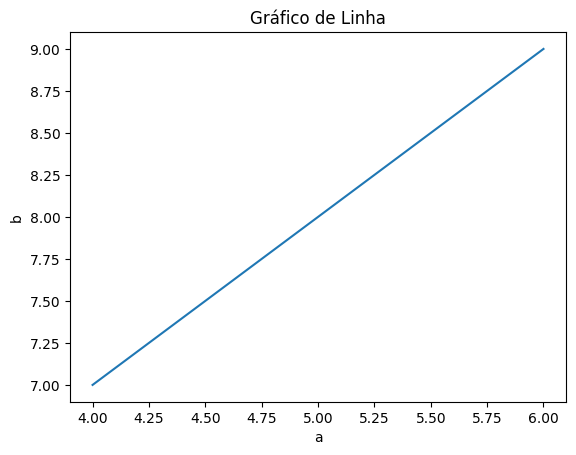

In [ ]:
plt.plot(df1['a'], df1['b'])
plt.xlabel('a')
plt.ylabel('b')
plt.title('Gráfico de Linha')
plt.show()

**Seaborn**

Text(0.5, 1.0, 'Gráfico de Linha')

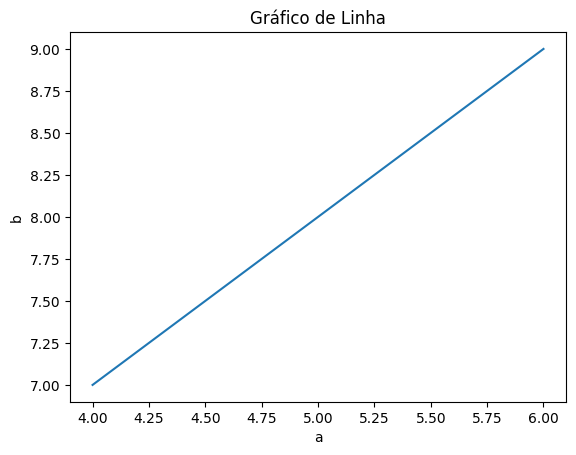

In [ ]:
sns.lineplot(x='a', y='b', data=df1)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Gráfico de Linha')

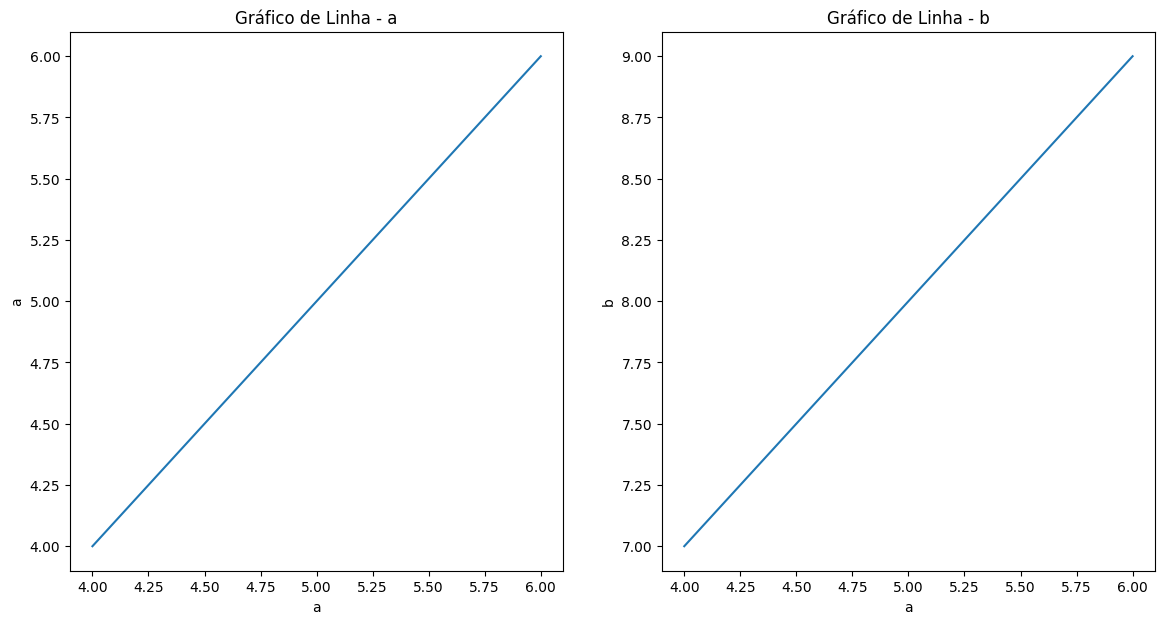

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14, 7))

columns = ['a','b']
for column, ax in zip(columns, axes):
    sns.lineplot(x='a', y=column, data=df1, ax=ax)
    ax.set_xlabel('a')
    ax.set_ylabel(column)
    ax.set_title(f'Gráfico de Linha - {column}')

##### Gráfico Histograma

**Matplotlib**

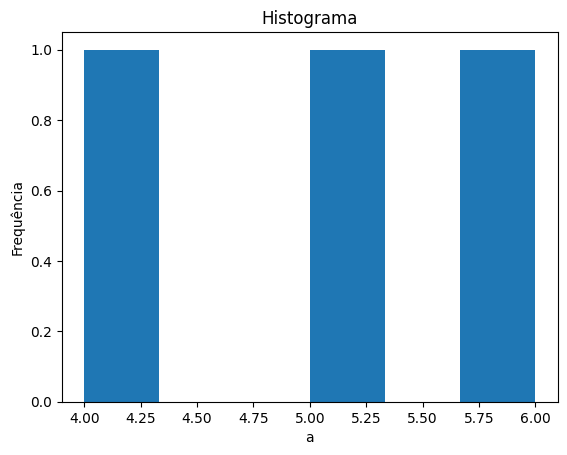

In [ ]:
plt.figure()
plt.hist(df1['a'],bins=6)
plt.xlabel('a')
plt.ylabel('Frequência')
plt.title('Histograma')
plt.show()

**Seaborn**

Text(0.5, 1.0, 'Histograma')

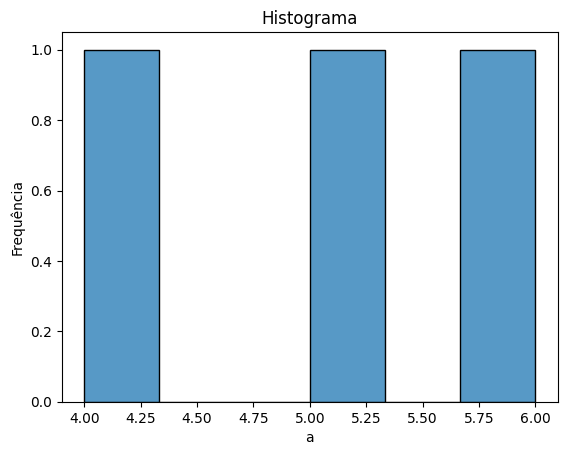

In [ ]:
plt.figure()
sns.histplot(df1['a'], bins=6)
plt.xlabel('a')
plt.ylabel('Frequência')
plt.title('Histograma')

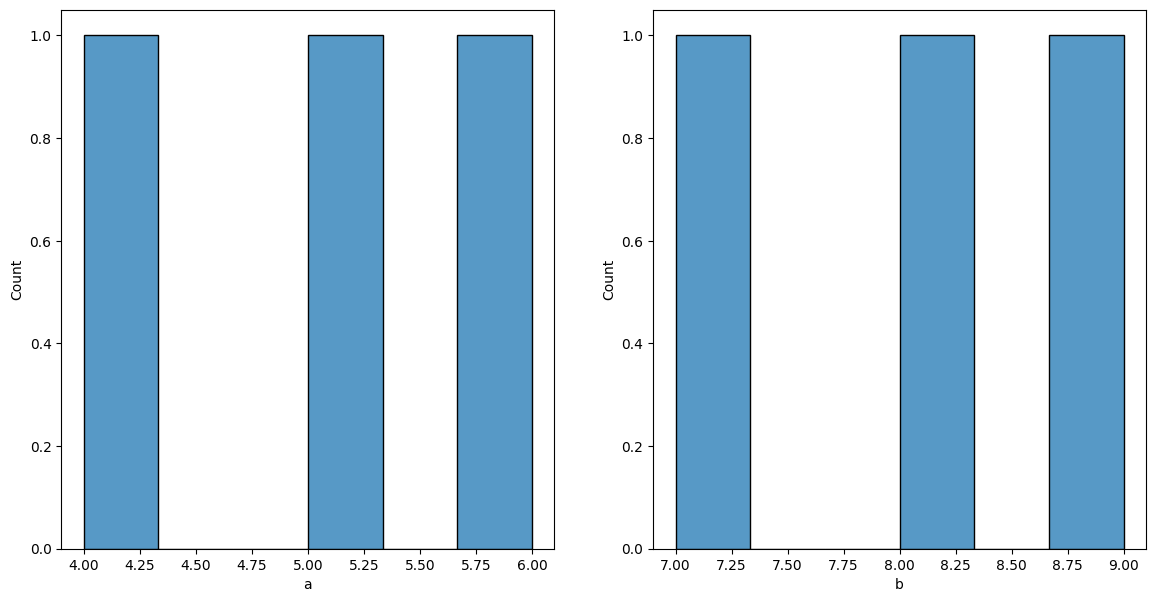

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14, 7))

columns = ['a','b']
for column, ax in zip(columns, axes):
    sns.histplot(df1[column],bins = 6, ax=ax)
    ax.set_xlabel(column)

##### Gráfico Boxplot

**Matplotlib**

In [ ]:
df

A         B         C         D   Ano
0    0.509896  1.615089 -2.700019  0.071108  1952
1    0.757393  2.057224 -0.726609  0.219685  1972
2    1.071014 -0.601777 -0.739409 -0.340661  2022
3   -0.490926  0.580797  0.200318  0.152323  1979
4   -1.877684  0.827099 -1.409092  0.503461  1968
..        ...       ...       ...       ...   ...
995 -0.177172 -0.239073 -1.115556 -0.090185  1961
996  0.832193  0.120942 -0.255309  0.025119  2001
997  1.031782  1.845890 -1.120367 -0.202184  1962
998 -0.540153  1.143329  0.177405 -0.192580  2003
999  1.074608  1.925849 -1.742545 -0.208640  2003

[1000 rows x 5 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

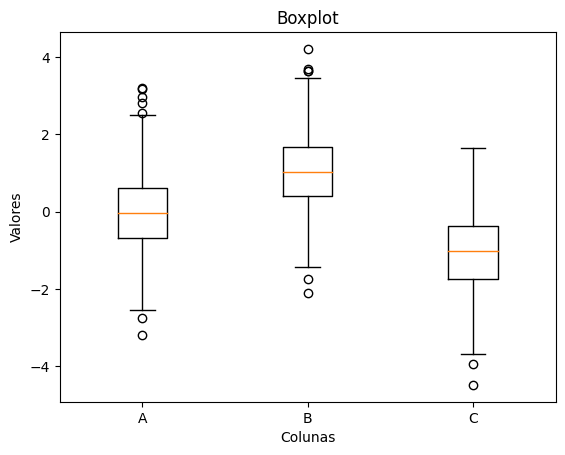

In [ ]:
plt.figure()
plt.boxplot(df[['A','B','C']],labels=['A','B','C'])
plt.xlabel('Colunas')
plt.ylabel('Valores')
plt.title('Boxplot')
plt.show

**Seaborn**

Text(0.5, 1.0, 'Boxplot')

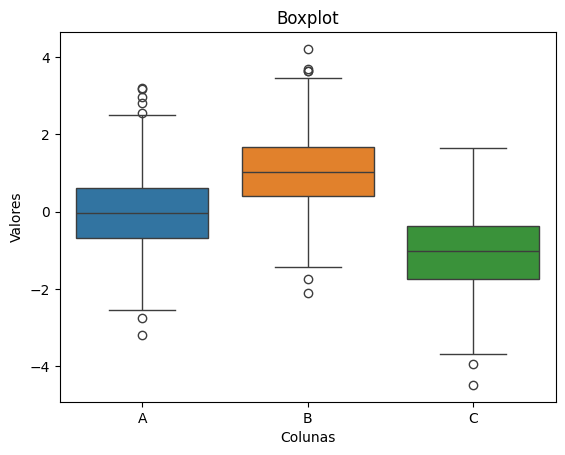

In [ ]:
plt.figure()
sns.boxplot(data=df[['A','B','C']])
plt.xlabel('Colunas')
plt.ylabel('Valores')
plt.title('Boxplot')

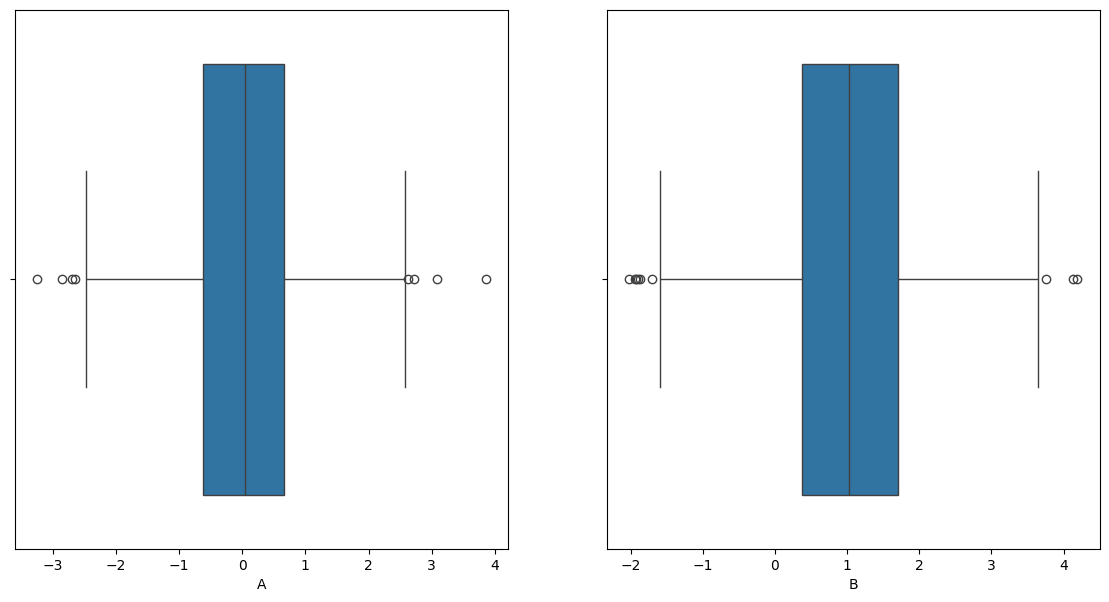

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14, 7))

columns = ['A','B']
for column, ax in zip(columns, axes.flatten()):
    sns.boxplot(x=column, data=df, ax=ax)

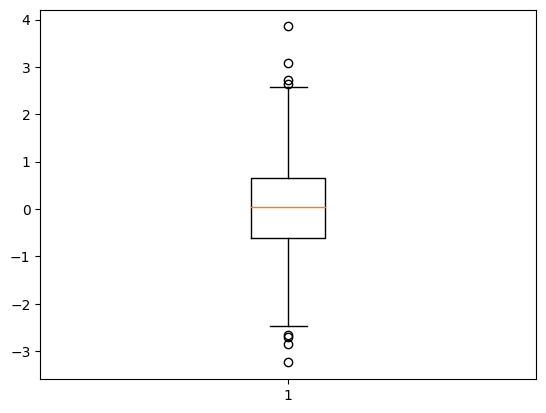

In [ ]:
f = plt.boxplot(df['A'])

In [ ]:
outliers = f['fliers'][0].get_data()[1]
outliers

array([-3.24126734, -2.69688664, -2.65096981, -2.84854262,  2.72016917,
        3.85273149,  3.07888081,  2.63238206])

In [ ]:
df_no_outliers = df[~(df).isin(outliers)]

In [ ]:
df_no_outliers

A         B         C         D   Ano
0   -0.113481 -0.391958 -1.162704 -0.730250  1993
1    0.221558  2.704102 -1.871193  0.595630  2009
2    1.234752  0.884890 -0.927847  0.337569  1958
3   -1.031955  0.654081 -0.261763 -0.858017  1951
4    0.595491  1.889154 -2.143339  1.355397  2005
..        ...       ...       ...       ...   ...
995  0.505021 -0.547802 -2.886129 -0.133569  1965
996  0.084518  1.264255 -0.946941  0.220177  1970
997 -0.713585  0.959666 -0.134710 -0.260484  2000
998 -1.820760  1.745361 -1.476876 -0.525219  1970
999 -0.705773  1.093523  0.677116  0.423059  2009

[1000 rows x 5 columns]

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=flights, x='name', y='arr_delay')
plt.show()

##### Gráfico Barra

In [ ]:
df

color  clarity  density  purity  silica quality  price+
0       E     51.0     35.0    14.0     2.0  Accept     326
1       E     49.0     30.0    14.0     2.0  Accept     326
2       E     47.0     32.0    13.0     2.0  Accept     327
3       I     46.0     31.0    15.0     2.0  Accept     334
4       J     50.0     36.0    14.0     2.0  Accept     335
..    ...      ...      ...     ...     ...     ...     ...
145     H     67.0     30.0    52.0    23.0  Reject    2767
146     G     63.0     25.0    50.0    19.0  Reject    2768
147     D     65.0     30.0    52.0    20.0  Reject    2768
148     D     62.0     34.0    54.0    23.0  Reject    2768
149     E     59.0     30.0    51.0    18.0  Reject    2768

[150 rows x 7 columns]

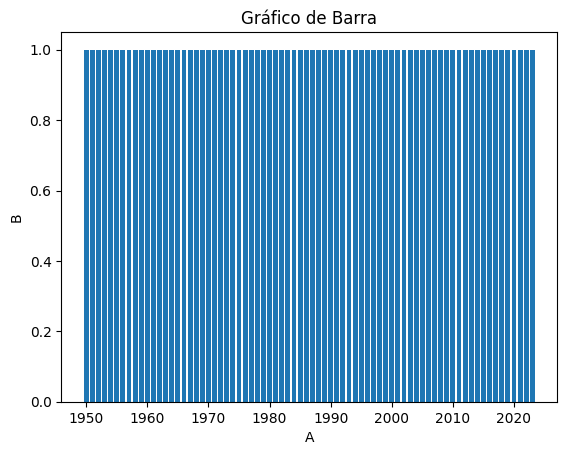

In [ ]:
plt.figure()
plt.bar(df['Ano'], df['B'] >= 0)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Gráfico de Barra')
plt.show()

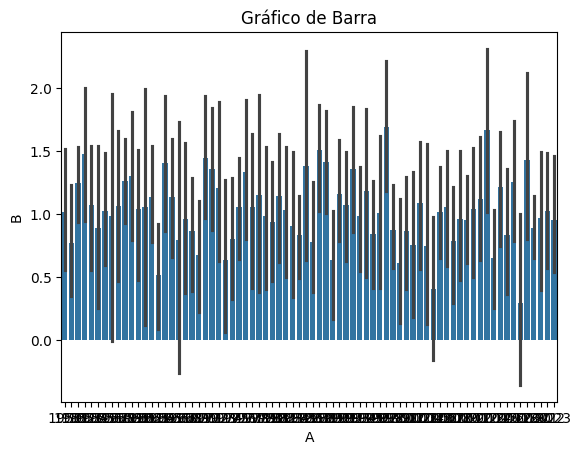

In [ ]:
plt.figure()
sns.barplot(data=df, x='Ano', y='B',estimator='mean')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Gráfico de Barra')
plt.show()

##### Correlacao (Mapa de Calor)

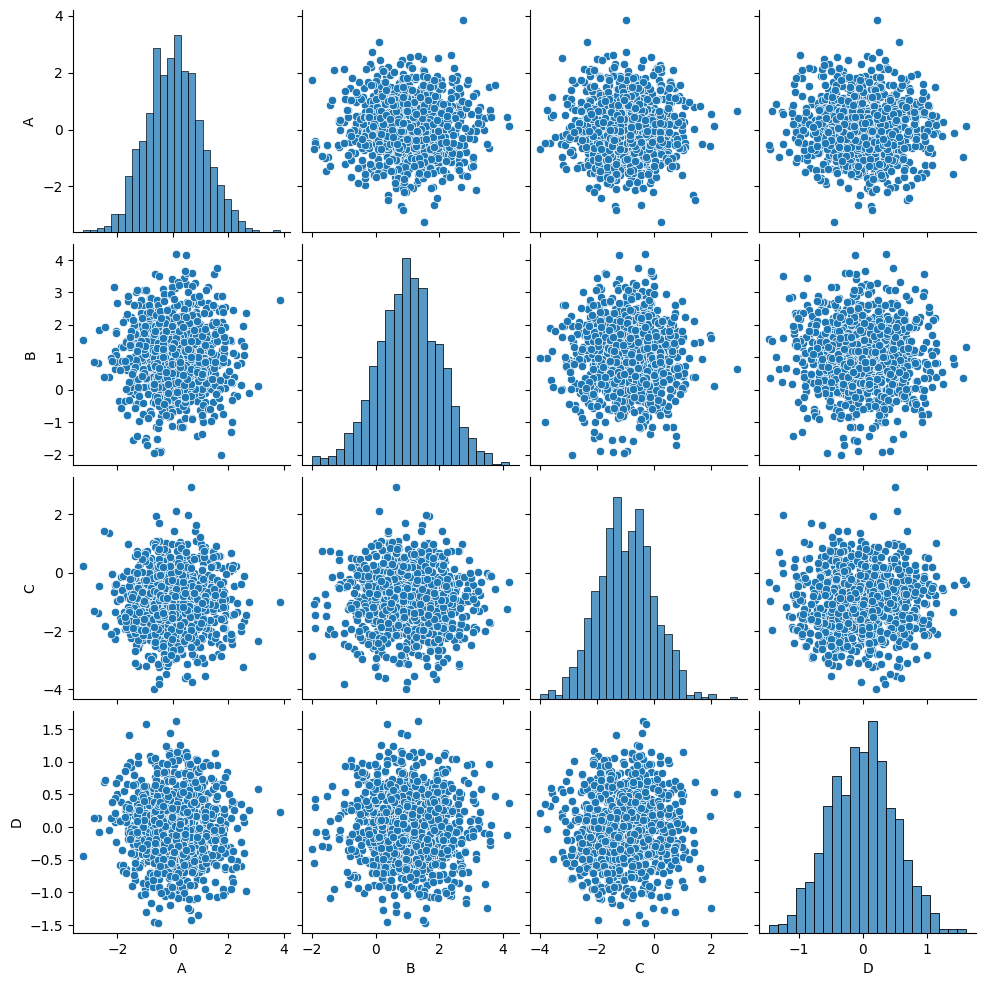

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr(method='pearson')

A         B         C         D
A  1.000000 -0.030162  0.014406 -0.037137
B -0.030162  1.000000  0.010432 -0.050328
C  0.014406  0.010432  1.000000  0.013203
D -0.037137 -0.050328  0.013203  1.000000

In [ ]:
df = df.select_dtypes(include='number')

In [ ]:
correlation_matrix = df.corr()

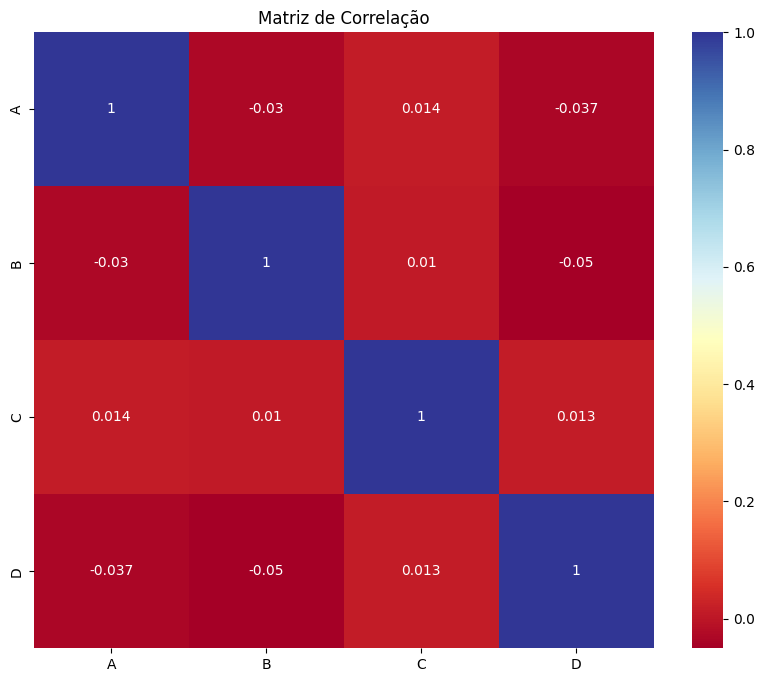

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Matriz de Correlação')
plt.show()

3. Paletas Divergentes
Estas paletas são usadas para representar dados que divergem em torno de um ponto central, como valores positivos e negativos em torno de zero.

* **BrBG**: Castanho para azul-esverdeado, útil para representar contraste entre seco e úmido.
* **PiYG**: Rosa para verde, útil para representar contrastes artísticos ou diferenciados.
* **PRGn**: Púrpura para verde, útil para contrastes fortes.
* **PuOr**: Púrpura para laranja, útil para contrastes artísticos.
* **RdBu**: Vermelho para azul, bom para representar calor contra frio.
* **RdGy**: Vermelho para cinza, útil para representar intensidade contra neutralidade.
* **RdYlBu**: Vermelho para amarelo para azul, bom para variação de intensidade.
* **RdYlGn**: Vermelho para amarelo para verde, útil para representar intensidade e crescimento.
* **Spectral**: Paleta multicolorida, útil para representar variações complexas.

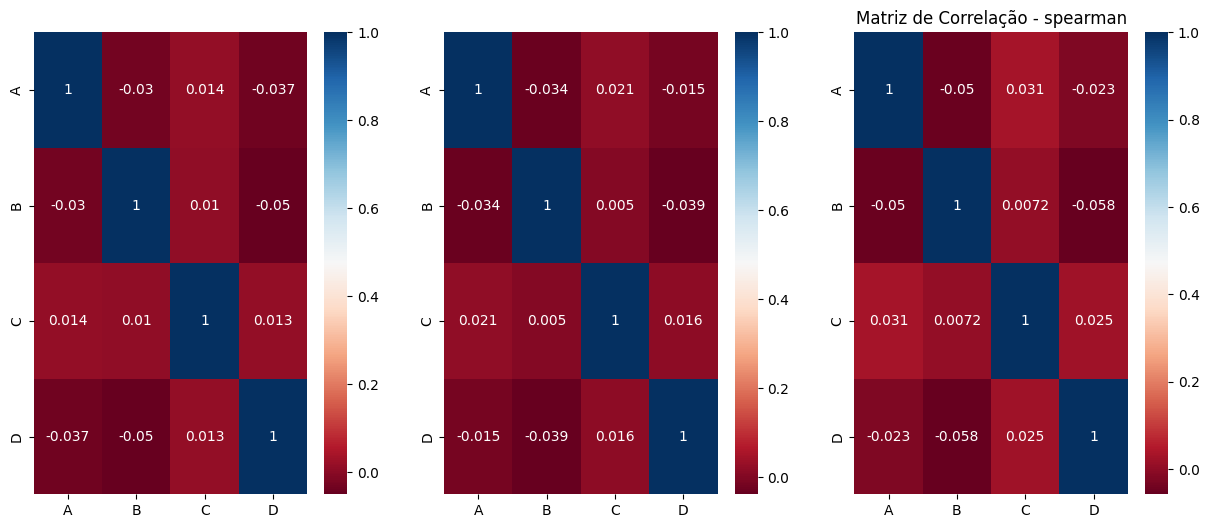

In [ ]:
coef = ['pearson', 'kendall', 'spearman', ]
fig, axes = plt.subplots(1,3, figsize=(15, 6))
for i, ax in zip(coef,axes):
    correlation_matrix = df.corr(method=i)
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu',ax=ax)
    plt.title(f'Matriz de Correlação - {i}')

plt.show()


##### QQplot

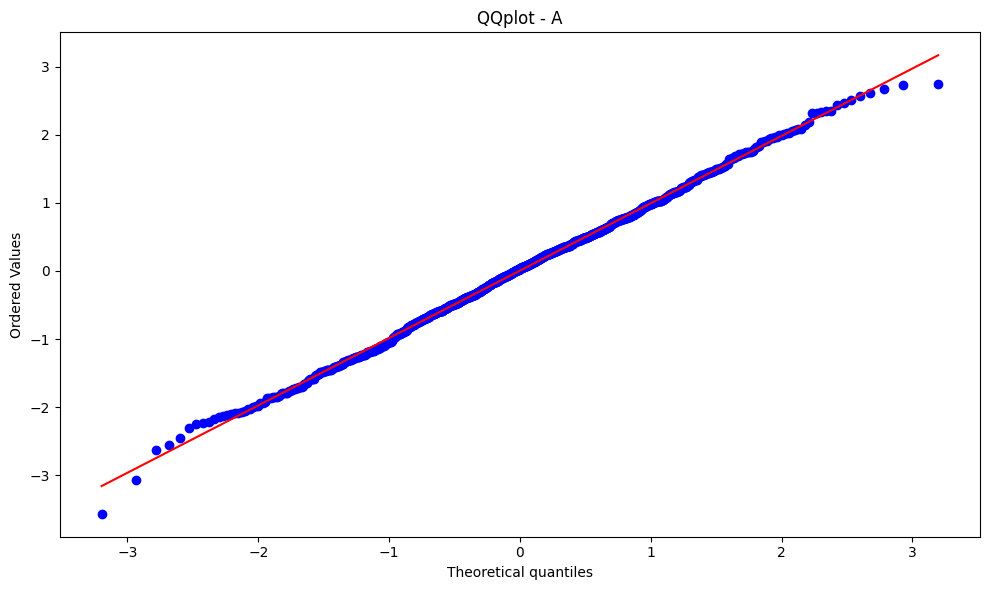

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(10,6))
stats.probplot(df['A'], dist="norm", plot=plt)
plt.title("QQplot - A")
plt.tight_layout()
plt.show()

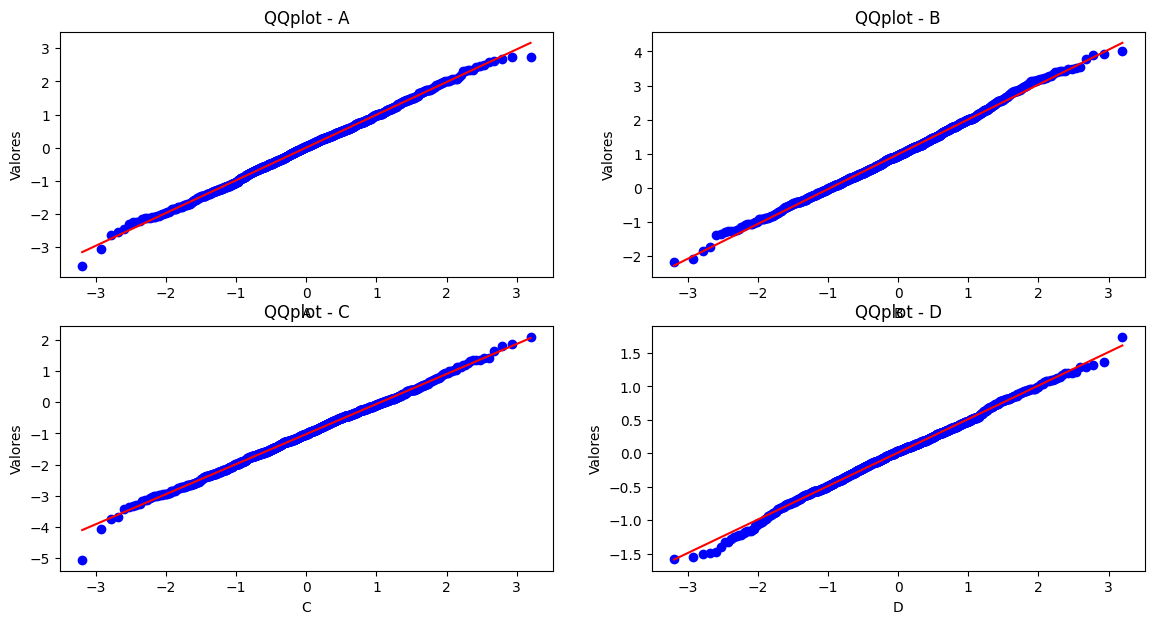

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(14, 7))

columns = ['A','B','C','D']
for column, ax in zip(columns, axes.flatten()):
    stats.probplot(df[column], dist="norm", plot=ax)
    ax.set_title(f"QQplot - {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Valores")

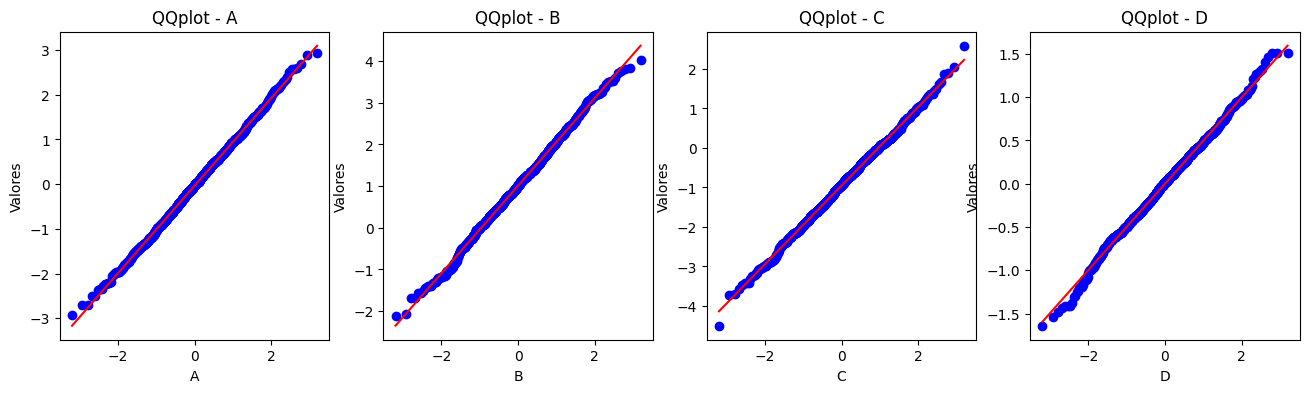

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))

columns = ['A','B','C','D']
for column, ax in zip(columns, [ax1, ax2, ax3, ax4]):
    stats.probplot(df[column], dist="norm", plot=ax)
    ax.set_title(f"QQplot - {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Valores")

##### Linha de Tendência

In [ ]:
# Configurar o gerador de números aleatórios para reprodutibilidade
np.random.seed(42)

# Gerar datas fictícias
dates = pd.date_range(start='2023-01-01', periods=30, freq='D')

# Gerar dados fictícios para as companhias aéreas
data = {
    'Date': dates,
    'GOL': np.random.uniform(low=20, high=50, size=len(dates)),
    'Latam': np.random.uniform(low=30, high=60, size=len(dates)),
    'Azul': np.random.uniform(low=25, high=55, size=len(dates)),
    'American Airlines': np.random.uniform(low=35, high=65, size=len(dates))
}

# Criar o DataFrame
df = pd.DataFrame(data)

df.head()

Date        GOL      Latam       Azul  American Airlines
0 2023-01-01  31.236204  48.226346  36.660319          38.587827
1 2023-01-02  48.521429  35.115724  33.140471          56.397344
2 2023-01-03  41.959818  31.951548  49.862125          57.823551
3 2023-01-04  37.959755  58.466566  35.702600          51.838316
4 2023-01-05  24.680559  58.968961  33.428035          58.129015

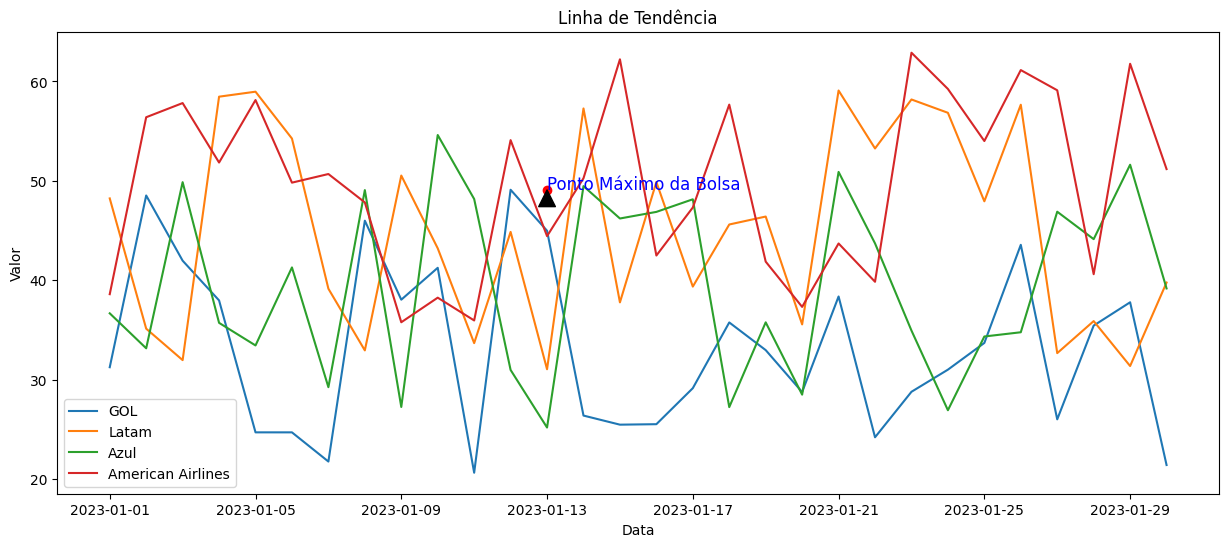

In [ ]:
# Definir o tamanho da figura
plt.figure(figsize=(15, 6))

# Plotar as linhas com rótulos
sns.lineplot(x='Date', y='GOL', data=df, label='GOL')
sns.lineplot(x='Date', y='Latam', data=df, label='Latam')
sns.lineplot(x='Date', y='Azul', data=df, label='Azul')
sns.lineplot(x='Date', y='American Airlines', data=df, label='American Airlines')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Linha de Tendência')

x_point = df[['Date']].iloc[12]
y_point = df['GOL'].max()   # Valor específico

plt.scatter(x_point, y_point, color='red')

plt.annotate('Ponto Máximo da Bolsa', xy=(x_point, y_point), xytext=(x_point, y_point),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='blue')
# Adicionar a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

In [ ]:
columns = df.columns[1:]
columns

'GOL'

In [ ]:
df['Index'] = range(1, len(df['Date']) + 1)

In [ ]:
df.head()

Date        GOL      Latam       Azul  American Airlines  Index
0 2023-01-01  31.236204  48.226346  36.660319          38.587827      1
1 2023-01-02  48.521429  35.115724  33.140471          56.397344      2
2 2023-01-03  41.959818  31.951548  49.862125          57.823551      3
3 2023-01-04  37.959755  58.466566  35.702600          51.838316      4
4 2023-01-05  24.680559  58.968961  33.428035          58.129015      5

In [ ]:
z = np.polyfit(df['Index'], df['GOL'], 1)  # regressão linear
p = np.poly1d(z)

In [ ]:
p

poly1d([-0.18631315, 36.04577203])

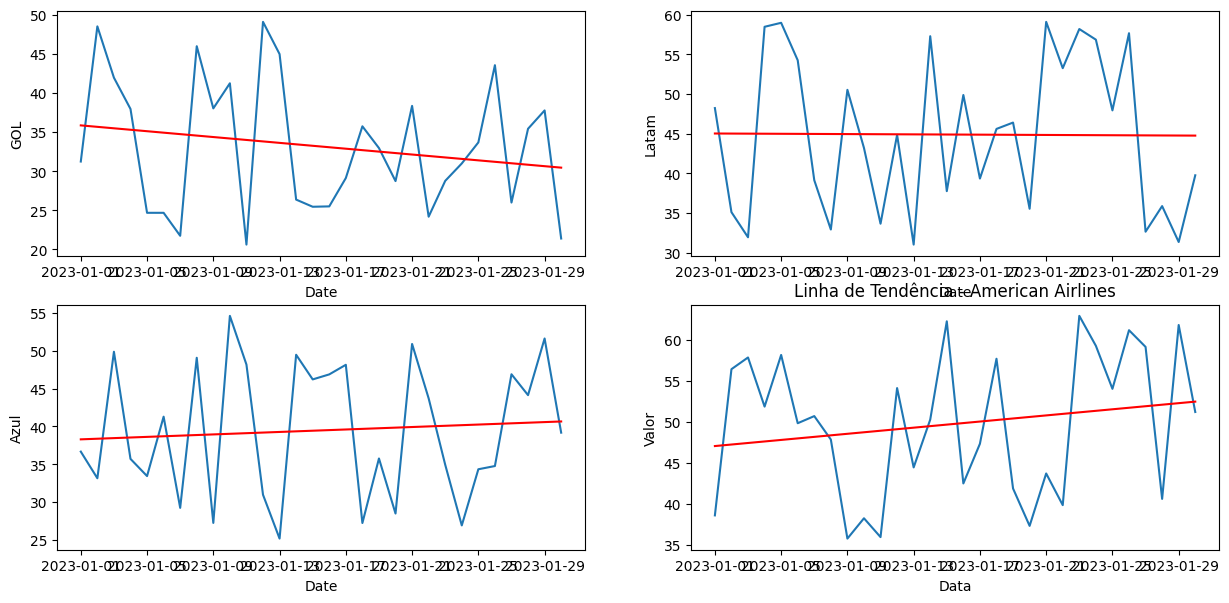

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(15,7))
for column,ax in zip(columns, axes.flatten()) :
    z = np.polyfit(df['Index'], df[column], 1)  # regressão linear
    p = np.poly1d(z)
    sns.lineplot(x='Date', y=column, data=df,ax=ax)
    ax.plot(df['Date'], p(df['Index']), color='red')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.title(f'Linha de Tendência - {column}')

plt.show()


##### Múltiplos Gráficos

In [ ]:
df

A         B         C         D
0   -0.702053  1.727630 -0.377793 -0.047229
1   -0.327662  1.051946 -2.138833  0.209805
2   -0.392108  1.732640  0.039112 -0.431941
3   -1.463515  0.919283 -1.075764  0.639732
4    0.296120  1.078635 -0.329519  0.520862
..        ...       ...       ...       ...
995  0.238789  0.852220  0.218971  0.039901
996 -0.259042  0.546752 -2.951102  0.569778
997 -0.196350  2.452468 -0.856412 -0.193681
998 -0.071601  1.326745 -2.817979 -0.549310
999 -0.037222  1.300474 -0.240288  0.710252

[1000 rows x 4 columns]

<Axes: xlabel='B', ylabel='C'>

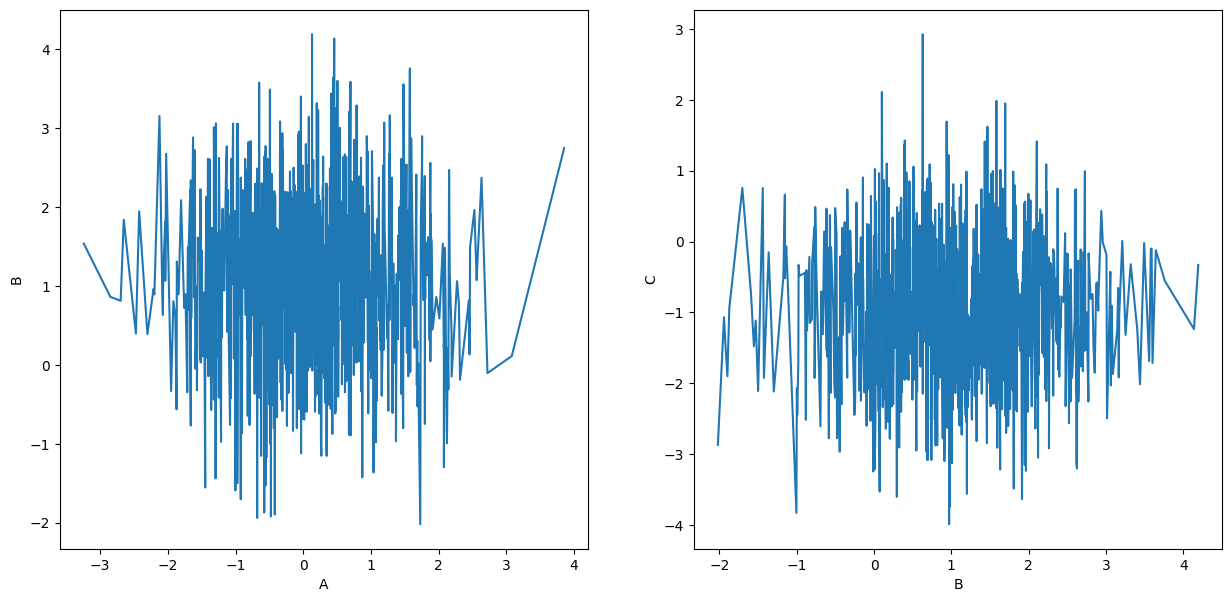

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

sns.lineplot(x='A', y='B', data=df, ax=ax1)
sns.lineplot(x='B', y='C', data=df, ax=ax2)

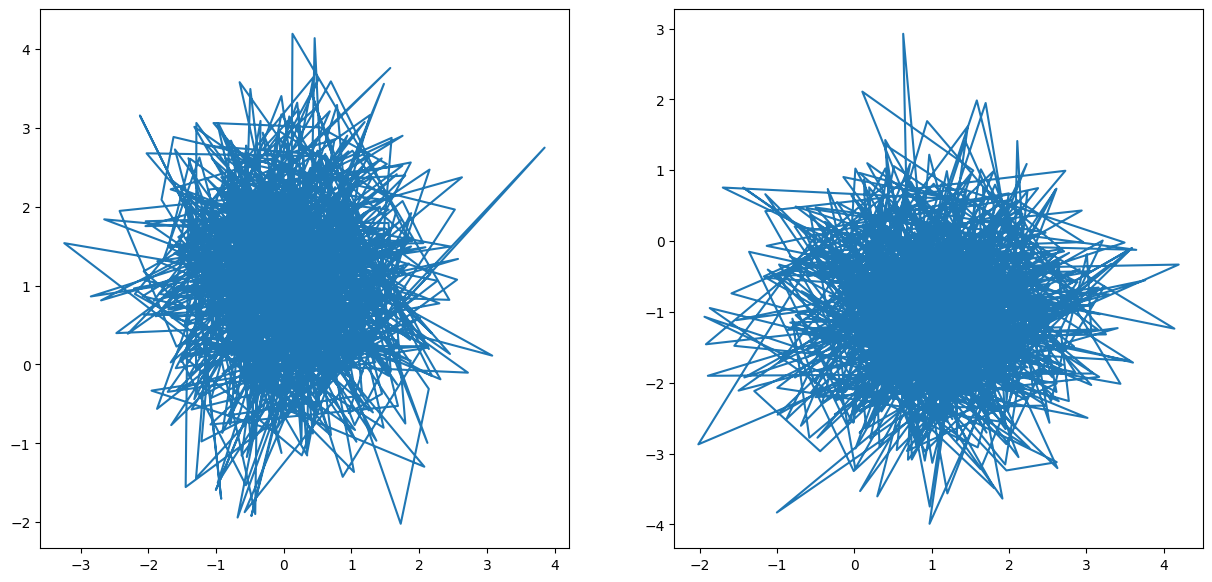

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

ax1.plot(df['A'], df['B'])
ax2.plot(df['B'], df['C'])

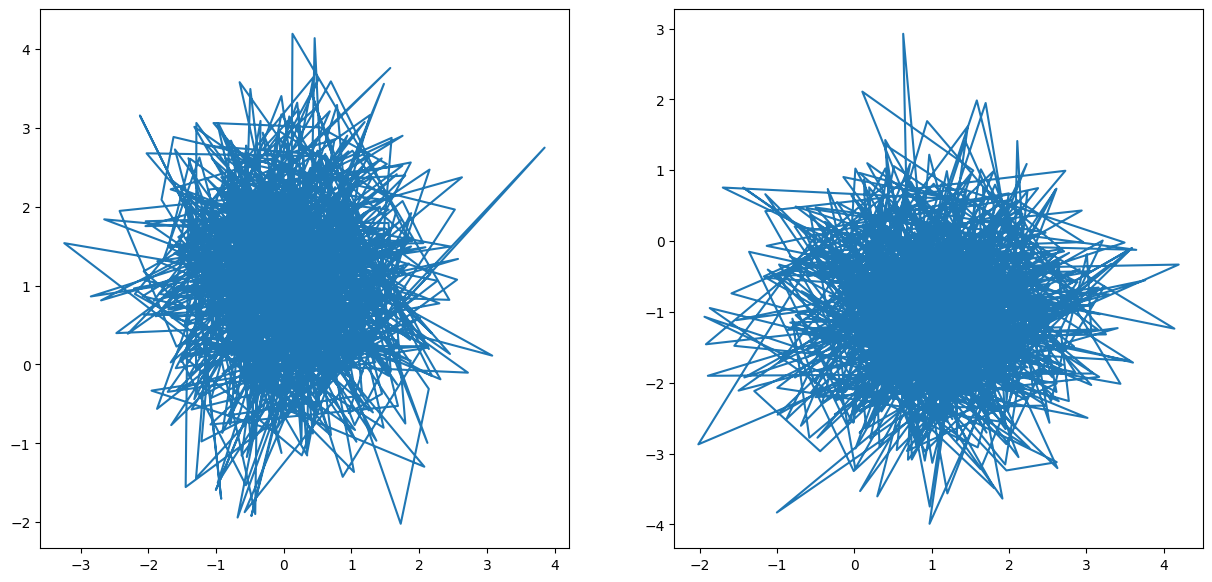

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(df['A'], df['B'])
ax[1].plot(df['B'], df['C'])

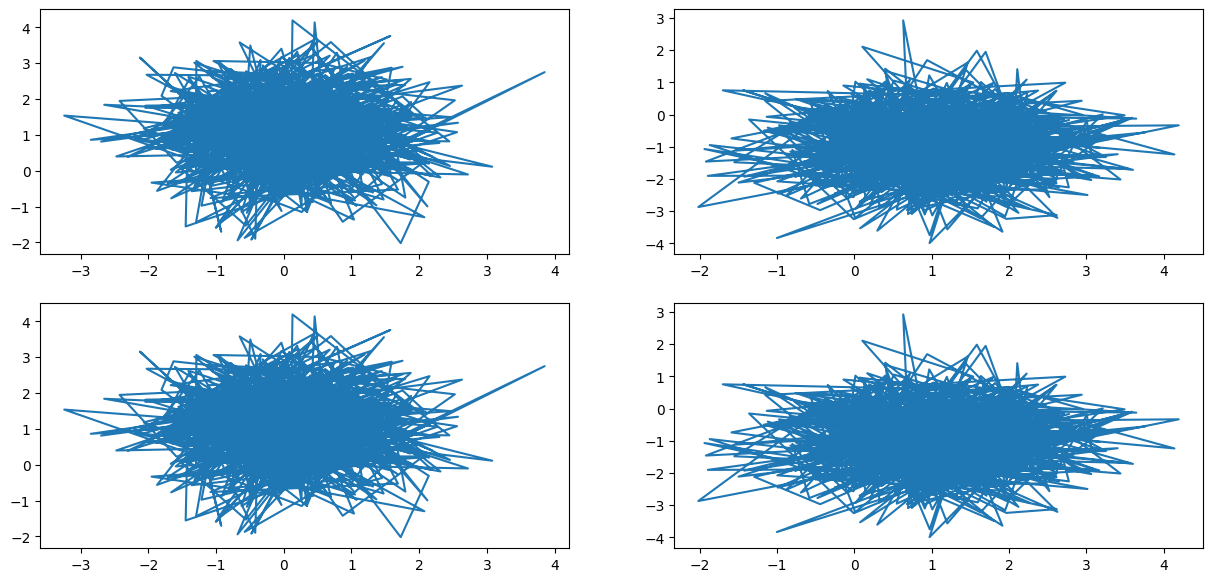

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,7))
ax[0,0].plot(df['A'], df['B'])
ax[0,1].plot(df['B'], df['C'])
ax[1,0].plot(df['A'], df['B'])
ax[1,1].plot(df['B'], df['C'])


##### Vlines/Lines


In [ ]:
df


A         B         C         D   Ano
0    1.356910  1.485556  0.915220 -0.250328  2015
1    1.338410 -0.616514 -1.176308 -0.044206  1964
2    0.019355  2.888873 -0.950002  0.929913  2021
3    0.932543 -0.930939 -1.653658 -0.354720  1996
4    1.032830  2.148762 -2.074414  0.511521  1989
..        ...       ...       ...       ...   ...
995  1.114233  0.790123 -0.654239  0.758935  2003
996  1.833437  1.482926 -0.976843 -0.204759  1983
997  0.424264  2.246812 -0.160400 -0.475267  1956
998  0.188283  1.310069 -2.161055  0.511049  2011
999  0.495146  0.058350  0.844354  0.115466  2006

[1000 rows x 5 columns]

In [ ]:
df['A'].sort_values(ascending=False)

274    2.531247
459    2.471247
830    2.455896
468    2.388447
66     2.365647
         ...   
947   -2.447731
590   -2.462120
607   -2.799192
319   -3.759779
373   -4.054050
Name: A, Length: 1000, dtype: float64

In [ ]:
df[(df['Ano'] == 2020)]['A'].mean()

0.3894530588598837

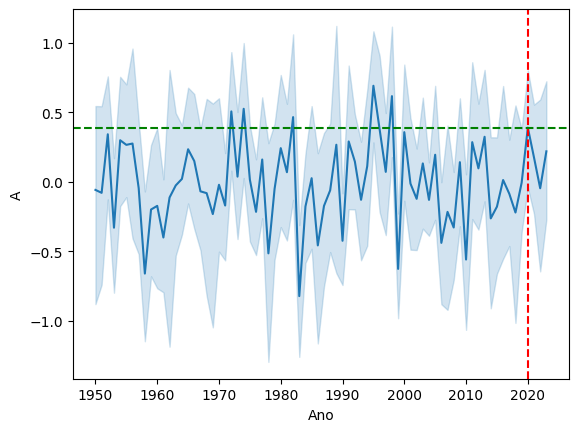

In [ ]:
plt.figure()
sns.lineplot(data=df, x='Ano', y='A')
plt.axvline(x=2020, color='red', linestyle='--')
plt.axhline(y=df[(df['Ano'] == 2020)]['A'].mean(), color='green', linestyle='--')
plt.show()

##### Anottations

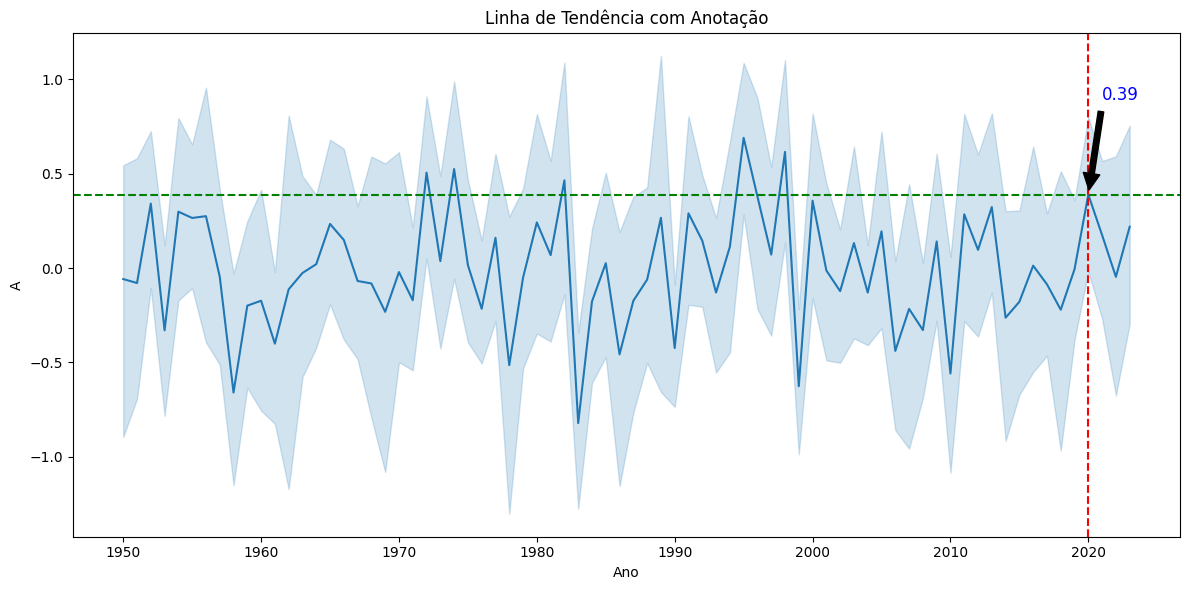

In [ ]:
plt.figure(figsize=(12, 6))

# Plotar a linha
sns.lineplot(data=df, x='Ano', y='A')

# Adicionar uma linha vertical no ano 2020
plt.axvline(x=2020, color='red', linestyle='--')

# Adicionar uma linha horizontal na média de 'A' para o ano 2020
mean_2020 = df[df['Ano'] == 2020]['A'].mean()
plt.axhline(y=mean_2020, color='green', linestyle='--')

# Anotar a média de 'A' para o ano 2020
plt.annotate(f'{mean_2020:.2f}',
             xy=(2020, mean_2020),
             xytext=(2020 + 1, mean_2020 + 0.5),  # Ajustar a posição do texto
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='blue')

# Mostrar o gráfico
plt.title('Linha de Tendência com Anotação')
plt.xlabel('Ano')
plt.ylabel('A')
plt.tight_layout()
plt.show()

### 3. Funções de Distribuição de Probabilidade PDF, CDF e PPF

#### Gaussiana (Normal)

In [ ]:
sample_size = 60

In [ ]:
np.random.seed(1)
normal_samples = norm.rvs(loc=5000, scale=200, size=sample_size)
normal_samples[:10]

array([5324.86907273, 4877.64871727, 4894.36564955, 4785.40627557,
       5173.08152586, 4539.69226062, 5348.96235284, 4847.75861982,
       5063.80781921, 4950.1259249 ])

* **loc**: Média da distribuição normal. Neste caso, é 0.

* **scale**: Desvio padrão da distribuição. Neste caso, é 1.

* **size**: Número de amostras a serem geradas. Neste caso, é sample_size (1000).

<Axes: ylabel='Count'>

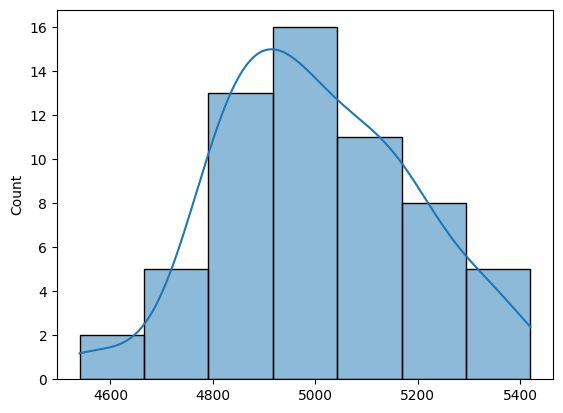

In [ ]:
sns.histplot(normal_samples,kde=True)

y = norm.cdf(x, loc=0, scale=1)



> Add blockquote



In [ ]:
y = norm.cdf(normal_samples, loc=5000, scale=200)
y

array([0.94784894, 0.27034947, 0.29869007, 0.1416426 , 0.80659245,
       0.0106806 , 0.95949118, 0.22326675, 0.62515157, 0.40153715,
       0.92814418, 0.01969255, 0.37356833, 0.35046908, 0.87155436,
       0.13568975, 0.43155045, 0.19001028, 0.51683585, 0.71999115,
       0.13553122, 0.87383819, 0.81636284, 0.69234008, 0.81616754,
       0.24707351, 0.45109701, 0.17469596, 0.39439273, 0.70206725,
       0.2445752 , 0.34577461, 0.24598695, 0.19899802, 0.25103187,
       0.49494769, 0.13193083, 0.59266886, 0.95152287, 0.77096971,
       0.42393551, 0.18737018, 0.22748401, 0.95472034, 0.52026064,
       0.26206384, 0.5757041 , 0.9821468 , 0.54782138, 0.73144962,
       0.61797638, 0.36232545, 0.12661934, 0.36341601, 0.4172654 ,
       0.7212716 , 0.79926069, 0.82409962, 0.61240289, 0.81195975])

Text(0.5, 1.0, 'Distribuição Normal')

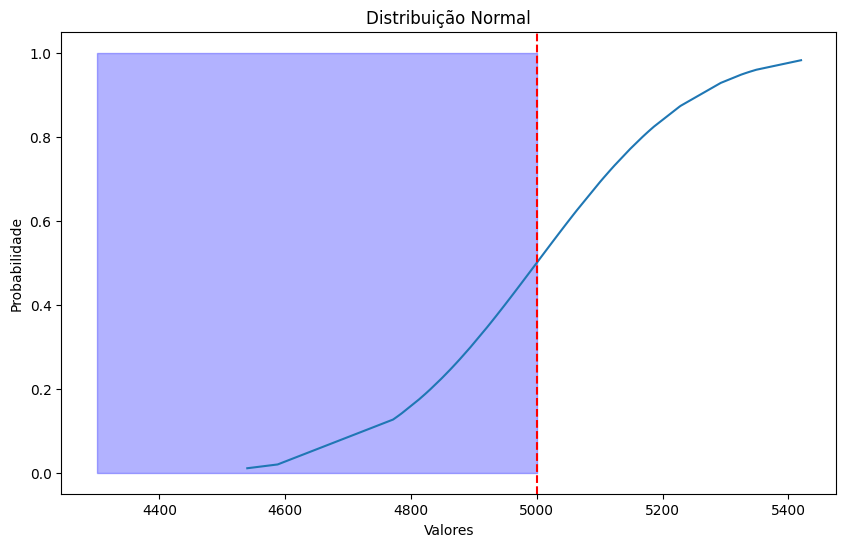

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=normal_samples, y=y)
plt.axvline(x=5000, color='r', linestyle='--')
plt.fill_betweenx([0, 1], x1=4300, x2=5000, alpha=0.3, color='blue')

plt.xlabel('Valores')
plt.ylabel('Probabilidade')
plt.title('Distribuição Normal')

In [ ]:
x = np.linspace(0,1,50)

In [ ]:
y = norm.ppf(x, loc=5000, scale=200)
y

array([         -inf, 4590.92180203, 4651.74187999, 4691.08490289,
       4721.16535823, 4745.99831699, 4767.43374196, 4786.48589522,
       4803.77480077, 4819.70918407, 4834.57395883, 4848.57654049,
       4861.87330918, 4874.58566247, 4886.81023561, 4898.62567549,
       4910.09728691, 4921.28031684, 4932.22233969, 4942.96503433,
       4953.5455413 , 4963.99752604, 4974.3520348 , 4984.63820485,
       4994.88387418, 5005.11612582, 5015.36179515, 5025.6479652 ,
       5036.00247396, 5046.4544587 , 5057.03496567, 5067.77766031,
       5078.71968316, 5089.90271309, 5101.37432451, 5113.18976439,
       5125.41433753, 5138.12669082, 5151.42345951, 5165.42604117,
       5180.29081593, 5196.22519923, 5213.51410478, 5232.56625804,
       5254.00168301, 5278.83464177, 5308.91509711, 5348.25812001,
       5409.07819797,           inf])

Text(0.5, 1.0, 'Distribuição Normal')

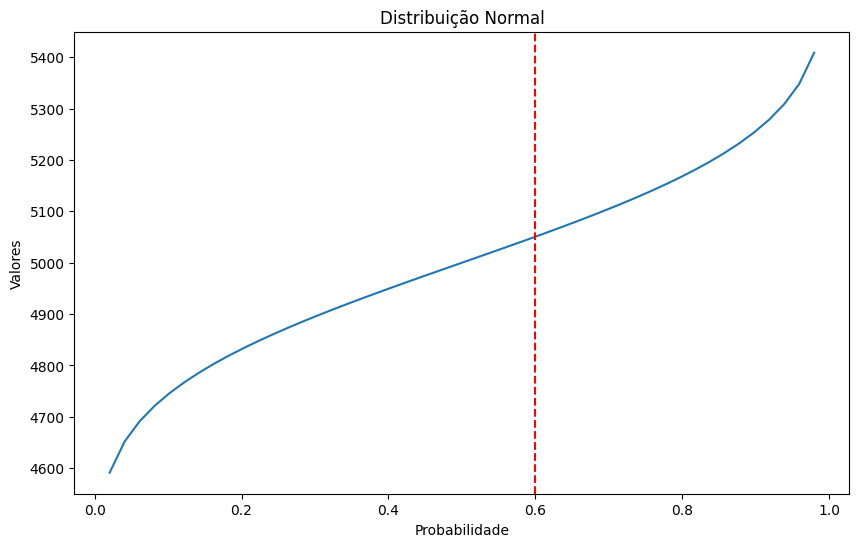

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=x, y=y)
plt.axvline(x=0.6, color='r', linestyle='--')

plt.xlabel('Probabilidade')
plt.ylabel('Valores')
plt.title('Distribuição Normal')

In [ ]:
# CDF
cdf_value = norm.cdf(x=1, loc=loc, scale=scale)
print("CDF:", cdf_value)

# PPF
ppf_value = norm.ppf(q=0.95, loc=loc, scale=scale)
print("PPF:", ppf_value)

#### Exponencial

* scale: Parâmetro de escala (inverso da taxa λ). Neste caso, é 5000.

* size: Número de amostras a serem geradas. Neste caso, é sample_size (60).

In [ ]:
np.random.seed(1)
expon_samples = expon.rvs(scale=5000, size=sample_size)
expon_samples[:10]

array([2.69802919e+03, 6.37062627e+03, 5.71906793e-01, 1.80006377e+03,
       7.93547976e+02, 4.84419358e+02, 1.03057317e+03, 2.11988241e+03,
       2.52726271e+03, 3.86979887e+03])

<Axes: ylabel='Count'>

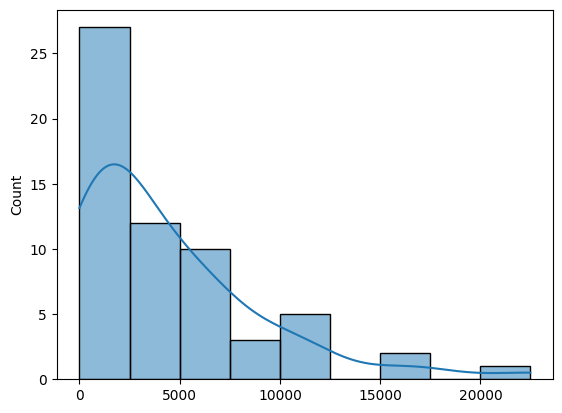

In [ ]:
plt.figure()
sns.histplot(expon_samples,kde=True)

In [ ]:
# Parâmetros
loc = 2  # deslocamento
scale = 5000  # escala

# CDF
cdf_value = expon.cdf(x=10000, loc=loc, scale=scale)
print("CDF:", cdf_value)

# PPF
ppf_value = expon.ppf(q=0.95, loc=loc, scale=scale)
print("PPF:", ppf_value)

#### Uniforme

In [ ]:
# Parâmetros
loc = 0  # limite inferior
scale = 1  # largura do intervalo

# CDF
cdf_value = uniform.cdf(x=0.5, loc=loc, scale=scale)
print("CDF:", cdf_value)

# PPF
ppf_value = uniform.ppf(q=0.95, loc=loc, scale=scale)
print("PPF:", ppf_value)

CDF: 0.5
PPF: 0.95


#### Beta

In [ ]:
# Parâmetros
a = 2  # parâmetro alfa
b = 5  # parâmetro beta

# CDF
cdf_value = beta.cdf(x=0.5, a=a, b=b)
print("CDF:", cdf_value)

# PPF
ppf_value = beta.ppf(q=0.95, a=a, b=b)
print("PPF:", ppf_value)

#### Weibull

In [ ]:
# Parâmetros
c = 1.5  # parâmetro de forma

# CDF
cdf_value = weibull_min.cdf(x=1, c=c)
print("CDF:", cdf_value)

# PPF
ppf_value = weibull_min.ppf(q=0.95, c=c)
print("PPF:", ppf_value)

Explicação dos Parâmetros
* **loc**: Parâmetro de deslocamento (não aplicável para Beta e Weibull).
* **scale**: Parâmetro de escala (não aplicável para Beta e Weibull).
* **x**: O valor no qual calcular a CDF.
* **q**: Quantil para o qual calcular o PPF (percent point function).
* **a** e **b**: Parâmetros de forma da distribuição Beta.
* **c**: Parâmetro de forma da distribuição Weibull.

#### Gamma


In [ ]:
# Parâmetros
shape = 2  # parâmetro de forma
loc = 0  # deslocamento
scale = 2  # parâmetro de escala

# CDF
cdf_value = gamma.cdf(x=5, a=shape, loc=loc, scale=scale)
print("Gamma CDF:", cdf_value)

# PPF
ppf_value = gamma.ppf(q=0.95, a=shape, loc=loc, scale=scale)
print("Gamma PPF:", ppf_value)

#### Log-normal

In [ ]:
# Parâmetros
shape = 0.954  # parâmetro de forma
loc = 0  # deslocamento
scale = 1  # parâmetro de escala

# CDF
cdf_value = lognorm.cdf(x=1, s=shape, loc=loc, scale=scale)
print("Log-Normal CDF:", cdf_value)

# PPF
ppf_value = lognorm.ppf(q=0.95, s=shape, loc=loc, scale=scale)
print("Log-Normal PPF:", ppf_value)

#### Cauchy

In [ ]:
# Parâmetros
loc = 0  # mediana
scale = 1  # parâmetro de escala

# CDF
cdf_value = cauchy.cdf(x=1, loc=loc, scale=scale)
print("Cauchy CDF:", cdf_value)

# PPF
ppf_value = cauchy.ppf(q=0.95, loc=loc, scale=scale)
print("Cauchy PPF:", ppf_value)

#### Pareto

In [ ]:
# Parâmetros
shape = 2.62  # parâmetro de forma
loc = 0  # deslocamento
scale = 1  # parâmetro de escala

# CDF
cdf_value = pareto.cdf(x=2, b=shape, loc=loc, scale=scale)
print("Pareto CDF:", cdf_value)

# PPF
ppf_value = pareto.ppf(q=0.95, b=shape, loc=loc, scale=scale)
print("Pareto PPF:", ppf_value)

#### Binomial

In [ ]:
# Parâmetros
n = 10  # número de tentativas
p = 0.5  # probabilidade de sucesso

# CDF
cdf_value = binom.cdf(k=5, n=n, p=p)
print("Binomial CDF:", cdf_value)

# PPF
ppf_value = binom.ppf(q=0.95, n=n, p=p)
print("Binomial PPF:", ppf_value)

### 4. Testes estatísticos

**Testes de Normalidade**
Estes testes são utilizados para verificar se uma amostra segue uma distribuição normal.

**Shapiro-Wilk Test**

* Comando: shapiro(a)

* Pressupostos: Não há pressupostos específicos.

* Foco: Verificar a normalidade dos dados.

* Hipótese Nula (H0): Os dados seguem uma distribuição normal.

**Levene's Test**

* Comando: levene(a, b)

* Pressupostos: Não há pressupostos específicos.

* Foco: Verificar a igualdade das variâncias.

* Hipótese Nula (H0): As variâncias são iguais.

**Testes Paramétricos**
Estes testes são usados para comparar médias sob pressupostos de normalidade, continuidade e homocedasticidade (igualdade de variâncias).

**t-Test for Independent Samples**

* Comando: ttest_ind(a, b, alternative="two-sided"|"greater"|"less")

* Distribuição: t-Student

* Foco: Comparação de médias entre duas amostras independentes.

**z-Test for Independent Samples**

* Comando: ztest(a, b, alternative="two-sided"|"greater"|"less")

* Distribuição: Normal

* Foco: Comparação de médias entre duas populações.

**t-Test for One Sample**

* Comando: ttest_1samp(a, valor, alternative="two-sided"|"greater"|"less")

* Foco: Comparar a média de uma amostra com um valor específico.

**Paired t-Test**

* Comando: ttest_rel(a, b, alternative="two-sided"|"greater"|"less")

* Foco: Comparação de médias entre duas amostras pareadas.

**Welch's t-Test**

* Comando: ttest_ind(a, b, equal_var=False)

* Foco: Comparação de médias entre duas amostras com variâncias ou tamanhos diferentes.

**Testes Não Paramétricos**
Estes testes não assumem nenhuma distribuição específica dos dados e são usados para comparar medianas e distribuições.

**Wilcoxon Signed-Rank Test**

* Comando: wilcoxon(a, b, alternative="two-sided"|"greater"|"less")

* Foco: Verificar se duas amostras têm medianas iguais. As amostras devem ter o mesmo tamanho.

**Mann-Whitney U Test**

* Comando: mannwhitneyu(a, b, alternative="two-sided"|"greater"|"less")

* Foco: Comparar distribuições de duas amostras de tamanhos diferentes. Verificar se as distribuições são iguais.

**Teste Qui-Quadrado (χ²)**
Utilizado para verificar a independência entre variáveis categóricas.

**Chi-Square Test**

* Comando: chi2_contingency(contingency_table)

* Pressupostos: Variáveis categóricas.

* Foco: Verificar se as variáveis são independentes.

* Utilização: Empregar pd.crosstab() para gerar tabelas de contingência.

---



O que é a Hipótese Nula (H0)?

A hipótese nula (H0) é uma afirmação inicial sobre uma população que serve como base para os testes de hipóteses estatísticas. Ela geralmente propõe que não há efeito, diferença ou relação entre as variáveis que estão sendo estudadas. A hipótese nula é uma posição conservadora que assume que qualquer observação ou diferença é devido ao acaso ou variabilidade aleatória, e não a um efeito real.

Exemplos de Uso dos Comandos


1. Shapiro-Wilk Test



In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(a)

2. Levene's Test

In [ ]:
from scipy.stats import levene

stat, p = levene(a, b)

3. t-Test for Independent Samples

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a, b, alternative='two-sided')

4. z-Test for Independent Samples

In [ ]:
from statsmodels.stats.weightstats import ztest

stat, p = ztest(a, b, alternative='two-sided')

5. t-Test for One Sample

In [ ]:
from scipy.stats import ttest_1samp

stat, p = ttest_1samp(a, valor, alternative='two-sided')

6. Paired t-Test

In [ ]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(a, b, alternative='two-sided')

7. Welch's t-Test

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a, b, equal_var=False)

8. Wilcoxon Signed-Rank Test


In [ ]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(a, b, alternative='two-sided')

9. Mann-Whitney U Test

In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(a, b, alternative='two-sided')

10. Chi-Square Test


In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(variable1, variable2)

stat, p, dof, expected = chi2_contingency(table)

##### Tipos de testes de hipótese

1. Teste Bilateral (Two-sided)

* Alternativa: "two-sided"

* Descrição: Testa se há uma diferença significativa em qualquer direção (maior ou menor).

* Uso: Utilizado quando não há uma direção específica esperada para a diferença.

2. Teste Unilateral à Direita (Greater)

* Alternativa: "greater"

* Descrição: Testa se a média (ou outra estatística de interesse) da amostra é significativamente maior do que a média (ou valor) da população de referência.

* Uso: Utilizado quando se espera que o valor da amostra seja maior do que o valor da população.

3. Teste Unilateral à Esquerda (Less)

* Alternativa: "less"

* Descrição: Testa se a média (ou outra estatística de interesse) da amostra é significativamente menor do que a média (ou valor) da população de referência.

* Uso: Utilizado quando se espera que o valor da amostra seja menor do que o valor da população.

**Exemplos**

1. Teste t para Amostras Independentes (t-test for independent samples)


In [ ]:
from scipy.stats import ttest_ind

# Dados de exemplo
a = [1, 2, 3, 4, 5]
b = [2, 3, 4, 5, 6]

# Teste bilateral
stat, p = ttest_ind(a, b, alternative='two-sided')

# Teste unilateral à direita
stat, p = ttest_ind(a, b, alternative='greater')

# Teste unilateral à esquerda
stat, p = ttest_ind(a, b, alternative='less')


2. Teste t para Amostras Pareadas (Paired t-test)


In [ ]:
from scipy.stats import ttest_rel

# Dados de exemplo
a = [1, 2, 3, 4, 5]
b = [2, 3, 4, 5, 6]

# Teste bilateral
stat, p = ttest_rel(a, b, alternative='two-sided')

# Teste unilateral à direita
stat, p = ttest_rel(a, b, alternative='greater')

# Teste unilateral à esquerda
stat, p = ttest_rel(a, b, alternative='less')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


3. Teste Mann-Whitney U


In [ ]:
from scipy.stats import mannwhitneyu

# Dados de exemplo
a = [1, 2, 3, 4, 5]
b = [2, 3, 4, 5, 6]

# Teste bilateral
stat, p = mannwhitneyu(a, b, alternative='two-sided')

# Teste unilateral à direita
stat, p = mannwhitneyu(a, b, alternative='greater')

# Teste unilateral à esquerda
stat, p = mannwhitneyu(a, b, alternative='less')

4. Teste Wilcoxon


In [ ]:
from scipy.stats import wilcoxon

# Dados de exemplo
a = [1, 2, 3, 4, 5]
b = [2, 3, 4, 5, 6]

# Teste bilateral
stat, p = wilcoxon(a, b, alternative='two-sided')

# Teste unilateral à direita
stat, p = wilcoxon(a, b, alternative='greater')

# Teste unilateral à esquerda
stat, p = wilcoxon(a, b, alternative='less')


Resumo das Alternativas:

* **"two-sided"**: Verifica diferença em qualquer direção.

* **"greater"**: Verifica se a amostra é maior que a população de referência.

* **"less"**: Verifica se a amostra é menor que a população de referência.